# Simulation Analyses
---

## Dependencies & Functions

First we load the necessary packages.

In [1]:
# Import packages.
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm

Next we define the functions that we will use in this notebook.

In [2]:
# Define a function to extract observed introgression values.
def iua_obs_vals(n, f):
    """
    ###########################################################################
    INPUT
        n: Sample size.
        f: Admixture proportion.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of observed introgression values from all replicate
            simulations.
    ###########################################################################
    """
    # If the sample size is 1...
    if (n == 1):        
        # Define the file path for the results.
        results_path = './sim_outputs/n_1/{0}/obs_vals/'.format(f)
        # Load observed site patterns.
        obs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        obs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        obs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        obs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Load observed introgression values.
        obs_d = np.loadtxt(
            results_path+'d.csv.gz',
            delimiter=',',
        )
        obs_danc = np.loadtxt(
            results_path+'danc.csv.gz',
            delimiter=',',
        )
        obs_dplus = np.loadtxt(
            results_path+'dplus.csv.gz',
            delimiter=',',
        )
        obs_fhom = np.loadtxt(
            results_path+'fhom.csv.gz',
            delimiter=',',
        )
        obs_fanc = np.loadtxt(
            results_path+'fanc.csv.gz',
            delimiter=',',
        )
        obs_fplus = np.loadtxt(
            results_path+'fplus.csv.gz',
            delimiter=',',
        )
    # Else...
    else:
        # Define the file path for the results.
        results_path = './sim_outputs/n_100/{0}/obs_vals/rep_id_'.format(f)
        # Intialize obsrved value arrays.
        obs_abba = np.array([])
        obs_baba = np.array([])
        obs_baaa = np.array([])
        obs_abaa = np.array([])
        obs_d = np.array([])
        obs_danc = np.array([])
        obs_dplus = np.array([])
        obs_fhom = np.array([])
        obs_fanc = np.array([])
        obs_fplus = np.array([])
        # For all replicates.
        for rep_id in range(1, 101):
            # Load the observed values.
            site_patterns = np.loadtxt(
                results_path+'{0}_obs_site_patterns.csv.gz'.format(rep_id),
                delimiter=',',
            )
            detection = np.loadtxt(
                results_path+'{0}_obs_detection_metrics.csv.gz'.format(rep_id),
                delimiter=',',
            )
            quantification = np.loadtxt(
                results_path+'{0}_obs_quantification_metrics.csv.gz'.format(rep_id),
                delimiter=',',
            )
            # Append the observed value arrays.
            obs_abba = np.append(obs_abba, site_patterns[0])
            obs_baba = np.append(obs_baba, site_patterns[1])
            obs_baaa = np.append(obs_baaa, site_patterns[3])
            obs_abaa = np.append(obs_abaa, site_patterns[4])
            obs_d = np.append(obs_d, detection[0])
            obs_danc = np.append(obs_danc, detection[1])
            obs_dplus = np.append(obs_dplus, detection[2])
            obs_fhom = np.append(obs_fhom, quantification[0])
            obs_fanc = np.append(obs_fanc, quantification[1])
            obs_fplus = np.append(obs_fplus, quantification[2])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    obs_vals_dict = {
        'abba': obs_abba, 'baaa': obs_baaa,
        'baba': obs_baba, 'abaa': obs_abaa,
        'd': obs_d,       'danc': obs_danc,
        'fhom': obs_fhom, 'fanc': obs_fanc,
        'dplus': obs_dplus, 'fplus': obs_fplus,
    }
    return obs_vals_dict

In [3]:
# Define a function to calculate the standard deviations of each bootstrapped distribution.
def iua_bs_stds(n, f):
    """
    ###########################################################################
    INPUT
        n: Sample size.
        f: Admixture proportion.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of standard deviations per bootstrapped distribution.
    ###########################################################################
    """
    # Intialize bootstrapped standard deviation arrays.
    std_d = np.array([])
    std_danc = np.array([])
    std_dplus = np.array([])
    # Calculate the bootstrapped standard deviation for all replicate simulations.
    for rep_id in range(1, 101):
        # Define the file path for the results.
        results_path = './sim_outputs/n_{0}/{1}/bootstraps/rep_id_{2}_'.format(n, f, rep_id)
        # Load the bootstrapped distributions.
        bs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        bs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        bs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        bs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Calculate bootstrapped introgression values.
        bs_d = ((bs_abba - bs_baba) / (bs_abba + bs_baba))
        bs_danc = ((bs_baaa - bs_abaa) / (bs_baaa + bs_abaa))
        bs_dplus = (((bs_abba - bs_baba) + (bs_baaa - bs_abaa)) / ((bs_abba + bs_baba) + (bs_baaa + bs_abaa)))
        # Calculate the standard deviations of each bootstrapped distribution.
        bs_std_d = np.std(bs_d)
        bs_std_danc = np.std(bs_danc)
        bs_std_dplus = np.std(bs_dplus)
        # Store the bootstrapped results for the replicate.
        std_d = np.append(std_d, bs_std_d)
        std_danc = np.append(std_danc, bs_std_danc)
        std_dplus = np.append(std_dplus, bs_std_dplus)
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    bs_std_dict = {
        'd': std_d, 'danc': std_danc, 'dplus': std_dplus,
    }
    return bs_std_dict

In [4]:
# Define a function to calculate p-values for introgression detection metrics.
def iua_p_values(n, f):
    """
    ###########################################################################
    INPUT
        n: Sample size.
        f: Admixture proportion.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of p-values for introgression detection metrics.
    ###########################################################################
    """
    # Load the observed values.
    obs_dict = iua_obs_vals(n, f)
    # Load the bootstrapped standard deviations.
    bs_dict = iua_bs_stds(n, f)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=abs(obs_dict['d']), loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=abs(obs_dict['danc']), loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=abs(obs_dict['dplus']), loc=0, scale=bs_dict['dplus'])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    pval_dict = {
        'd': d_pval, 'danc': danc_pval, 'dplus': dplus_pval,
    }
    return pval_dict

In [5]:
# Define a function to calculate power for introgression detection metrics.
def iua_power(n, f):
    """
    ###########################################################################
    INPUT
        n: Sample size.
        f: Admixture proportion.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of power values for introgression detection metrics.
    ###########################################################################
    """
    # Load the observed values.
    obs_dict = iua_obs_vals(n, f)
    # Load the bootstrapped standard deviations.
    bs_dict = iua_bs_stds(n, f)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=abs(obs_dict['d']), loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=abs(obs_dict['danc']), loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=abs(obs_dict['dplus']), loc=0, scale=bs_dict['dplus'])
    # Calculate the power ie the number of significant replicates out of 100.
    d_power = np.mean(d_pval < 0.05 )
    danc_power = np.mean(danc_pval < 0.05 )
    dplus_power = np.mean(dplus_pval < 0.05 )
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    power_dict = {
        'd': d_power, 'danc': danc_power, 'dplus': dplus_power,
    }
    return power_dict

In [6]:
# Define the coalecesnt based expectation for all introgression metrics.
# D
def e_d(
    f,
    N=10_000,
    Tgf=1_600,
    Tp2=4_000,
    Tp3=16_000,
):
    """
    ###########################################################################
    INPUT
        f: Admixture proportion.
        N: Constant and equal effective population size.
        Tgf: Time of gene flow (introgression) from P3 -> P2.
        Tp2: Divergence time between P1 and P2.
        Tp3: Divergence time between P12 and P3. 
    ---------------------------------------------------------------------------
    OUTPUT: Coalescent expectation of D.
    ###########################################################################
    """
    d = (
        (f * (Tp3 - Tgf))\
        / (((1 - f) * (((4 * N) / 3) * np.exp(-((Tp3 - Tp2) / (2 * N)))))\
        + (f * ((((4 * N) / 3) * np.exp(-((Tp3 - Tgf) / (2 * N)))) + (Tp3 - Tgf))))
    )
    return d
# Danc
def e_danc(
    f,
    N=10_000,
    Tgf=1_600,
    Tp2=4_000,
    Tp3=16_000,
):
    """
    ###########################################################################
    INPUT
        f: Admixture proportion.
        N: Constant and equal effective population size.
        Tgf: Time of gene flow (introgression) from P3 -> P2.
        Tp2: Divergence time between P1 and P2.
        Tp3: Divergence time between P12 and P3. 
    ---------------------------------------------------------------------------
    OUTPUT: Coalescent expectation of Danc.
    ###########################################################################
    """
    danc = (
        (f * (Tp3 - Tgf))\
        / (((1 - f) * ((4 * N) - (((4 * N) / 3) * np.exp(-((Tp3 - Tp2) / (2 * N)))) + (2 * Tp2)))\
        + (f * (((2 * N) + Tgf) - (((4 * N) / 3) * np.exp(-((Tp3 - Tgf) / (2 * N)))) + ((2 * N) + Tp3))))
    )
    return danc
# D+
def e_dplus(
    f,
    N=10_000,
    Tgf=1_600,
    Tp2=4_000,
    Tp3=16_000,
):
    """
    ###########################################################################
    INPUT
        f: Admixture proportion.
        N: Constant and equal effective population size.
        Tgf: Time of gene flow (introgression) from P3 -> P2.
        Tp2: Divergence time between P1 and P2.
        Tp3: Divergence time between P12 and P3. 
    ---------------------------------------------------------------------------
    OUTPUT: Coalescent expectation of D+.
    ###########################################################################
    """
    dplus = (
        (2 * (f * (Tp3 - Tgf)))\
        / (((1 - f) * ((4 * N) + (2 * Tp2)))\
        + (f * ((4 * N) + (2 * Tp3))))
    )
    return dplus
# Note fhom, fanc, and f+ all have the same coalescent expectation.
def e_quantify(
    f,
    N=10_000,
    Tgf=1_600,
    Tp3=16_000,
):
    """
    ###########################################################################
    INPUT
        f: Admixture proportion.
        N: Constant and equal effective population size.
        Tgf: Time of gene flow (introgression) from P3 -> P2.
        Tp3: Divergence time between P12 and P3. 
    ---------------------------------------------------------------------------
    OUTPUT: Coalescent expectation of fhom, fanc, and f+.
    ###########################################################################
    """
    quantify = (f * (Tp3 - Tgf)) / (Tp3 + (2 * N))
    return quantify
# Vectorize all of these functions for easy computations.
vec_e_d = np.vectorize(e_d)
vec_e_danc = np.vectorize(e_danc)
vec_e_dplus = np.vectorize(e_dplus)
vec_e_quantify = np.vectorize(e_quantify)

In [7]:
# Define a function to extract observed introgression values.
def ragsdale_obs_vals(n, f, prefix):
    """
    ###########################################################################
    INPUT
        n: Sample size.
        f: Admixture proportion.
        prefix: Load the results for ceu or chb.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of observed introgression values from all replicate
            simulations.
    ###########################################################################
    """
    # If the sample size is 1...
    if (n == 1):        
        # Define the file path for the results.
        results_path = './non_iua_models/ragsdale_2019/n_1/{0}/obs_vals/{1}_'.format(f, prefix)
        # Load observed site patterns.
        obs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        obs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        obs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        obs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Load observed introgression values.
        obs_d = np.loadtxt(
            results_path+'d.csv.gz',
            delimiter=',',
        )
        obs_danc = np.loadtxt(
            results_path+'danc.csv.gz',
            delimiter=',',
        )
        obs_dplus = np.loadtxt(
            results_path+'dplus.csv.gz',
            delimiter=',',
        )
        obs_fhom = np.loadtxt(
            results_path+'fhom.csv.gz',
            delimiter=',',
        )
        obs_fanc = np.loadtxt(
            results_path+'fanc.csv.gz',
            delimiter=',',
        )
        obs_fplus = np.loadtxt(
            results_path+'fplus.csv.gz',
            delimiter=',',
        )
    # Else...
    else:
        # Define the file path for the results.
        results_path = './non_iua_models/ragsdale_2019/n_100/{0}/obs_vals/rep_id_'.format(f)
        # Intialize obsrved value arrays.
        obs_abba = np.array([])
        obs_baba = np.array([])
        obs_baaa = np.array([])
        obs_abaa = np.array([])
        obs_d = np.array([])
        obs_danc = np.array([])
        obs_dplus = np.array([])
        obs_fhom = np.array([])
        obs_fanc = np.array([])
        obs_fplus = np.array([])
        # For all replicates.
        for rep_id in range(1, 101):
            # Load the observed values.
            site_patterns = np.loadtxt(
                results_path+'{0}_{1}_site_patterns.csv.gz'.format(rep_id, prefix),
                delimiter=',',
            )
            detection = np.loadtxt(
                results_path+'{0}_{1}_detection_metrics.csv.gz'.format(rep_id, prefix),
                delimiter=',',
            )
            quantification = np.loadtxt(
                results_path+'{0}_{1}_quantification_metrics.csv.gz'.format(rep_id, prefix),
                delimiter=',',
            )
            # Append the observed value arrays.
            obs_abba = np.append(obs_abba, site_patterns[0])
            obs_baba = np.append(obs_baba, site_patterns[1])
            obs_baaa = np.append(obs_baaa, site_patterns[3])
            obs_abaa = np.append(obs_abaa, site_patterns[4])
            obs_d = np.append(obs_d, detection[0])
            obs_danc = np.append(obs_danc, detection[1])
            obs_dplus = np.append(obs_dplus, detection[2])
            obs_fhom = np.append(obs_fhom, quantification[0])
            obs_fanc = np.append(obs_fanc, quantification[1])
            obs_fplus = np.append(obs_fplus, quantification[2])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    obs_vals_dict = {
        'abba': obs_abba, 'baaa': obs_baaa,
        'baba': obs_baba, 'abaa': obs_abaa,
        'd': obs_d,       'danc': obs_danc,
        'fhom': obs_fhom, 'fanc': obs_fanc,
        'dplus': obs_dplus, 'fplus': obs_fplus,
    }
    return obs_vals_dict

In [8]:
# Define a function to calculate the standard deviations of each bootstrapped distribution.
def ragsdale_bs_stds(n, f, prefix):
    """
    ###########################################################################
    INPUT
        n: Sample size.
        f: Admixture proportion.
        prefix: Load the results for ceu or chb.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of standard deviations per bootstrapped distribution.
    ###########################################################################
    """
    # Intialize bootstrapped standard deviation arrays.
    std_d = np.array([])
    std_danc = np.array([])
    std_dplus = np.array([])
    # Calculate the bootstrapped standard deviation for all replicate simulations.
    for rep_id in range(1, 101):
        # Define the file path for the results.
        results_path = './non_iua_models/ragsdale_2019/n_{0}/{1}/bootstraps/rep_id_{2}_{3}_'.format(n, f, rep_id, prefix)
        # Load the bootstrapped distributions.
        bs_abba = np.loadtxt(
            results_path+'abba.csv.gz',
            delimiter=',',
        )
        bs_baba = np.loadtxt(
            results_path+'baba.csv.gz',
            delimiter=',',
        )
        bs_baaa = np.loadtxt(
            results_path+'baaa.csv.gz',
            delimiter=',',
        )
        bs_abaa = np.loadtxt(
            results_path+'abaa.csv.gz',
            delimiter=',',
        )
        # Calculate bootstrapped introgression values.
        bs_d = ((bs_abba - bs_baba) / (bs_abba + bs_baba))
        bs_danc = ((bs_baaa - bs_abaa) / (bs_baaa + bs_abaa))
        bs_dplus = (((bs_abba - bs_baba) + (bs_baaa - bs_abaa)) / ((bs_abba + bs_baba) + (bs_baaa + bs_abaa)))
        # Calculate the standard deviations of each bootstrapped distribution.
        bs_std_d = np.std(bs_d)
        bs_std_danc = np.std(bs_danc)
        bs_std_dplus = np.std(bs_dplus)
        # Store the bootstrapped results for the replicate.
        std_d = np.append(std_d, bs_std_d)
        std_danc = np.append(std_danc, bs_std_danc)
        std_dplus = np.append(std_dplus, bs_std_dplus)
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    bs_std_dict = {
        'd': std_d, 'danc': std_danc, 'dplus': std_dplus,
    }
    return bs_std_dict

In [9]:
# Define a function to calculate p-values for introgression detection metrics.
def ragsdale_calc_p_values(n, f, prefix):
    """
    ###########################################################################
    INPUT
        n: Sample size.
        f: Admixture proportion.
        prefix: Load the results for ceu or chb.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of p-values for introgression detection metrics.
    ###########################################################################
    """
    # Load the observed values.
    obs_dict = ragsdale_obs_vals(n, f, prefix)
    # Load the bootstrapped standard deviations.
    bs_dict = ragsdale_bs_stds(n, f, prefix)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=abs(obs_dict['d']), loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=abs(obs_dict['danc']), loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=abs(obs_dict['dplus']), loc=0, scale=bs_dict['dplus'])
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    pval_dict = {
        'd': d_pval, 'danc': danc_pval, 'dplus': dplus_pval,
    }
    return pval_dict

In [10]:
# Define a function to calculate power for introgression detection metrics.
def ragsdale_calc_power(n, f, prefix):
    """
    ###########################################################################
    INPUT
        n: Sample size.
        f: Admixture proportion.
        prefix: Load the results for ceu or chb.
    ---------------------------------------------------------------------------
    OUTPUT: Dictionary of power values for introgression detection metrics.
    ###########################################################################
    """
    # Load the observed values.
    obs_dict = ragsdale_obs_vals(n, f, prefix)
    # Load the bootstrapped standard deviations.
    bs_dict = ragsdale_bs_stds(n, f, prefix)
    # Use the survival function to calculate p-values.
    d_pval = norm.sf(x=abs(obs_dict['d']), loc=0, scale=bs_dict['d'])
    danc_pval = norm.sf(x=abs(obs_dict['danc']), loc=0, scale=bs_dict['danc'])
    dplus_pval = norm.sf(x=abs(obs_dict['dplus']), loc=0, scale=bs_dict['dplus'])
    # Calculate the power ie the number of significant replicates out of 100.
    d_power = np.mean(d_pval < 0.05 )
    danc_power = np.mean(danc_pval < 0.05 )
    dplus_power = np.mean(dplus_pval < 0.05 )
    # Create a dictionary where key is the introgression metric and its
    # corresponding numpy array is the value.
    power_dict = {
        'd': d_power, 'danc': danc_power, 'dplus': dplus_power,
    }
    return power_dict

In [11]:
# LaTeX plotting helper function provided by Jack Walton (https://jwalton.info/Embed-Publication-Matplotlib-Latex/).
def set_size(width_pt=452, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27
    # Golden ratio to set aesthetic figure height.
    golden_ratio = (5**.5 - 1) / 2
    # Figure width in inches.
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches.
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])
    return (fig_width_in, fig_height_in)
# Define the max dimesnions for the manuscript.
max_dim = (6.25432406254324, 3.865384847308046)

Next, we load all of the observed values for analysis.

In [12]:
# Load observed iua values.
obs_n1_f00 = iua_obs_vals(1, 0.0)
obs_n1_f01 = iua_obs_vals(1, 0.01)
obs_n1_f02 = iua_obs_vals(1, 0.02)
obs_n1_f03 = iua_obs_vals(1, 0.03)
obs_n1_f04 = iua_obs_vals(1, 0.04)
obs_n1_f05 = iua_obs_vals(1, 0.05)
obs_n1_f06 = iua_obs_vals(1, 0.06)
obs_n1_f07 = iua_obs_vals(1, 0.07)
obs_n1_f08 = iua_obs_vals(1, 0.08)
obs_n1_f09 = iua_obs_vals(1, 0.09)
obs_n1_f10 = iua_obs_vals(1, 0.1)
obs_n1_f20 = iua_obs_vals(1, 0.2)
obs_n1_f30 = iua_obs_vals(1, 0.3)
obs_n1_f40 = iua_obs_vals(1, 0.4)
obs_n1_f50 = iua_obs_vals(1, 0.5)
obs_n100_f00 = iua_obs_vals(100, 0.0)
obs_n100_f01 = iua_obs_vals(100, 0.01)
obs_n100_f02 = iua_obs_vals(100, 0.02)
obs_n100_f03 = iua_obs_vals(100, 0.03)
obs_n100_f04 = iua_obs_vals(100, 0.04)
obs_n100_f05 = iua_obs_vals(100, 0.05)
obs_n100_f06 = iua_obs_vals(100, 0.06)
obs_n100_f07 = iua_obs_vals(100, 0.07)
obs_n100_f08 = iua_obs_vals(100, 0.08)
obs_n100_f09 = iua_obs_vals(100, 0.09)
obs_n100_f10 = iua_obs_vals(100, 0.1)
obs_n100_f20 = iua_obs_vals(100, 0.2)
obs_n100_f30 = iua_obs_vals(100, 0.3)
obs_n100_f40 = iua_obs_vals(100, 0.4)
obs_n100_f50 = iua_obs_vals(100, 0.5)

In [13]:
# Load observed ceu values.
ceu_obs_n1_f00 = ragsdale_obs_vals(1, 0.0, 'ceu')
ceu_obs_n1_f01 = ragsdale_obs_vals(1, 0.01, 'ceu')
ceu_obs_n1_f02 = ragsdale_obs_vals(1, 0.02, 'ceu')
ceu_obs_n1_f03 = ragsdale_obs_vals(1, 0.03, 'ceu')
ceu_obs_n1_f04 = ragsdale_obs_vals(1, 0.04, 'ceu')
ceu_obs_n1_f05 = ragsdale_obs_vals(1, 0.05, 'ceu')
ceu_obs_n1_f06 = ragsdale_obs_vals(1, 0.06, 'ceu')
ceu_obs_n1_f07 = ragsdale_obs_vals(1, 0.07, 'ceu')
ceu_obs_n1_f08 = ragsdale_obs_vals(1, 0.08, 'ceu')
ceu_obs_n1_f09 = ragsdale_obs_vals(1, 0.09, 'ceu')
ceu_obs_n1_f10 = ragsdale_obs_vals(1, 0.1, 'ceu')
ceu_obs_n1_f20 = ragsdale_obs_vals(1, 0.2, 'ceu')
ceu_obs_n1_f30 = ragsdale_obs_vals(1, 0.3, 'ceu')
ceu_obs_n1_f40 = ragsdale_obs_vals(1, 0.4, 'ceu')
ceu_obs_n1_f50 = ragsdale_obs_vals(1, 0.5, 'ceu')
ceu_obs_n1_org = ragsdale_obs_vals(1, 'org', 'ceu')
ceu_obs_n100_f00 = ragsdale_obs_vals(100, 0.0, 'ceu')
ceu_obs_n100_f01 = ragsdale_obs_vals(100, 0.01, 'ceu')
ceu_obs_n100_f02 = ragsdale_obs_vals(100, 0.02, 'ceu')
ceu_obs_n100_f03 = ragsdale_obs_vals(100, 0.03, 'ceu')
ceu_obs_n100_f04 = ragsdale_obs_vals(100, 0.04, 'ceu')
ceu_obs_n100_f05 = ragsdale_obs_vals(100, 0.05, 'ceu')
ceu_obs_n100_f06 = ragsdale_obs_vals(100, 0.06, 'ceu')
ceu_obs_n100_f07 = ragsdale_obs_vals(100, 0.07, 'ceu')
ceu_obs_n100_f08 = ragsdale_obs_vals(100, 0.08, 'ceu')
ceu_obs_n100_f09 = ragsdale_obs_vals(100, 0.09, 'ceu')
ceu_obs_n100_f10 = ragsdale_obs_vals(100, 0.1, 'ceu')
ceu_obs_n100_f20 = ragsdale_obs_vals(100, 0.2, 'ceu')
ceu_obs_n100_f30 = ragsdale_obs_vals(100, 0.3, 'ceu')
ceu_obs_n100_f40 = ragsdale_obs_vals(100, 0.4, 'ceu')
ceu_obs_n100_f50 = ragsdale_obs_vals(100, 0.5, 'ceu')
ceu_obs_n100_org = ragsdale_obs_vals(100, 'org', 'ceu')

In [14]:
# Load observed chb values.
chb_obs_n1_f00 = ragsdale_obs_vals(1, 0.0, 'chb')
chb_obs_n1_f01 = ragsdale_obs_vals(1, 0.01, 'chb')
chb_obs_n1_f02 = ragsdale_obs_vals(1, 0.02, 'chb')
chb_obs_n1_f03 = ragsdale_obs_vals(1, 0.03, 'chb')
chb_obs_n1_f04 = ragsdale_obs_vals(1, 0.04, 'chb')
chb_obs_n1_f05 = ragsdale_obs_vals(1, 0.05, 'chb')
chb_obs_n1_f06 = ragsdale_obs_vals(1, 0.06, 'chb')
chb_obs_n1_f07 = ragsdale_obs_vals(1, 0.07, 'chb')
chb_obs_n1_f08 = ragsdale_obs_vals(1, 0.08, 'chb')
chb_obs_n1_f09 = ragsdale_obs_vals(1, 0.09, 'chb')
chb_obs_n1_f10 = ragsdale_obs_vals(1, 0.1, 'chb')
chb_obs_n1_f20 = ragsdale_obs_vals(1, 0.2, 'chb')
chb_obs_n1_f30 = ragsdale_obs_vals(1, 0.3, 'chb')
chb_obs_n1_f40 = ragsdale_obs_vals(1, 0.4, 'chb')
chb_obs_n1_f50 = ragsdale_obs_vals(1, 0.5, 'chb')
chb_obs_n1_org = ragsdale_obs_vals(1, 'org', 'chb')
chb_obs_n100_f00 = ragsdale_obs_vals(100, 0.0, 'chb')
chb_obs_n100_f01 = ragsdale_obs_vals(100, 0.01, 'chb')
chb_obs_n100_f02 = ragsdale_obs_vals(100, 0.02, 'chb')
chb_obs_n100_f03 = ragsdale_obs_vals(100, 0.03, 'chb')
chb_obs_n100_f04 = ragsdale_obs_vals(100, 0.04, 'chb')
chb_obs_n100_f05 = ragsdale_obs_vals(100, 0.05, 'chb')
chb_obs_n100_f06 = ragsdale_obs_vals(100, 0.06, 'chb')
chb_obs_n100_f07 = ragsdale_obs_vals(100, 0.07, 'chb')
chb_obs_n100_f08 = ragsdale_obs_vals(100, 0.08, 'chb')
chb_obs_n100_f09 = ragsdale_obs_vals(100, 0.09, 'chb')
chb_obs_n100_f10 = ragsdale_obs_vals(100, 0.1, 'chb')
chb_obs_n100_f20 = ragsdale_obs_vals(100, 0.2, 'chb')
chb_obs_n100_f30 = ragsdale_obs_vals(100, 0.3, 'chb')
chb_obs_n100_f40 = ragsdale_obs_vals(100, 0.4, 'chb')
chb_obs_n100_f50 = ragsdale_obs_vals(100, 0.5, 'chb')
chb_obs_n100_org = ragsdale_obs_vals(100, 'org', 'chb')

## Site Pattern Trends

First, we consolidate the site pattern counts and calculate the differences.

In [15]:
# Consolidate the abba counts.
all_n1_abba = np.array([
    obs_n1_f00['abba'],
    obs_n1_f01['abba'],
    obs_n1_f02['abba'],
    obs_n1_f03['abba'],
    obs_n1_f04['abba'],
    obs_n1_f05['abba'],
    obs_n1_f06['abba'],
    obs_n1_f07['abba'],
    obs_n1_f08['abba'],
    obs_n1_f09['abba'],
    obs_n1_f10['abba'],
    obs_n1_f20['abba'],
    obs_n1_f30['abba'],
    obs_n1_f40['abba'],
    obs_n1_f50['abba'],
])
ceu_all_n1_abba = np.array([
    ceu_obs_n1_f00['abba'],
    ceu_obs_n1_f01['abba'],
    ceu_obs_n1_f02['abba'],
    ceu_obs_n1_f03['abba'],
    ceu_obs_n1_f04['abba'],
    ceu_obs_n1_f05['abba'],
    ceu_obs_n1_f06['abba'],
    ceu_obs_n1_f07['abba'],
    ceu_obs_n1_f08['abba'],
    ceu_obs_n1_f09['abba'],
    ceu_obs_n1_f10['abba'],
    ceu_obs_n1_f20['abba'],
    ceu_obs_n1_f30['abba'],
    ceu_obs_n1_f40['abba'],
    ceu_obs_n1_f50['abba'],
])
chb_all_n1_abba = np.array([
    chb_obs_n1_f00['abba'],
    chb_obs_n1_f01['abba'],
    chb_obs_n1_f02['abba'],
    chb_obs_n1_f03['abba'],
    chb_obs_n1_f04['abba'],
    chb_obs_n1_f05['abba'],
    chb_obs_n1_f06['abba'],
    chb_obs_n1_f07['abba'],
    chb_obs_n1_f08['abba'],
    chb_obs_n1_f09['abba'],
    chb_obs_n1_f10['abba'],
    chb_obs_n1_f20['abba'],
    chb_obs_n1_f30['abba'],
    chb_obs_n1_f40['abba'],
    chb_obs_n1_f50['abba'],
])
# Consolidate the baba counts.
all_n1_baba = np.array([
    obs_n1_f00['baba'],
    obs_n1_f01['baba'],
    obs_n1_f02['baba'],
    obs_n1_f03['baba'],
    obs_n1_f04['baba'],
    obs_n1_f05['baba'],
    obs_n1_f06['baba'],
    obs_n1_f07['baba'],
    obs_n1_f08['baba'],
    obs_n1_f09['baba'],
    obs_n1_f10['baba'],
    obs_n1_f20['baba'],
    obs_n1_f30['baba'],
    obs_n1_f40['baba'],
    obs_n1_f50['baba'],
])
ceu_all_n1_baba = np.array([
    ceu_obs_n1_f00['baba'],
    ceu_obs_n1_f01['baba'],
    ceu_obs_n1_f02['baba'],
    ceu_obs_n1_f03['baba'],
    ceu_obs_n1_f04['baba'],
    ceu_obs_n1_f05['baba'],
    ceu_obs_n1_f06['baba'],
    ceu_obs_n1_f07['baba'],
    ceu_obs_n1_f08['baba'],
    ceu_obs_n1_f09['baba'],
    ceu_obs_n1_f10['baba'],
    ceu_obs_n1_f20['baba'],
    ceu_obs_n1_f30['baba'],
    ceu_obs_n1_f40['baba'],
    ceu_obs_n1_f50['baba'],
])
chb_all_n1_baba = np.array([
    chb_obs_n1_f00['baba'],
    chb_obs_n1_f01['baba'],
    chb_obs_n1_f02['baba'],
    chb_obs_n1_f03['baba'],
    chb_obs_n1_f04['baba'],
    chb_obs_n1_f05['baba'],
    chb_obs_n1_f06['baba'],
    chb_obs_n1_f07['baba'],
    chb_obs_n1_f08['baba'],
    chb_obs_n1_f09['baba'],
    chb_obs_n1_f10['baba'],
    chb_obs_n1_f20['baba'],
    chb_obs_n1_f30['baba'],
    chb_obs_n1_f40['baba'],
    chb_obs_n1_f50['baba'],
])
# Consolidate the baaa counts.
all_n1_baaa = np.array([
    obs_n1_f00['baaa'],
    obs_n1_f01['baaa'],
    obs_n1_f02['baaa'],
    obs_n1_f03['baaa'],
    obs_n1_f04['baaa'],
    obs_n1_f05['baaa'],
    obs_n1_f06['baaa'],
    obs_n1_f07['baaa'],
    obs_n1_f08['baaa'],
    obs_n1_f09['baaa'],
    obs_n1_f10['baaa'],
    obs_n1_f20['baaa'],
    obs_n1_f30['baaa'],
    obs_n1_f40['baaa'],
    obs_n1_f50['baaa'],
])
ceu_all_n1_baaa = np.array([
    ceu_obs_n1_f00['baaa'],
    ceu_obs_n1_f01['baaa'],
    ceu_obs_n1_f02['baaa'],
    ceu_obs_n1_f03['baaa'],
    ceu_obs_n1_f04['baaa'],
    ceu_obs_n1_f05['baaa'],
    ceu_obs_n1_f06['baaa'],
    ceu_obs_n1_f07['baaa'],
    ceu_obs_n1_f08['baaa'],
    ceu_obs_n1_f09['baaa'],
    ceu_obs_n1_f10['baaa'],
    ceu_obs_n1_f20['baaa'],
    ceu_obs_n1_f30['baaa'],
    ceu_obs_n1_f40['baaa'],
    ceu_obs_n1_f50['baaa'],
])
chb_all_n1_baaa = np.array([
    chb_obs_n1_f00['baaa'],
    chb_obs_n1_f01['baaa'],
    chb_obs_n1_f02['baaa'],
    chb_obs_n1_f03['baaa'],
    chb_obs_n1_f04['baaa'],
    chb_obs_n1_f05['baaa'],
    chb_obs_n1_f06['baaa'],
    chb_obs_n1_f07['baaa'],
    chb_obs_n1_f08['baaa'],
    chb_obs_n1_f09['baaa'],
    chb_obs_n1_f10['baaa'],
    chb_obs_n1_f20['baaa'],
    chb_obs_n1_f30['baaa'],
    chb_obs_n1_f40['baaa'],
    chb_obs_n1_f50['baaa'],
])
# Consolidate the abaa counts.
all_n1_abaa = np.array([
    obs_n1_f00['abaa'],
    obs_n1_f01['abaa'],
    obs_n1_f02['abaa'],
    obs_n1_f03['abaa'],
    obs_n1_f04['abaa'],
    obs_n1_f05['abaa'],
    obs_n1_f06['abaa'],
    obs_n1_f07['abaa'],
    obs_n1_f08['abaa'],
    obs_n1_f09['abaa'],
    obs_n1_f10['abaa'],
    obs_n1_f20['abaa'],
    obs_n1_f30['abaa'],
    obs_n1_f40['abaa'],
    obs_n1_f50['abaa'],
])
ceu_all_n1_abaa = np.array([
    ceu_obs_n1_f00['abaa'],
    ceu_obs_n1_f01['abaa'],
    ceu_obs_n1_f02['abaa'],
    ceu_obs_n1_f03['abaa'],
    ceu_obs_n1_f04['abaa'],
    ceu_obs_n1_f05['abaa'],
    ceu_obs_n1_f06['abaa'],
    ceu_obs_n1_f07['abaa'],
    ceu_obs_n1_f08['abaa'],
    ceu_obs_n1_f09['abaa'],
    ceu_obs_n1_f10['abaa'],
    ceu_obs_n1_f20['abaa'],
    ceu_obs_n1_f30['abaa'],
    ceu_obs_n1_f40['abaa'],
    ceu_obs_n1_f50['abaa'],
])
chb_all_n1_abaa = np.array([
    chb_obs_n1_f00['abaa'],
    chb_obs_n1_f01['abaa'],
    chb_obs_n1_f02['abaa'],
    chb_obs_n1_f03['abaa'],
    chb_obs_n1_f04['abaa'],
    chb_obs_n1_f05['abaa'],
    chb_obs_n1_f06['abaa'],
    chb_obs_n1_f07['abaa'],
    chb_obs_n1_f08['abaa'],
    chb_obs_n1_f09['abaa'],
    chb_obs_n1_f10['abaa'],
    chb_obs_n1_f20['abaa'],
    chb_obs_n1_f30['abaa'],
    chb_obs_n1_f40['abaa'],
    chb_obs_n1_f50['abaa'],
])
# Calculate abba-baba counts.
all_n1_abba_baba = all_n1_abba - all_n1_baba
ceu_all_n1_abba_baba = ceu_all_n1_abba - ceu_all_n1_baba
ceu_org_n1_abba_baba = ceu_obs_n1_org['abba'] - ceu_obs_n1_org['baba']
chb_all_n1_abba_baba = chb_all_n1_abba - chb_all_n1_baba
chb_org_n1_abba_baba = chb_obs_n1_org['abba'] - chb_obs_n1_org['baba']
# Calculate baaa-abaa counts.
all_n1_baaa_abaa = all_n1_baaa - all_n1_abaa
ceu_all_n1_baaa_abaa = ceu_all_n1_baaa - ceu_all_n1_abaa
ceu_org_n1_baaa_abaa = ceu_obs_n1_org['baaa'] - ceu_obs_n1_org['abaa']
chb_all_n1_baaa_abaa = chb_all_n1_baaa - chb_all_n1_abaa
chb_org_n1_baaa_abaa = chb_obs_n1_org['baaa'] - chb_obs_n1_org['abaa']
# Calculate (abba-baba) - (baaa-abaa) counts.
all_n1_diffs = all_n1_abba_baba - all_n1_baaa_abaa
ceu_all_n1_diffs = ceu_all_n1_abba_baba - ceu_all_n1_baaa_abaa
chb_all_n1_diffs = chb_all_n1_abba_baba - chb_all_n1_baaa_abaa
ceu_org_n1_diffs = ceu_org_n1_abba_baba - ceu_org_n1_baaa_abaa
chb_org_n1_diffs = chb_org_n1_abba_baba - chb_org_n1_baaa_abaa

In [16]:
# Consolidate the abba counts.
all_n100_abba = np.array([
    obs_n100_f00['abba'],
    obs_n100_f01['abba'],
    obs_n100_f02['abba'],
    obs_n100_f03['abba'],
    obs_n100_f04['abba'],
    obs_n100_f05['abba'],
    obs_n100_f06['abba'],
    obs_n100_f07['abba'],
    obs_n100_f08['abba'],
    obs_n100_f09['abba'],
    obs_n100_f10['abba'],
    obs_n100_f20['abba'],
    obs_n100_f30['abba'],
    obs_n100_f40['abba'],
    obs_n100_f50['abba'],
])
ceu_all_n100_abba = np.array([
    ceu_obs_n100_f00['abba'],
    ceu_obs_n100_f01['abba'],
    ceu_obs_n100_f02['abba'],
    ceu_obs_n100_f03['abba'],
    ceu_obs_n100_f04['abba'],
    ceu_obs_n100_f05['abba'],
    ceu_obs_n100_f06['abba'],
    ceu_obs_n100_f07['abba'],
    ceu_obs_n100_f08['abba'],
    ceu_obs_n100_f09['abba'],
    ceu_obs_n100_f10['abba'],
    ceu_obs_n100_f20['abba'],
    ceu_obs_n100_f30['abba'],
    ceu_obs_n100_f40['abba'],
    ceu_obs_n100_f50['abba'],
])
chb_all_n100_abba = np.array([
    chb_obs_n100_f00['abba'],
    chb_obs_n100_f01['abba'],
    chb_obs_n100_f02['abba'],
    chb_obs_n100_f03['abba'],
    chb_obs_n100_f04['abba'],
    chb_obs_n100_f05['abba'],
    chb_obs_n100_f06['abba'],
    chb_obs_n100_f07['abba'],
    chb_obs_n100_f08['abba'],
    chb_obs_n100_f09['abba'],
    chb_obs_n100_f10['abba'],
    chb_obs_n100_f20['abba'],
    chb_obs_n100_f30['abba'],
    chb_obs_n100_f40['abba'],
    chb_obs_n100_f50['abba'],
])
# Consolidate the baba counts.
all_n100_baba = np.array([
    obs_n100_f00['baba'],
    obs_n100_f01['baba'],
    obs_n100_f02['baba'],
    obs_n100_f03['baba'],
    obs_n100_f04['baba'],
    obs_n100_f05['baba'],
    obs_n100_f06['baba'],
    obs_n100_f07['baba'],
    obs_n100_f08['baba'],
    obs_n100_f09['baba'],
    obs_n100_f10['baba'],
    obs_n100_f20['baba'],
    obs_n100_f30['baba'],
    obs_n100_f40['baba'],
    obs_n100_f50['baba'],
])
ceu_all_n100_baba = np.array([
    ceu_obs_n100_f00['baba'],
    ceu_obs_n100_f01['baba'],
    ceu_obs_n100_f02['baba'],
    ceu_obs_n100_f03['baba'],
    ceu_obs_n100_f04['baba'],
    ceu_obs_n100_f05['baba'],
    ceu_obs_n100_f06['baba'],
    ceu_obs_n100_f07['baba'],
    ceu_obs_n100_f08['baba'],
    ceu_obs_n100_f09['baba'],
    ceu_obs_n100_f10['baba'],
    ceu_obs_n100_f20['baba'],
    ceu_obs_n100_f30['baba'],
    ceu_obs_n100_f40['baba'],
    ceu_obs_n100_f50['baba'],
])
chb_all_n100_baba = np.array([
    chb_obs_n100_f00['baba'],
    chb_obs_n100_f01['baba'],
    chb_obs_n100_f02['baba'],
    chb_obs_n100_f03['baba'],
    chb_obs_n100_f04['baba'],
    chb_obs_n100_f05['baba'],
    chb_obs_n100_f06['baba'],
    chb_obs_n100_f07['baba'],
    chb_obs_n100_f08['baba'],
    chb_obs_n100_f09['baba'],
    chb_obs_n100_f10['baba'],
    chb_obs_n100_f20['baba'],
    chb_obs_n100_f30['baba'],
    chb_obs_n100_f40['baba'],
    chb_obs_n100_f50['baba'],
])
# Consolidate the baaa counts.
all_n100_baaa = np.array([
    obs_n100_f00['baaa'],
    obs_n100_f01['baaa'],
    obs_n100_f02['baaa'],
    obs_n100_f03['baaa'],
    obs_n100_f04['baaa'],
    obs_n100_f05['baaa'],
    obs_n100_f06['baaa'],
    obs_n100_f07['baaa'],
    obs_n100_f08['baaa'],
    obs_n100_f09['baaa'],
    obs_n100_f10['baaa'],
    obs_n100_f20['baaa'],
    obs_n100_f30['baaa'],
    obs_n100_f40['baaa'],
    obs_n100_f50['baaa'],
])
ceu_all_n100_baaa = np.array([
    ceu_obs_n100_f00['baaa'],
    ceu_obs_n100_f01['baaa'],
    ceu_obs_n100_f02['baaa'],
    ceu_obs_n100_f03['baaa'],
    ceu_obs_n100_f04['baaa'],
    ceu_obs_n100_f05['baaa'],
    ceu_obs_n100_f06['baaa'],
    ceu_obs_n100_f07['baaa'],
    ceu_obs_n100_f08['baaa'],
    ceu_obs_n100_f09['baaa'],
    ceu_obs_n100_f10['baaa'],
    ceu_obs_n100_f20['baaa'],
    ceu_obs_n100_f30['baaa'],
    ceu_obs_n100_f40['baaa'],
    ceu_obs_n100_f50['baaa'],
])
chb_all_n100_baaa = np.array([
    chb_obs_n100_f00['baaa'],
    chb_obs_n100_f01['baaa'],
    chb_obs_n100_f02['baaa'],
    chb_obs_n100_f03['baaa'],
    chb_obs_n100_f04['baaa'],
    chb_obs_n100_f05['baaa'],
    chb_obs_n100_f06['baaa'],
    chb_obs_n100_f07['baaa'],
    chb_obs_n100_f08['baaa'],
    chb_obs_n100_f09['baaa'],
    chb_obs_n100_f10['baaa'],
    chb_obs_n100_f20['baaa'],
    chb_obs_n100_f30['baaa'],
    chb_obs_n100_f40['baaa'],
    chb_obs_n100_f50['baaa'],
])
# Consolidate the abaa counts.
all_n100_abaa = np.array([
    obs_n100_f00['abaa'],
    obs_n100_f01['abaa'],
    obs_n100_f02['abaa'],
    obs_n100_f03['abaa'],
    obs_n100_f04['abaa'],
    obs_n100_f05['abaa'],
    obs_n100_f06['abaa'],
    obs_n100_f07['abaa'],
    obs_n100_f08['abaa'],
    obs_n100_f09['abaa'],
    obs_n100_f10['abaa'],
    obs_n100_f20['abaa'],
    obs_n100_f30['abaa'],
    obs_n100_f40['abaa'],
    obs_n100_f50['abaa'],
])
ceu_all_n100_abaa = np.array([
    ceu_obs_n100_f00['abaa'],
    ceu_obs_n100_f01['abaa'],
    ceu_obs_n100_f02['abaa'],
    ceu_obs_n100_f03['abaa'],
    ceu_obs_n100_f04['abaa'],
    ceu_obs_n100_f05['abaa'],
    ceu_obs_n100_f06['abaa'],
    ceu_obs_n100_f07['abaa'],
    ceu_obs_n100_f08['abaa'],
    ceu_obs_n100_f09['abaa'],
    ceu_obs_n100_f10['abaa'],
    ceu_obs_n100_f20['abaa'],
    ceu_obs_n100_f30['abaa'],
    ceu_obs_n100_f40['abaa'],
    ceu_obs_n100_f50['abaa'],
])
chb_all_n100_abaa = np.array([
    chb_obs_n100_f00['abaa'],
    chb_obs_n100_f01['abaa'],
    chb_obs_n100_f02['abaa'],
    chb_obs_n100_f03['abaa'],
    chb_obs_n100_f04['abaa'],
    chb_obs_n100_f05['abaa'],
    chb_obs_n100_f06['abaa'],
    chb_obs_n100_f07['abaa'],
    chb_obs_n100_f08['abaa'],
    chb_obs_n100_f09['abaa'],
    chb_obs_n100_f10['abaa'],
    chb_obs_n100_f20['abaa'],
    chb_obs_n100_f30['abaa'],
    chb_obs_n100_f40['abaa'],
    chb_obs_n100_f50['abaa'],
])
# Calculate abba-baba counts.
all_n100_abba_baba = all_n100_abba - all_n100_baba
ceu_all_n100_abba_baba = ceu_all_n100_abba - ceu_all_n100_baba
ceu_org_n100_abba_baba = ceu_obs_n100_org['abba'] - ceu_obs_n100_org['baba']
chb_all_n100_abba_baba = chb_all_n100_abba - chb_all_n100_baba
chb_org_n100_abba_baba = chb_obs_n100_org['abba'] - chb_obs_n100_org['baba']
# Calculate baaa-abaa counts.
all_n100_baaa_abaa = all_n100_baaa - all_n100_abaa
ceu_all_n100_baaa_abaa = ceu_all_n100_baaa - ceu_all_n100_abaa
ceu_org_n100_baaa_abaa = ceu_obs_n100_org['baaa'] - ceu_obs_n100_org['abaa']
chb_all_n100_baaa_abaa = chb_all_n100_baaa - chb_all_n100_abaa
chb_org_n100_baaa_abaa = chb_obs_n100_org['baaa'] - chb_obs_n100_org['abaa']
# Calculate (abba-baba) - (baaa-abaa) counts.
all_n100_diffs = all_n100_abba_baba - all_n100_baaa_abaa
ceu_all_n100_diffs = ceu_all_n100_abba_baba - ceu_all_n100_baaa_abaa
chb_all_n100_diffs = chb_all_n100_abba_baba - chb_all_n100_baaa_abaa
ceu_org_n100_diffs = ceu_org_n100_abba_baba - ceu_org_n100_baaa_abaa
chb_org_n100_diffs = chb_org_n100_abba_baba - chb_org_n100_baaa_abaa

Next, we summarize the mean and standard deviation for all site patterns across all admixture proportions.

In [17]:
# Intialize an array of all admixture proportions.
all_admix_props = np.array([
    r'$f = 0$', r'$f = 0.01$', r'$f = 0.02$',
    r'$f = 0.03$', r'$f = 0.04$', r'$f = 0.05$',
    r'$f = 0.06$', r'$f = 0.07$', r'$f = 0.08$',
    r'$f = 0.09$', r'$f = 0.1$', r'$f = 0.2$',
    r'$f = 0.3$', r'$f = 0.4$', r'$f = 0.5$',
])
# Create a pandas dataframe for the site pattern summary results.
site_pattern_summary_n1_df = pd.DataFrame(
    data={
        r'$ABBA \;(\mu)$': np.mean(all_n1_abba, axis=1),
        r'$ABBA \;(\sigma)$': np.std(all_n1_abba, axis=1),
        r'$BABA \;(\mu)$': np.mean(all_n1_baba, axis=1),
        r'$BABA \;(\sigma)$': np.std(all_n1_baba, axis=1),
        r'$BAAA \;(\mu)$': np.mean(all_n1_baaa, axis=1),
        r'$BAAA \;(\sigma)$': np.std(all_n1_baaa, axis=1),
        r'$ABAA \;(\mu)$': np.mean(all_n1_abaa, axis=1),
        r'$ABAA \;(\sigma)$': np.std(all_n1_abaa, axis=1),
    },
    index=all_admix_props,
)
site_pattern_summary_n1_df

,$ABBA \;(\mu)$,$ABBA \;(\sigma)$,$BABA \;(\mu)$,$BABA \;(\sigma)$,$BAAA \;(\mu)$,$BAAA \;(\sigma)$,$ABAA \;(\mu)$,$ABAA \;(\sigma)$
$f = 0$,5465.17,145.786491,5495.06,174.939293,30466.83,301.189975,30504.71,360.091497
$f = 0.01$,5717.90,162.822449,5482.68,150.027789,30691.47,323.107303,30441.17,306.834452
$f = 0.02$,5915.09,207.047004,5486.46,134.769093,30886.86,314.080977,30489.11,322.086383
$f = 0.03$,6128.35,219.136824,5464.90,151.926462,31080.67,316.296287,30418.99,330.756118
$f = 0.04$,6344.98,224.189785,5457.72,153.122962,31252.23,325.984780,30344.05,292.802062
$f = 0.05$,6523.70,272.162764,5467.93,165.331440,31428.86,387.403072,30371.63,314.048202
$f = 0.06$,6763.24,310.028680,5447.03,151.423212,31605.59,399.231639,30364.75,299.154421
$f = 0.07$,6979.47,295.380380,5444.42,152.392203,31835.40,388.658848,30309.45,331.666561
$f = 0.08$,7183.91,295.532878,5442.11,154.242400,32005.34,354.618872,30260.73,304.602293
$f = 0.09$,7366.55,330.042190,5408.98,146.530951,32151.19,386.326667,30223.34,309.618417


In [18]:
## Create a pandas dataframe for the site pattern summary results.
site_pattern_summary_n100_df = pd.DataFrame(
    data={
        r'$ABBA \;(\mu)$': np.mean(all_n100_abba, axis=1),
        r'$ABBA \;(\sigma)$': np.std(all_n100_abba, axis=1),
        r'$BABA \;(\mu)$': np.mean(all_n100_baba, axis=1),
        r'$BABA \;(\sigma)$': np.std(all_n100_baba, axis=1),
        r'$BAAA \;(\mu)$': np.mean(all_n100_baaa, axis=1),
        r'$BAAA \;(\sigma)$': np.std(all_n100_baaa, axis=1),
        r'$ABAA \;(\mu)$': np.mean(all_n100_abaa, axis=1),
        r'$ABAA \;(\sigma)$': np.std(all_n100_abaa, axis=1),
    },
    index=all_admix_props,
)
site_pattern_summary_n100_df

,$ABBA \;(\mu)$,$ABBA \;(\sigma)$,$BABA \;(\mu)$,$BABA \;(\sigma)$,$BAAA \;(\mu)$,$BAAA \;(\sigma)$,$ABAA \;(\mu)$,$ABAA \;(\sigma)$
$f = 0$,5503.458521,99.245711,5493.249621,89.209644,30521.818323,170.551321,30510.262723,173.300492
$f = 0.01$,5683.277106,99.461240,5491.361306,94.012444,30703.990822,160.193336,30501.073322,174.717147
$f = 0.02$,5918.105868,116.926376,5475.363068,86.415655,30892.774795,181.552986,30469.368595,165.639433
$f = 0.03$,6109.742930,133.017532,5466.720730,87.228366,31066.998589,188.364578,30430.307889,152.026668
$f = 0.04$,6322.631811,157.613576,5460.398511,92.417634,31270.053458,203.718671,30412.160758,148.245460
$f = 0.05$,6525.706245,162.206728,5462.682645,90.809118,31430.518819,201.020765,30377.306619,169.343880
$f = 0.06$,6731.675338,168.588074,5456.044138,80.457324,31613.554484,207.296602,30330.140684,184.834393
$f = 0.07$,6948.888387,189.516233,5440.227087,98.225823,31807.403836,247.326765,30296.780436,177.464118
$f = 0.08$,7162.842364,183.305149,5436.045464,81.119407,31959.276986,230.604814,30256.610386,166.038444
$f = 0.09$,7397.239000,207.577098,5442.055700,89.397670,32212.754171,223.844081,30258.873171,175.291430


In [19]:
# Intialize an array of all admixture proportions.
ceu_all_admix_props = np.array([
    r'$f = 0$', r'$f = 0.01$', r'$f = 0.02$',
    r'$f = 0.03$', r'$f = 0.04$', r'$f = 0.05$',
    r'$f = 0.06$', r'$f = 0.07$', r'$f = 0.08$',
    r'$f = 0.09$', r'$f = 0.1$', r'$f = 0.2$',
    r'$f = 0.3$', r'$f = 0.4$', r'$f = 0.5$',
    'Original Model'
])
# Create a pandas dataframe for the site pattern summary results.
ceu_site_pattern_summary_n1_df = pd.DataFrame(
    data={
        r'$ABBA \;(\mu)$': np.append(np.mean(ceu_all_n1_abba, axis=1), np.mean(ceu_obs_n1_org['abba'])),
        r'$ABBA \;(\sigma)$': np.append(np.std(ceu_all_n1_abba, axis=1), np.std(ceu_obs_n1_org['abba'])),
        r'$BABA \;(\mu)$': np.append(np.mean(ceu_all_n1_baba, axis=1), np.mean(ceu_obs_n1_org['baba'])),
        r'$BABA \;(\sigma)$': np.append(np.std(ceu_all_n1_baba, axis=1), np.std(ceu_obs_n1_org['baba'])),
        r'$BAAA \;(\mu)$': np.append(np.mean(ceu_all_n1_baaa, axis=1), np.mean(ceu_obs_n1_org['baaa'])),
        r'$BAAA \;(\sigma)$': np.append(np.std(ceu_all_n1_baaa, axis=1), np.std(ceu_obs_n1_org['baaa'])),
        r'$ABAA \;(\mu)$': np.append(np.mean(ceu_all_n1_abaa, axis=1), np.mean(ceu_obs_n1_org['abaa'])),
        r'$ABAA \;(\sigma)$': np.append(np.std(ceu_all_n1_abaa, axis=1), np.std(ceu_obs_n1_org['abaa'])),
    },
    index=ceu_all_admix_props,
)
ceu_site_pattern_summary_n1_df

,$ABBA \;(\mu)$,$ABBA \;(\sigma)$,$BABA \;(\mu)$,$BABA \;(\sigma)$,$BAAA \;(\mu)$,$BAAA \;(\sigma)$,$ABAA \;(\mu)$,$ABAA \;(\sigma)$
$f = 0$,930.51,64.015700,922.82,76.895563,21145.85,402.285704,21128.37,422.105974
$f = 0.01$,1146.04,164.083267,950.32,73.325150,21308.29,383.873424,21085.87,355.820844
$f = 0.02$,1388.87,270.688812,962.04,82.513626,21449.92,426.378369,21049.05,355.923542
$f = 0.03$,1605.62,278.711492,971.92,91.535204,21665.74,454.275305,21010.99,375.695315
$f = 0.04$,1875.73,353.863020,995.04,105.141516,21745.71,476.065716,20860.50,402.936012
$f = 0.05$,2098.58,416.520784,1016.95,105.915568,21873.99,454.320823,20808.60,339.641075
$f = 0.06$,2301.22,401.377617,1038.42,103.688590,22059.52,500.447889,20795.22,421.009752
$f = 0.07$,2487.48,422.635859,1047.17,118.077437,22214.41,453.480057,20770.76,392.178763
$f = 0.08$,2799.79,420.128178,1070.04,124.241291,22376.21,396.459312,20692.76,387.732798
$f = 0.09$,2980.61,522.221618,1092.56,104.837047,22497.67,475.879209,20650.51,408.155620


In [20]:
# Create a pandas dataframe for the site pattern summary results.
ceu_site_pattern_summary_n100_df = pd.DataFrame(
    data={
        r'$ABBA \;(\mu)$': np.append(np.mean(ceu_all_n100_abba, axis=1), np.mean(ceu_obs_n100_org['abba'])),
        r'$ABBA \;(\sigma)$': np.append(np.std(ceu_all_n100_abba, axis=1), np.std(ceu_obs_n100_org['abba'])),
        r'$BABA \;(\mu)$': np.append(np.mean(ceu_all_n100_baba, axis=1), np.mean(ceu_obs_n100_org['baba'])),
        r'$BABA \;(\sigma)$': np.append(np.std(ceu_all_n100_baba, axis=1), np.std(ceu_obs_n100_org['baba'])),
        r'$BAAA \;(\mu)$': np.append(np.mean(ceu_all_n100_baaa, axis=1), np.mean(ceu_obs_n100_org['baaa'])),
        r'$BAAA \;(\sigma)$': np.append(np.std(ceu_all_n100_baaa, axis=1), np.std(ceu_obs_n100_org['baaa'])),
        r'$ABAA \;(\mu)$': np.append(np.mean(ceu_all_n100_abaa, axis=1), np.mean(ceu_obs_n100_org['abaa'])),
        r'$ABAA \;(\sigma)$': np.append(np.std(ceu_all_n100_abaa, axis=1), np.std(ceu_obs_n100_org['abaa'])),
    },
    index=ceu_all_admix_props,
)
ceu_site_pattern_summary_n100_df

,$ABBA \;(\mu)$,$ABBA \;(\sigma)$,$BABA \;(\mu)$,$BABA \;(\sigma)$,$BAAA \;(\mu)$,$BAAA \;(\sigma)$,$ABAA \;(\mu)$,$ABAA \;(\sigma)$
$f = 0$,925.593504,38.574096,924.855604,36.316564,21172.812949,177.601934,21178.430949,177.082437
$f = 0.01$,1161.298884,151.016590,941.614584,37.937145,21347.060121,187.437044,21132.820021,173.405077
$f = 0.02$,1395.229062,216.809339,958.381662,45.624083,21492.765220,204.756213,21052.188920,155.637522
$f = 0.03$,1641.213198,222.985810,981.813198,45.751705,21649.188053,222.833173,20988.938253,165.208015
$f = 0.04$,1858.153244,278.112367,993.388444,52.834471,21770.681667,228.247625,20909.658767,175.300782
$f = 0.05$,2122.176765,302.453516,1018.539965,59.959261,21935.686454,288.520182,20825.566754,154.586653
$f = 0.06$,2288.618120,281.979753,1028.601020,58.389361,22033.893162,246.434574,20783.523962,185.323515
$f = 0.07$,2553.619452,343.668630,1055.629652,69.961685,22227.235932,286.370690,20740.810532,165.604524
$f = 0.08$,2691.675632,343.482706,1054.780132,59.835218,22316.171058,270.897520,20689.873658,163.512166
$f = 0.09$,2985.191288,417.713371,1092.759588,67.887610,22529.640050,315.322695,20651.583050,186.356618


In [21]:
# Intialize an array of all admixture proportions.
chb_all_admix_props = np.array([
    r'$f = 0$', r'$f = 0.01$', r'$f = 0.02$',
    r'$f = 0.03$', r'$f = 0.04$', r'$f = 0.05$',
    r'$f = 0.06$', r'$f = 0.07$', r'$f = 0.08$',
    r'$f = 0.09$', r'$f = 0.1$', r'$f = 0.2$',
    r'$f = 0.3$', r'$f = 0.4$', r'$f = 0.5$',
    'Original Model'
])
# Create a pandas dataframe for the site pattern summary results.
chb_site_pattern_summary_n1_df = pd.DataFrame(
    data={
        r'$ABBA \;(\mu)$': np.append(np.mean(chb_all_n1_abba, axis=1), np.mean(chb_obs_n1_org['abba'])),
        r'$ABBA \;(\sigma)$': np.append(np.std(chb_all_n1_abba, axis=1), np.std(chb_obs_n1_org['abba'])),
        r'$BABA \;(\mu)$': np.append(np.mean(chb_all_n1_baba, axis=1), np.mean(chb_obs_n1_org['baba'])),
        r'$BABA \;(\sigma)$': np.append(np.std(chb_all_n1_baba, axis=1), np.std(chb_obs_n1_org['baba'])),
        r'$BAAA \;(\mu)$': np.append(np.mean(chb_all_n1_baaa, axis=1), np.mean(chb_obs_n1_org['baaa'])),
        r'$BAAA \;(\sigma)$': np.append(np.std(chb_all_n1_baaa, axis=1), np.std(chb_obs_n1_org['baaa'])),
        r'$ABAA \;(\mu)$': np.append(np.mean(chb_all_n1_abaa, axis=1), np.mean(chb_obs_n1_org['abaa'])),
        r'$ABAA \;(\sigma)$': np.append(np.std(chb_all_n1_abaa, axis=1), np.std(chb_obs_n1_org['abaa'])),
    },
    index=chb_all_admix_props,
)
chb_site_pattern_summary_n1_df

,$ABBA \;(\mu)$,$ABBA \;(\sigma)$,$BABA \;(\mu)$,$BABA \;(\sigma)$,$BAAA \;(\mu)$,$BAAA \;(\sigma)$,$ABAA \;(\mu)$,$ABAA \;(\sigma)$
$f = 0$,934.20,69.582325,927.17,70.361077,21182.93,426.524659,21217.99,431.994664
$f = 0.01$,1150.93,168.357789,953.36,71.185324,21321.98,389.562729,21124.25,398.960183
$f = 0.02$,1400.73,250.677037,963.89,82.523681,21485.21,408.000841,21053.76,375.359138
$f = 0.03$,1640.96,325.807763,971.01,92.788738,21691.52,479.197798,20988.08,393.486891
$f = 0.04$,1877.06,370.903163,1003.47,103.631603,21773.50,456.876581,20884.64,425.133779
$f = 0.05$,2139.36,445.709872,1020.34,106.041333,21936.67,485.120522,20840.67,390.708128
$f = 0.06$,2354.81,449.712079,1031.17,110.066621,22159.67,486.201173,20833.92,360.285406
$f = 0.07$,2517.41,469.168053,1045.95,115.556253,22258.90,477.579742,20766.76,409.831358
$f = 0.08$,2783.10,459.444371,1076.98,133.706244,22371.31,479.991931,20690.94,404.078824
$f = 0.09$,3028.03,534.741385,1087.47,113.786770,22528.24,494.705309,20632.18,412.797611


In [22]:
# Create a pandas dataframe for the site pattern summary results.
chb_site_pattern_summary_n100_df = pd.DataFrame(
    data={
        r'$ABBA \;(\mu)$': np.append(np.mean(chb_all_n100_abba, axis=1), np.mean(chb_obs_n100_org['abba'])),
        r'$ABBA \;(\sigma)$': np.append(np.std(chb_all_n100_abba, axis=1), np.std(chb_obs_n100_org['abba'])),
        r'$BABA \;(\mu)$': np.append(np.mean(chb_all_n100_baba, axis=1), np.mean(chb_obs_n100_org['baba'])),
        r'$BABA \;(\sigma)$': np.append(np.std(chb_all_n100_baba, axis=1), np.std(chb_obs_n100_org['baba'])),
        r'$BAAA \;(\mu)$': np.append(np.mean(chb_all_n100_baaa, axis=1), np.mean(chb_obs_n100_org['baaa'])),
        r'$BAAA \;(\sigma)$': np.append(np.std(chb_all_n100_baaa, axis=1), np.std(chb_obs_n100_org['baaa'])),
        r'$ABAA \;(\mu)$': np.append(np.mean(chb_all_n100_abaa, axis=1), np.mean(chb_obs_n100_org['abaa'])),
        r'$ABAA \;(\sigma)$': np.append(np.std(chb_all_n100_abaa, axis=1), np.std(chb_obs_n100_org['abaa'])),
    },
    index=chb_all_admix_props,
)
chb_site_pattern_summary_n100_df

,$ABBA \;(\mu)$,$ABBA \;(\sigma)$,$BABA \;(\mu)$,$BABA \;(\sigma)$,$BAAA \;(\mu)$,$BAAA \;(\sigma)$,$ABAA \;(\mu)$,$ABAA \;(\sigma)$
$f = 0$,924.622420,39.630364,925.531620,37.310596,21185.397117,176.052450,21198.106317,180.018190
$f = 0.01$,1162.986116,146.832945,943.295616,39.222090,21369.842934,175.574248,21153.123034,167.136741
$f = 0.02$,1391.294165,203.479659,961.332065,46.067445,21515.224411,199.162474,21083.224811,164.239307
$f = 0.03$,1661.808667,246.329956,982.643467,44.591882,21675.661223,212.163805,20995.166723,174.373427
$f = 0.04$,1854.788283,298.396227,994.304083,52.942792,21778.459992,224.926667,20928.016292,188.017976
$f = 0.05$,2126.661601,301.510816,1022.294901,60.300095,21957.288998,264.086388,20854.560898,183.226338
$f = 0.06$,2277.733419,348.574366,1029.233719,59.629102,22041.557477,283.522901,20798.666277,197.697774
$f = 0.07$,2559.626617,381.779102,1056.793117,71.113888,22247.488652,289.482121,20756.667052,199.829721
$f = 0.08$,2704.242822,384.562801,1056.105622,61.491319,22342.555503,284.927198,20699.080003,181.359392
$f = 0.09$,3002.135604,416.357402,1094.909204,69.325344,22560.492042,298.260943,20664.256342,201.643887


In [23]:
# Intialize the table header.
header = r'\begin{tabular}{@{}lcccccccccccccccc@{}}'+'\n'\
+r'\toprule'+'\n'\
+r' & \multicolumn{8}{c}{$n=1$} & \multicolumn{8}{c}{$n=100$} \\'+'\n'\
+r'\cmidrule(lr){2-9} \cmidrule(lr){10-17}'+'\n'\
+r' & \multicolumn{2}{c}{$ABBA$} & \multicolumn{2}{c}{$BABA$} & \multicolumn{2}{c}{$BAAA$} & \multicolumn{2}{c}{$ABAA$} '\
+r'& \multicolumn{2}{c}{$ABBA$} & \multicolumn{2}{c}{$BABA$} & \multicolumn{2}{c}{$BAAA$} & \multicolumn{2}{c}{$ABAA$} \\'+'\n'\
+r'\cmidrule(lr){2-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7} \cmidrule(lr){8-9} '\
+r'\cmidrule(lr){10-11} \cmidrule(lr){12-13} \cmidrule(lr){14-15} \cmidrule(lr){16-17}'+'\n'\
+r' & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ '\
+r'& $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ \\'+'\n'\
+r'\midrule'+'\n'\
# Intialize the table footer.
footer = r'\bottomrule'+'\n'+r'\end{tabular}'+'\n'
# Intialize a list of table names.
names = ['iua_site_patterns.tex', 'ceu_site_patterns.tex', 'chb_site_patterns.tex']
# Intalize a list of indicies.
indicies = [all_admix_props, ceu_all_admix_props, chb_all_admix_props]
# Intialize a list of dataframes.
dfs = [
    (site_pattern_summary_n1_df.to_numpy(), site_pattern_summary_n100_df.to_numpy()),
    (ceu_site_pattern_summary_n1_df.to_numpy(), ceu_site_pattern_summary_n100_df.to_numpy()),
    (chb_site_pattern_summary_n1_df.to_numpy(), chb_site_pattern_summary_n100_df.to_numpy()),
]
# For all three models...
for idx in range(3):
    # Grab the admixture proportions.
    fs = indicies[idx]
    # Grab the two dataframes.
    n1_df = dfs[idx][0]
    n100_df = dfs[idx][1]
    # Open the table.
    table = open('./tables/{0}'.format(names[idx]), 'w')
    # Write the header.
    table.write(header)
    # For every admixture proportion.
    for f in range(fs.size):
        # Write the results.
        table.write(
            r'{0} & {1} & {2} & {3} & {4} & {5} & {6} & {7} & {8} & {9} & {10} & {11} & {12} & {13} & {14} & {15} & {16} \\'.format(
                fs[f],
                round(n1_df[f, 0], 3), round(n1_df[f, 1], 3),
                round(n1_df[f, 2], 3), round(n1_df[f, 3], 3),
                round(n1_df[f, 4], 3), round(n1_df[f, 4], 3),
                round(n1_df[f, 6], 3), round(n1_df[f, 7], 3),
                round(n100_df[f, 0], 3), round(n100_df[f, 1], 3),
                round(n100_df[f, 2], 3), round(n100_df[f, 3], 3),
                round(n100_df[f, 4], 3), round(n100_df[f, 4], 3),
                round(n100_df[f, 6], 3), round(n100_df[f, 7], 3),
            )+'\n')
    # Write the footer.
    table.write(footer)
    # Close the table file.
    table.close()

Next, we assess if the mean site pattern differences are statistically significant and if the two site pattern differences are drawn from the same distribution.

In [24]:
# Create a pandas dataframe for the all admixture proportions results.
all_pvals_n1_df = pd.DataFrame(
    data={
        r'$ABBA-BABA$': np.mean(all_n1_abba_baba, axis=1),
        r'$BAAA-ABAA$': np.mean(all_n1_baaa_abaa, axis=1),
        r'$P-value$': norm.sf(x=abs(np.mean(all_n1_diffs, axis=1)), loc=0, scale=np.std(all_n1_diffs, axis=1)),
    },
    index=all_admix_props,
)
all_pvals_n1_df

,$ABBA-BABA$,$BAAA-ABAA$,$P-value$
$f = 0$,-29.89,-37.88,0.487026
$f = 0.01$,235.22,250.30,0.475124
$f = 0.02$,428.63,397.75,0.459319
$f = 0.03$,663.45,661.68,0.497386
$f = 0.04$,887.26,908.18,0.467239
$f = 0.05$,1055.77,1057.23,0.497785
$f = 0.06$,1316.21,1240.84,0.394933
$f = 0.07$,1535.05,1525.95,0.486220
$f = 0.08$,1741.80,1744.61,0.495868
$f = 0.09$,1957.57,1927.85,0.456198


In [25]:
# Create a pandas dataframe for the all admixture proportions results.
all_pvals_n100_df = pd.DataFrame(
    data={
        r'$ABBA-BABA$': np.mean(all_n100_abba_baba, axis=1),
        r'$BAAA-ABAA$': np.mean(all_n100_baaa_abaa, axis=1),
        r'$P-value$': norm.sf(x=abs(np.mean(all_n100_diffs, axis=1)), loc=0, scale=np.std(all_n100_diffs, axis=1)),
    },
    index=all_admix_props,
)
all_pvals_n100_df

,$ABBA-BABA$,$BAAA-ABAA$,$P-value$
$f = 0$,10.2089,11.5556,0.494785
$f = 0.01$,191.9158,202.9175,0.458978
$f = 0.02$,442.7428,423.4062,0.437685
$f = 0.03$,643.0222,636.6907,0.477284
$f = 0.04$,862.2333,857.8927,0.484601
$f = 0.05$,1063.0236,1053.2122,0.464194
$f = 0.06$,1275.6312,1283.4138,0.470527
$f = 0.07$,1508.6613,1510.6234,0.492627
$f = 0.08$,1726.7969,1702.6666,0.412850
$f = 0.09$,1955.1833,1953.8810,0.495468


In [26]:
# Create a pandas dataframe for the all admixture proportions results.
ceu_all_pvals_n1_df = pd.DataFrame(
    data={
        r'$ABBA-BABA$': np.append(np.mean(ceu_all_n1_abba_baba, axis=1), np.mean(ceu_org_n1_abba_baba)),
        r'$BAAA-ABAA$': np.append(np.mean(ceu_all_n1_baaa_abaa, axis=1), np.mean(ceu_org_n1_baaa_abaa)),
        r'$P-value$': np.append(
            norm.sf(x=abs(np.mean(ceu_all_n1_diffs, axis=1)), loc=0, scale=np.std(ceu_all_n1_diffs, axis=1)),
            norm.sf(x=abs(np.mean(ceu_org_n1_diffs)), loc=0, scale=np.std(ceu_org_n1_diffs)),
        ),
    },
    index=ceu_all_admix_props,
)
ceu_all_pvals_n1_df

,$ABBA-BABA$,$BAAA-ABAA$,$P-value$
$f = 0$,7.69,17.48,0.483311
$f = 0.01$,195.72,222.42,0.442642
$f = 0.02$,426.83,400.87,0.449513
$f = 0.03$,633.70,654.75,0.464056
$f = 0.04$,880.69,885.21,0.490973
$f = 0.05$,1081.63,1065.39,0.469489
$f = 0.06$,1262.80,1264.30,0.497244
$f = 0.07$,1440.31,1443.65,0.494373
$f = 0.08$,1729.75,1683.45,0.415888
$f = 0.09$,1888.05,1847.16,0.412651


In [27]:
# Create a pandas dataframe for the all admixture proportions results.
ceu_all_pvals_n100_df = pd.DataFrame(
    data={
        r'$ABBA-BABA$': np.append(np.mean(ceu_all_n100_abba_baba, axis=1), np.mean(ceu_org_n100_abba_baba)),
        r'$BAAA-ABAA$': np.append(np.mean(ceu_all_n100_baaa_abaa, axis=1), np.mean(ceu_org_n100_baaa_abaa)),
        r'$P-value$': np.append(
            norm.sf(x=abs(np.mean(ceu_all_n100_diffs, axis=1)), loc=0, scale=np.std(ceu_all_n100_diffs, axis=1)),
            norm.sf(x=abs(np.mean(ceu_org_n100_diffs)), loc=0, scale=np.std(ceu_org_n100_diffs)),
        ),
    },
    index=ceu_all_admix_props,
)
ceu_all_pvals_n100_df

,$ABBA-BABA$,$BAAA-ABAA$,$P-value$
$f = 0$,0.7379,-5.6180,0.468591
$f = 0.01$,219.6843,214.2401,0.472457
$f = 0.02$,436.8474,440.5763,0.483100
$f = 0.03$,659.4000,660.2498,0.495999
$f = 0.04$,864.7648,861.0229,0.480168
$f = 0.05$,1103.6368,1110.1197,0.466169
$f = 0.06$,1260.0171,1250.3692,0.450047
$f = 0.07$,1497.9898,1486.4254,0.434772
$f = 0.08$,1636.8955,1626.2974,0.442321
$f = 0.09$,1892.4317,1878.0570,0.425750


In [28]:
# Create a pandas dataframe for the all admixture proportions results.
chb_all_pvals_n1_df = pd.DataFrame(
    data={
        r'$ABBA-BABA$': np.append(np.mean(chb_all_n1_abba_baba, axis=1), np.mean(chb_org_n1_abba_baba)),
        r'$BAAA-ABAA$': np.append(np.mean(chb_all_n1_baaa_abaa, axis=1), np.mean(chb_org_n1_baaa_abaa)),
        r'$P-value$': np.append(
            norm.sf(x=abs(np.mean(chb_all_n1_diffs, axis=1)), loc=0, scale=np.std(chb_all_n1_diffs, axis=1)),
            norm.sf(x=abs(np.mean(chb_org_n1_diffs)), loc=0, scale=np.std(chb_org_n1_diffs)),
        ),
    },
    index=chb_all_admix_props,
)
chb_all_pvals_n1_df

,$ABBA-BABA$,$BAAA-ABAA$,$P-value$
$f = 0$,7.03,-35.06,0.418068
$f = 0.01$,197.57,197.73,0.499671
$f = 0.02$,436.84,431.45,0.489665
$f = 0.03$,669.95,703.44,0.443323
$f = 0.04$,873.59,888.86,0.470207
$f = 0.05$,1119.02,1096.00,0.456673
$f = 0.06$,1323.64,1325.75,0.495818
$f = 0.07$,1471.46,1492.14,0.460737
$f = 0.08$,1706.12,1680.37,0.458843
$f = 0.09$,1940.56,1896.06,0.409950


In [29]:
# Create a pandas dataframe for the all admixture proportions results.
chb_all_pvals_n100_df = pd.DataFrame(
    data={
        r'$ABBA-BABA$': np.append(np.mean(chb_all_n100_abba_baba, axis=1), np.mean(chb_org_n100_abba_baba)),
        r'$BAAA-ABAA$': np.append(np.mean(chb_all_n100_baaa_abaa, axis=1), np.mean(chb_org_n100_baaa_abaa)),
        r'$P-value$': np.append(
            norm.sf(x=abs(np.mean(chb_all_n100_diffs, axis=1)), loc=0, scale=np.std(chb_all_n100_diffs, axis=1)),
            norm.sf(x=abs(np.mean(chb_org_n100_diffs)), loc=0, scale=np.std(chb_org_n100_diffs)),
        ),
    },
    index=chb_all_admix_props,
)
chb_all_pvals_n100_df

,$ABBA-BABA$,$BAAA-ABAA$,$P-value$
$f = 0$,-0.9092,-12.7092,0.442084
$f = 0.01$,219.6905,216.7199,0.485157
$f = 0.02$,429.9621,431.9996,0.491079
$f = 0.03$,679.1652,680.4945,0.494093
$f = 0.04$,860.4842,850.4437,0.449938
$f = 0.05$,1104.3667,1102.7281,0.492031
$f = 0.06$,1248.4997,1242.8912,0.472461
$f = 0.07$,1502.8335,1490.8216,0.443700
$f = 0.08$,1648.1372,1643.4755,0.477720
$f = 0.09$,1907.2264,1896.2357,0.443820


In [30]:
# Intialize the table header.
header = r'\begin{tabular}{@{}lcccccc@{}}'+'\n'\
+r'\toprule'+'\n'\
+r' & \multicolumn{3}{c}{$n=1$} & \multicolumn{3}{c}{$n=100$} \\'+'\n'\
+r'\cmidrule(lr){2-4} \cmidrule(lr){5-7}'+'\n'\
+r' & $ABBA-BABA$ & $BAAA-ABAA$ & $p-value$ & $ABBA-BABA$ & $BAAA-ABAA$ & $p-value$ \\'+'\n'\
+r'\midrule'+'\n'\
# Intialize the table footer.
footer = r'\bottomrule'+'\n'+r'\end{tabular}'+'\n'
# Intialize a list of table names.
names = ['iua_diffs.tex', 'ceu_diffs.tex', 'chb_diffs.tex']
# Intalize a list of indicies.
indicies = [all_admix_props, ceu_all_admix_props, chb_all_admix_props]
# Intialize a list of dataframes.
dfs = [
    (all_pvals_n1_df.to_numpy(), all_pvals_n100_df.to_numpy()),
    (ceu_all_pvals_n1_df.to_numpy(), ceu_all_pvals_n100_df.to_numpy()),
    (chb_all_pvals_n1_df.to_numpy(), chb_all_pvals_n100_df.to_numpy()),
]
# For all three models...
for idx in range(3):
    # Grab the admixture proportions.
    fs = indicies[idx]
    # Grab the two dataframes.
    n1_df = dfs[idx][0]
    n100_df = dfs[idx][1]
    # Open the table.
    table = open('./tables/{0}'.format(names[idx]), 'w')
    # Write the header.
    table.write(header)
    # For every admixture proportion.
    for f in range(fs.size):
        # Write the results.
        table.write(
            r'{0} & {1} & {2} & {3} & {4} & {5} & {6} \\'.format(
                fs[f],
                round(n1_df[f, 0], 3), round(n1_df[f, 1], 3), round(n1_df[f, 2], 3),
                round(n100_df[f, 0], 3), round(n100_df[f, 1], 3), round(n100_df[f, 2], 3),
            )+'\n')
    # Write the footer.
    table.write(footer)
    # Close the table file.
    table.close()

Lastly, we plot!

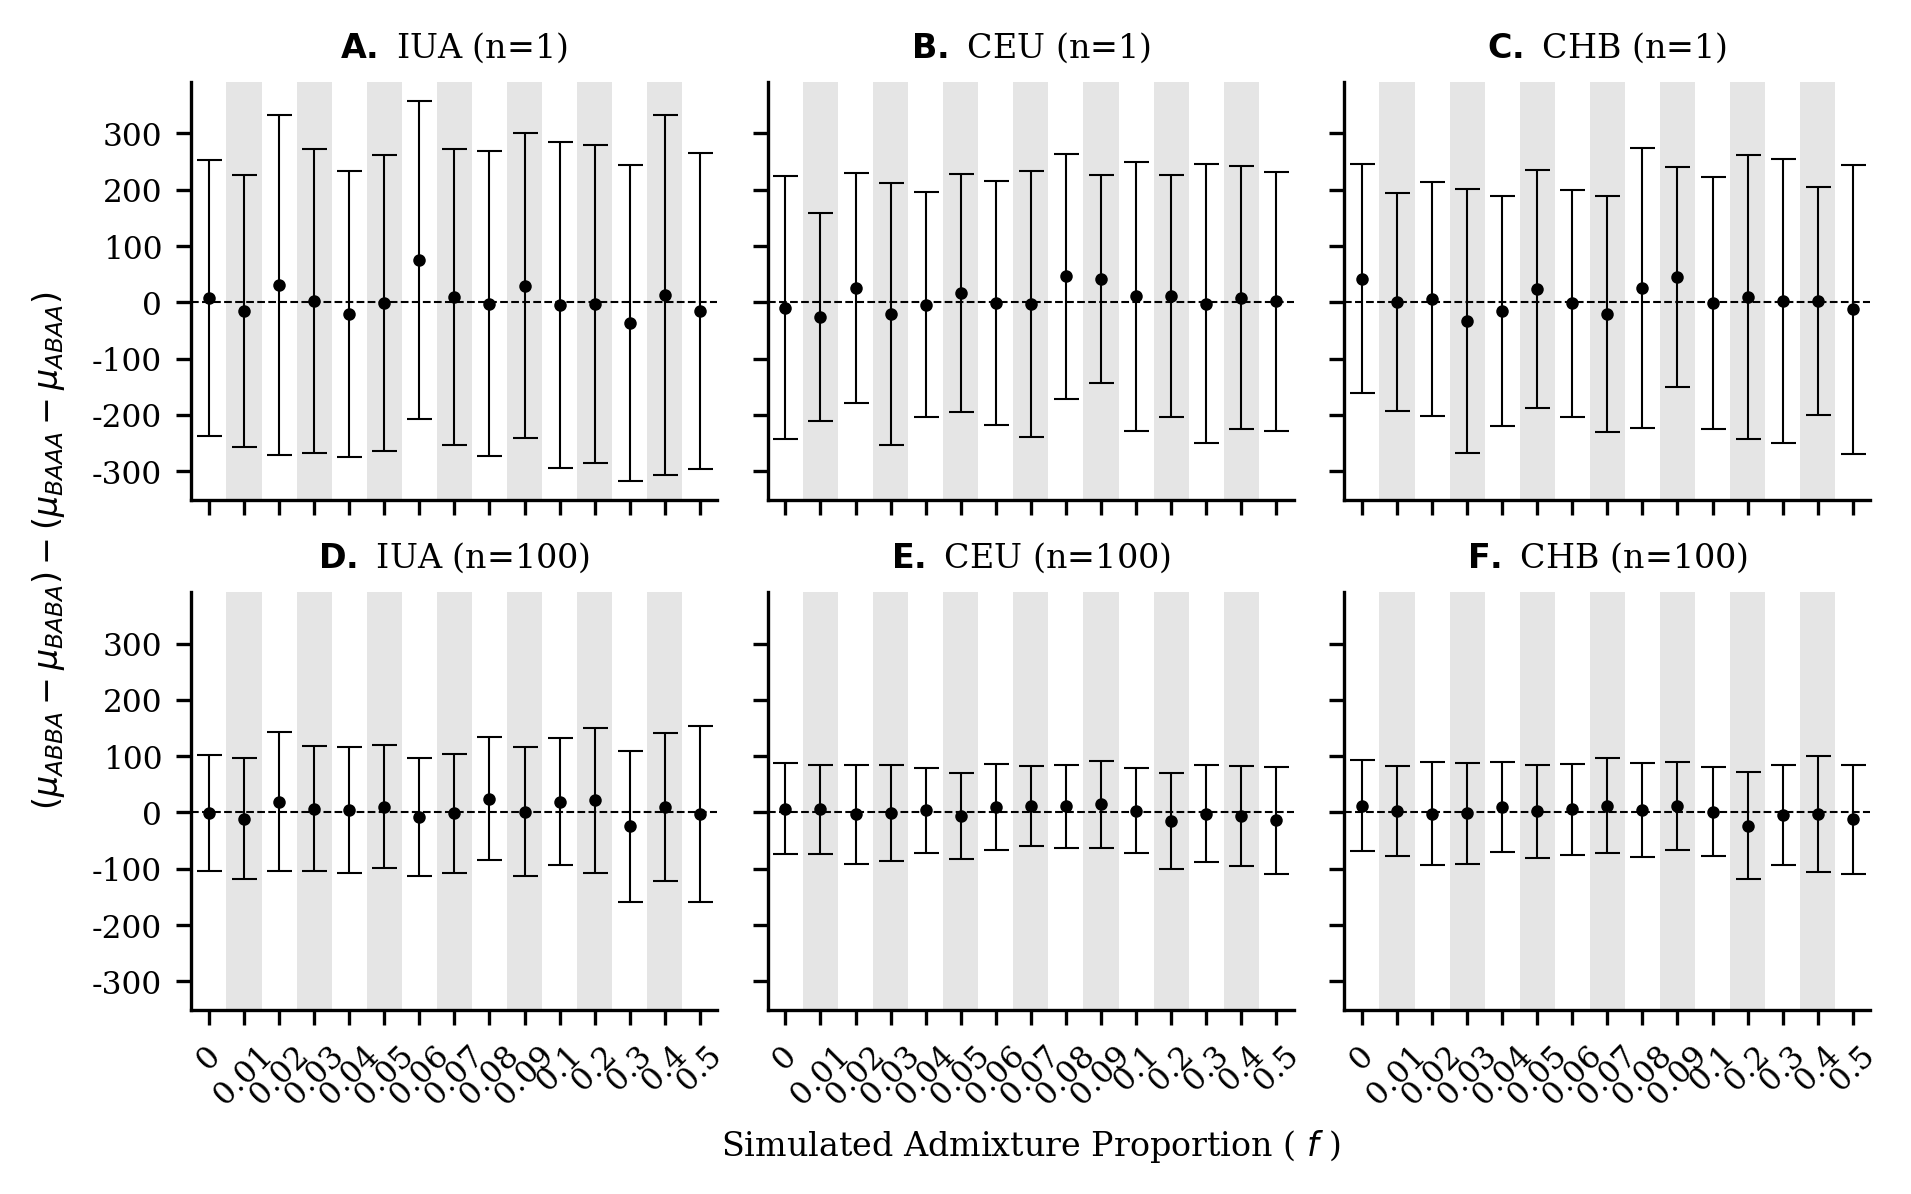

In [31]:
# Intialize list of x-axis tick labels.
all_x_ticks = [
    '0', '0.01', '0.02',
    '0.03', '0.04', '0.05',
    '0.06', '0.07', '0.08',
    '0.09', '0.1', '0.2',
    '0.3', '0.4', '0.5',
]
# Intialize data lists.
data_n1 = [all_n1_diffs, ceu_all_n1_diffs, chb_all_n1_diffs]
data_n100 = [all_n100_diffs, ceu_all_n100_diffs, chb_all_n100_diffs]
# Intialize a function for plotting the alternating background.
def alt_bands(ax=None):
    locs = np.arange(1, 15, 2)
    for loc in locs:
        ax.axvspan(loc-0.5, loc+0.5, facecolor='black', alpha=0.1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 8})
# Intialize the figure.
fig, axes = plt.subplots(
    2, 3, figsize=max_dim, dpi=300.0,
    sharex=True, sharey=True, facecolor='white', constrained_layout=True,
)
# For every result...
for idx in range(3):
    # Grab the results.
    n1 = data_n1[idx]
    n100 = data_n100[idx]
    # Plot the n=1 results.
    axes[0, idx].axhline(0, 0, 1, color='black', ls='dashed', lw=0.5)
    axes[0, idx].errorbar(
        np.arange(15), np.mean(n1, axis=1), capsize=3, ms=5,
        yerr=np.std(n1, axis=1), fmt='.', color='black', mew=0.5, lw=0.5,
    )
    alt_bands(axes[0, idx])
    axes[0, idx].spines['top'].set_visible(False)
    axes[0, idx].spines['right'].set_visible(False)
    # Plot the n=100 results.
    axes[1, idx].axhline(0, 0, 1, color='black', ls='dashed', lw=0.5)
    axes[1, idx].errorbar(
        np.arange(15), np.mean(n100, axis=1), capsize=3, ms=5,
        yerr=np.std(n100, axis=1), fmt='.', color='black', mew=0.5, lw=0.5,
    )
    alt_bands(axes[1, idx])
    axes[1, idx].spines['top'].set_visible(False)
    axes[1, idx].spines['right'].set_visible(False)
    axes[1, idx].set_xlim(-0.5, 14.5)
    axes[1, idx].set_xticks(np.arange(15))
    axes[1, idx].set_xticklabels(all_x_ticks, rotation=45, size=7.5)
# Title each subplot.
axes[0, 0].set_title(r'$\bf{A.}$'+' IUA (n=1)', size=8)
axes[0, 1].set_title(r'$\bf{B.}$'+' CEU (n=1)', size=8)
axes[0, 2].set_title(r'$\bf{C.}$'+' CHB (n=1)', size=8)
axes[1, 0].set_title(r'$\bf{D.}$'+' IUA (n=100)', size=8)
axes[1, 1].set_title(r'$\bf{E.}$'+' CEU (n=100)', size=8)
axes[1, 2].set_title(r'$\bf{F.}$'+' CHB (n=100)', size=8)
# Set the ticks and tick labels.
axes[0, 0].set_yticks([-300, -200, -100, 0, 100, 200, 300])
axes[0, 0].set_yticklabels(['-300', '-200', '-100', '0', '100', '200', '300'], size=7.5)
axes[1, 0].set_yticks([-300, -200, -100, 0, 100, 200, 300])
axes[1, 0].set_yticklabels(['-300', '-200', '-100', '0', '100', '200', '300'], size=7.5)
# Label the axes.
axes[1, 1].set_xlabel('Simulated Admixture Proportion '+'( '+r'$f$'+' )', size=8)
fig.supylabel(r'$(\mu_{ABBA} - \mu_{BABA}) - (\mu_{BAAA} - \mu_{ABAA})$', y=0.54, size=8)
# Export figure.
plt.savefig('./figures/sim_site_pattern_diff.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show the plot!
plt.show()

## Power to Detect Introgression

First, we calculate and load the power values for each admixture proportion.

In [32]:
# Load iua power values.
power_n1_f00 = iua_power(1, 0.0)
power_n1_f01 = iua_power(1, 0.01)
power_n1_f02 = iua_power(1, 0.02)
power_n1_f03 = iua_power(1, 0.03)
power_n1_f04 = iua_power(1, 0.04)
power_n1_f05 = iua_power(1, 0.05)
power_n1_f06 = iua_power(1, 0.06)
power_n1_f07 = iua_power(1, 0.07)
power_n1_f08 = iua_power(1, 0.08)
power_n1_f09 = iua_power(1, 0.09)
power_n1_f10 = iua_power(1, 0.1)
power_n1_f20 = iua_power(1, 0.2)
power_n1_f30 = iua_power(1, 0.3)
power_n1_f40 = iua_power(1, 0.4)
power_n1_f50 = iua_power(1, 0.5)
# Load iua power values.
power_n100_f00 = iua_power(100, 0.0)
power_n100_f01 = iua_power(100, 0.01)
power_n100_f02 = iua_power(100, 0.02)
power_n100_f03 = iua_power(100, 0.03)
power_n100_f04 = iua_power(100, 0.04)
power_n100_f05 = iua_power(100, 0.05)
power_n100_f06 = iua_power(100, 0.06)
power_n100_f07 = iua_power(100, 0.07)
power_n100_f08 = iua_power(100, 0.08)
power_n100_f09 = iua_power(100, 0.09)
power_n100_f10 = iua_power(100, 0.1)
power_n100_f20 = iua_power(100, 0.2)
power_n100_f30 = iua_power(100, 0.3)
power_n100_f40 = iua_power(100, 0.4)
power_n100_f50 = iua_power(100, 0.5)

In [33]:
# Load ceu power values.
ceu_power_n1_f00 = ragsdale_calc_power(1, 0.0, 'ceu')
ceu_power_n1_f01 = ragsdale_calc_power(1, 0.01, 'ceu')
ceu_power_n1_f02 = ragsdale_calc_power(1, 0.02, 'ceu')
ceu_power_n1_f03 = ragsdale_calc_power(1, 0.03, 'ceu')
ceu_power_n1_f04 = ragsdale_calc_power(1, 0.04, 'ceu')
ceu_power_n1_f05 = ragsdale_calc_power(1, 0.05, 'ceu')
ceu_power_n1_f06 = ragsdale_calc_power(1, 0.06, 'ceu')
ceu_power_n1_f07 = ragsdale_calc_power(1, 0.07, 'ceu')
ceu_power_n1_f08 = ragsdale_calc_power(1, 0.08, 'ceu')
ceu_power_n1_f09 = ragsdale_calc_power(1, 0.09, 'ceu')
ceu_power_n1_f10 = ragsdale_calc_power(1, 0.1, 'ceu')
ceu_power_n1_f20 = ragsdale_calc_power(1, 0.2, 'ceu')
ceu_power_n1_f30 = ragsdale_calc_power(1, 0.3, 'ceu')
ceu_power_n1_f40 = ragsdale_calc_power(1, 0.4, 'ceu')
ceu_power_n1_f50 = ragsdale_calc_power(1, 0.5, 'ceu')
ceu_power_n1_org = ragsdale_calc_power(1, 'org', 'ceu')
ceu_power_n100_f00 = ragsdale_calc_power(100, 0.0, 'ceu')
ceu_power_n100_f01 = ragsdale_calc_power(100, 0.01, 'ceu')
ceu_power_n100_f02 = ragsdale_calc_power(100, 0.02, 'ceu')
ceu_power_n100_f03 = ragsdale_calc_power(100, 0.03, 'ceu')
ceu_power_n100_f04 = ragsdale_calc_power(100, 0.04, 'ceu')
ceu_power_n100_f05 = ragsdale_calc_power(100, 0.05, 'ceu')
ceu_power_n100_f06 = ragsdale_calc_power(100, 0.06, 'ceu')
ceu_power_n100_f07 = ragsdale_calc_power(100, 0.07, 'ceu')
ceu_power_n100_f08 = ragsdale_calc_power(100, 0.08, 'ceu')
ceu_power_n100_f09 = ragsdale_calc_power(100, 0.09, 'ceu')
ceu_power_n100_f10 = ragsdale_calc_power(100, 0.1, 'ceu')
ceu_power_n100_f20 = ragsdale_calc_power(100, 0.2, 'ceu')
ceu_power_n100_f30 = ragsdale_calc_power(100, 0.3, 'ceu')
ceu_power_n100_f40 = ragsdale_calc_power(100, 0.4, 'ceu')
ceu_power_n100_f50 = ragsdale_calc_power(100, 0.5, 'ceu')
ceu_power_n100_org = ragsdale_calc_power(100, 'org', 'ceu')
# Load chb power values.
chb_power_n1_f00 = ragsdale_calc_power(1, 0.0, 'chb')
chb_power_n1_f01 = ragsdale_calc_power(1, 0.01, 'chb')
chb_power_n1_f02 = ragsdale_calc_power(1, 0.02, 'chb')
chb_power_n1_f03 = ragsdale_calc_power(1, 0.03, 'chb')
chb_power_n1_f04 = ragsdale_calc_power(1, 0.04, 'chb')
chb_power_n1_f05 = ragsdale_calc_power(1, 0.05, 'chb')
chb_power_n1_f06 = ragsdale_calc_power(1, 0.06, 'chb')
chb_power_n1_f07 = ragsdale_calc_power(1, 0.07, 'chb')
chb_power_n1_f08 = ragsdale_calc_power(1, 0.08, 'chb')
chb_power_n1_f09 = ragsdale_calc_power(1, 0.09, 'chb')
chb_power_n1_f10 = ragsdale_calc_power(1, 0.1, 'chb')
chb_power_n1_f20 = ragsdale_calc_power(1, 0.2, 'chb')
chb_power_n1_f30 = ragsdale_calc_power(1, 0.3, 'chb')
chb_power_n1_f40 = ragsdale_calc_power(1, 0.4, 'chb')
chb_power_n1_f50 = ragsdale_calc_power(1, 0.5, 'chb')
chb_power_n1_org = ragsdale_calc_power(1, 'org', 'chb')
chb_power_n100_f00 = ragsdale_calc_power(100, 0.0, 'chb')
chb_power_n100_f01 = ragsdale_calc_power(100, 0.01, 'chb')
chb_power_n100_f02 = ragsdale_calc_power(100, 0.02, 'chb')
chb_power_n100_f03 = ragsdale_calc_power(100, 0.03, 'chb')
chb_power_n100_f04 = ragsdale_calc_power(100, 0.04, 'chb')
chb_power_n100_f05 = ragsdale_calc_power(100, 0.05, 'chb')
chb_power_n100_f06 = ragsdale_calc_power(100, 0.06, 'chb')
chb_power_n100_f07 = ragsdale_calc_power(100, 0.07, 'chb')
chb_power_n100_f08 = ragsdale_calc_power(100, 0.08, 'chb')
chb_power_n100_f09 = ragsdale_calc_power(100, 0.09, 'chb')
chb_power_n100_f10 = ragsdale_calc_power(100, 0.1, 'chb')
chb_power_n100_f20 = ragsdale_calc_power(100, 0.2, 'chb')
chb_power_n100_f30 = ragsdale_calc_power(100, 0.3, 'chb')
chb_power_n100_f40 = ragsdale_calc_power(100, 0.4, 'chb')
chb_power_n100_f50 = ragsdale_calc_power(100, 0.5, 'chb')
chb_power_n100_org = ragsdale_calc_power(100, 'org', 'chb')

Next, we calculate the power of each detection metric for the all admixture proportions.

In [34]:
# Create power arrays for the D statistic.
all_n1_power_d = np.array([
    power_n1_f00['d'],
    power_n1_f01['d'],
    power_n1_f02['d'],
    power_n1_f03['d'],
    power_n1_f04['d'],
    power_n1_f05['d'],
    power_n1_f06['d'],
    power_n1_f07['d'],
    power_n1_f08['d'],
    power_n1_f09['d'],
    power_n1_f10['d'],
    power_n1_f20['d'],
    power_n1_f30['d'],
    power_n1_f40['d'],
    power_n1_f50['d'],
])
ceu_all_n1_power_d = np.array([
    ceu_power_n1_f00['d'],
    ceu_power_n1_f01['d'],
    ceu_power_n1_f02['d'],
    ceu_power_n1_f03['d'],
    ceu_power_n1_f04['d'],
    ceu_power_n1_f05['d'],
    ceu_power_n1_f06['d'],
    ceu_power_n1_f07['d'],
    ceu_power_n1_f08['d'],
    ceu_power_n1_f09['d'],
    ceu_power_n1_f10['d'],
    ceu_power_n1_f20['d'],
    ceu_power_n1_f30['d'],
    ceu_power_n1_f40['d'],
    ceu_power_n1_f50['d'],
])
chb_all_n1_power_d = np.array([
    chb_power_n1_f00['d'],
    chb_power_n1_f01['d'],
    chb_power_n1_f02['d'],
    chb_power_n1_f03['d'],
    chb_power_n1_f04['d'],
    chb_power_n1_f05['d'],
    chb_power_n1_f06['d'],
    chb_power_n1_f07['d'],
    chb_power_n1_f08['d'],
    chb_power_n1_f09['d'],
    chb_power_n1_f10['d'],
    chb_power_n1_f20['d'],
    chb_power_n1_f30['d'],
    chb_power_n1_f40['d'],
    chb_power_n1_f50['d'],
])
# Create power arrays for the Danc statistic.
all_n1_power_danc = np.array([
    power_n1_f00['danc'],
    power_n1_f01['danc'],
    power_n1_f02['danc'],
    power_n1_f03['danc'],
    power_n1_f04['danc'],
    power_n1_f05['danc'],
    power_n1_f06['danc'],
    power_n1_f07['danc'],
    power_n1_f08['danc'],
    power_n1_f09['danc'],
    power_n1_f10['danc'],
    power_n1_f20['danc'],
    power_n1_f30['danc'],
    power_n1_f40['danc'],
    power_n1_f50['danc'],
])
ceu_all_n1_power_danc = np.array([
    ceu_power_n1_f00['danc'],
    ceu_power_n1_f01['danc'],
    ceu_power_n1_f02['danc'],
    ceu_power_n1_f03['danc'],
    ceu_power_n1_f04['danc'],
    ceu_power_n1_f05['danc'],
    ceu_power_n1_f06['danc'],
    ceu_power_n1_f07['danc'],
    ceu_power_n1_f08['danc'],
    ceu_power_n1_f09['danc'],
    ceu_power_n1_f10['danc'],
    ceu_power_n1_f20['danc'],
    ceu_power_n1_f30['danc'],
    ceu_power_n1_f40['danc'],
    ceu_power_n1_f50['danc'],
])
chb_all_n1_power_danc = np.array([
    chb_power_n1_f00['danc'],
    chb_power_n1_f01['danc'],
    chb_power_n1_f02['danc'],
    chb_power_n1_f03['danc'],
    chb_power_n1_f04['danc'],
    chb_power_n1_f05['danc'],
    chb_power_n1_f06['danc'],
    chb_power_n1_f07['danc'],
    chb_power_n1_f08['danc'],
    chb_power_n1_f09['danc'],
    chb_power_n1_f10['danc'],
    chb_power_n1_f20['danc'],
    chb_power_n1_f30['danc'],
    chb_power_n1_f40['danc'],
    chb_power_n1_f50['danc'],
])
# Create power arrays for the D+ statistic.
all_n1_power_dplus = np.array([
    power_n1_f00['dplus'],
    power_n1_f01['dplus'],
    power_n1_f02['dplus'],
    power_n1_f03['dplus'],
    power_n1_f04['dplus'],
    power_n1_f05['dplus'],
    power_n1_f06['dplus'],
    power_n1_f07['dplus'],
    power_n1_f08['dplus'],
    power_n1_f09['dplus'],
    power_n1_f10['dplus'],
    power_n1_f20['dplus'],
    power_n1_f30['dplus'],
    power_n1_f40['dplus'],
    power_n1_f50['dplus'],
])
ceu_all_n1_power_dplus = np.array([
    ceu_power_n1_f00['dplus'],
    ceu_power_n1_f01['dplus'],
    ceu_power_n1_f02['dplus'],
    ceu_power_n1_f03['dplus'],
    ceu_power_n1_f04['dplus'],
    ceu_power_n1_f05['dplus'],
    ceu_power_n1_f06['dplus'],
    ceu_power_n1_f07['dplus'],
    ceu_power_n1_f08['dplus'],
    ceu_power_n1_f09['dplus'],
    ceu_power_n1_f10['dplus'],
    ceu_power_n1_f20['dplus'],
    ceu_power_n1_f30['dplus'],
    ceu_power_n1_f40['dplus'],
    ceu_power_n1_f50['dplus'],
])
chb_all_n1_power_dplus = np.array([
    chb_power_n1_f00['dplus'],
    chb_power_n1_f01['dplus'],
    chb_power_n1_f02['dplus'],
    chb_power_n1_f03['dplus'],
    chb_power_n1_f04['dplus'],
    chb_power_n1_f05['dplus'],
    chb_power_n1_f06['dplus'],
    chb_power_n1_f07['dplus'],
    chb_power_n1_f08['dplus'],
    chb_power_n1_f09['dplus'],
    chb_power_n1_f10['dplus'],
    chb_power_n1_f20['dplus'],
    chb_power_n1_f30['dplus'],
    chb_power_n1_f40['dplus'],
    chb_power_n1_f50['dplus'],
])

In [35]:
# Create power arrays for the D statistic.
all_n100_power_d = np.array([
    power_n100_f00['d'],
    power_n100_f01['d'],
    power_n100_f02['d'],
    power_n100_f03['d'],
    power_n100_f04['d'],
    power_n100_f05['d'],
    power_n100_f06['d'],
    power_n100_f07['d'],
    power_n100_f08['d'],
    power_n100_f09['d'],
    power_n100_f10['d'],
    power_n100_f20['d'],
    power_n100_f30['d'],
    power_n100_f40['d'],
    power_n100_f50['d'],
])
ceu_all_n100_power_d = np.array([
    ceu_power_n100_f00['d'],
    ceu_power_n100_f01['d'],
    ceu_power_n100_f02['d'],
    ceu_power_n100_f03['d'],
    ceu_power_n100_f04['d'],
    ceu_power_n100_f05['d'],
    ceu_power_n100_f06['d'],
    ceu_power_n100_f07['d'],
    ceu_power_n100_f08['d'],
    ceu_power_n100_f09['d'],
    ceu_power_n100_f10['d'],
    ceu_power_n100_f20['d'],
    ceu_power_n100_f30['d'],
    ceu_power_n100_f40['d'],
    ceu_power_n100_f50['d'],
])
chb_all_n100_power_d = np.array([
    chb_power_n100_f00['d'],
    chb_power_n100_f01['d'],
    chb_power_n100_f02['d'],
    chb_power_n100_f03['d'],
    chb_power_n100_f04['d'],
    chb_power_n100_f05['d'],
    chb_power_n100_f06['d'],
    chb_power_n100_f07['d'],
    chb_power_n100_f08['d'],
    chb_power_n100_f09['d'],
    chb_power_n100_f10['d'],
    chb_power_n100_f20['d'],
    chb_power_n100_f30['d'],
    chb_power_n100_f40['d'],
    chb_power_n100_f50['d'],
])
# Create power arrays for the Danc statistic.
all_n100_power_danc = np.array([
    power_n100_f00['danc'],
    power_n100_f01['danc'],
    power_n100_f02['danc'],
    power_n100_f03['danc'],
    power_n100_f04['danc'],
    power_n100_f05['danc'],
    power_n100_f06['danc'],
    power_n100_f07['danc'],
    power_n100_f08['danc'],
    power_n100_f09['danc'],
    power_n100_f10['danc'],
    power_n100_f20['danc'],
    power_n100_f30['danc'],
    power_n100_f40['danc'],
    power_n100_f50['danc'],
])
ceu_all_n100_power_danc = np.array([
    ceu_power_n100_f00['danc'],
    ceu_power_n100_f01['danc'],
    ceu_power_n100_f02['danc'],
    ceu_power_n100_f03['danc'],
    ceu_power_n100_f04['danc'],
    ceu_power_n100_f05['danc'],
    ceu_power_n100_f06['danc'],
    ceu_power_n100_f07['danc'],
    ceu_power_n100_f08['danc'],
    ceu_power_n100_f09['danc'],
    ceu_power_n100_f10['danc'],
    ceu_power_n100_f20['danc'],
    ceu_power_n100_f30['danc'],
    ceu_power_n100_f40['danc'],
    ceu_power_n100_f50['danc'],
])
chb_all_n100_power_danc = np.array([
    chb_power_n100_f00['danc'],
    chb_power_n100_f01['danc'],
    chb_power_n100_f02['danc'],
    chb_power_n100_f03['danc'],
    chb_power_n100_f04['danc'],
    chb_power_n100_f05['danc'],
    chb_power_n100_f06['danc'],
    chb_power_n100_f07['danc'],
    chb_power_n100_f08['danc'],
    chb_power_n100_f09['danc'],
    chb_power_n100_f10['danc'],
    chb_power_n100_f20['danc'],
    chb_power_n100_f30['danc'],
    chb_power_n100_f40['danc'],
    chb_power_n100_f50['danc'],
])
# Create power arrays for the D+ statistic.
all_n100_power_dplus = np.array([
    power_n100_f00['dplus'],
    power_n100_f01['dplus'],
    power_n100_f02['dplus'],
    power_n100_f03['dplus'],
    power_n100_f04['dplus'],
    power_n100_f05['dplus'],
    power_n100_f06['dplus'],
    power_n100_f07['dplus'],
    power_n100_f08['dplus'],
    power_n100_f09['dplus'],
    power_n100_f10['dplus'],
    power_n100_f20['dplus'],
    power_n100_f30['dplus'],
    power_n100_f40['dplus'],
    power_n100_f50['dplus'],
])
ceu_all_n100_power_dplus = np.array([
    ceu_power_n100_f00['dplus'],
    ceu_power_n100_f01['dplus'],
    ceu_power_n100_f02['dplus'],
    ceu_power_n100_f03['dplus'],
    ceu_power_n100_f04['dplus'],
    ceu_power_n100_f05['dplus'],
    ceu_power_n100_f06['dplus'],
    ceu_power_n100_f07['dplus'],
    ceu_power_n100_f08['dplus'],
    ceu_power_n100_f09['dplus'],
    ceu_power_n100_f10['dplus'],
    ceu_power_n100_f20['dplus'],
    ceu_power_n100_f30['dplus'],
    ceu_power_n100_f40['dplus'],
    ceu_power_n100_f50['dplus'],
])
chb_all_n100_power_dplus = np.array([
    chb_power_n100_f00['dplus'],
    chb_power_n100_f01['dplus'],
    chb_power_n100_f02['dplus'],
    chb_power_n100_f03['dplus'],
    chb_power_n100_f04['dplus'],
    chb_power_n100_f05['dplus'],
    chb_power_n100_f06['dplus'],
    chb_power_n100_f07['dplus'],
    chb_power_n100_f08['dplus'],
    chb_power_n100_f09['dplus'],
    chb_power_n100_f10['dplus'],
    chb_power_n100_f20['dplus'],
    chb_power_n100_f30['dplus'],
    chb_power_n100_f40['dplus'],
    chb_power_n100_f50['dplus'],
])

Now we summarize the power results for all admixture proportions.

In [36]:
# Create a pandas dataframe for the all admixture proportions results.
all_power_n1_df = pd.DataFrame(
    data={
        r'$D$': all_n1_power_d,
        r'$D_{anc}$': all_n1_power_danc,
        r'$D+$': all_n1_power_dplus,
    },
    index=all_admix_props,
)
all_power_n1_df

,$D$,$D_{anc}$,$D+$
$f = 0$,0.13,0.07,0.08
$f = 0.01$,0.34,0.27,0.34
$f = 0.02$,0.56,0.39,0.52
$f = 0.03$,0.87,0.63,0.86
$f = 0.04$,0.96,0.89,0.95
$f = 0.05$,0.99,0.92,0.99
$f = 0.06$,1.00,0.95,1.00
$f = 0.07$,1.00,0.97,1.00
$f = 0.08$,1.00,1.00,1.00
$f = 0.09$,1.00,1.00,1.00


In [37]:
# Create a pandas dataframe for the all admixture proportions results.
all_power_n100_df = pd.DataFrame(
    data={
        r'$D$': all_n100_power_d,
        r'$D_{anc}$': all_n100_power_danc,
        r'$D+$': all_n100_power_dplus,
    },
    index=all_admix_props,
)
all_power_n100_df

,$D$,$D_{anc}$,$D+$
$f = 0$,0.11,0.08,0.10
$f = 0.01$,0.66,0.50,0.60
$f = 0.02$,0.98,0.88,0.96
$f = 0.03$,1.00,0.98,1.00
$f = 0.04$,1.00,1.00,1.00
$f = 0.05$,1.00,1.00,1.00
$f = 0.06$,1.00,1.00,1.00
$f = 0.07$,1.00,1.00,1.00
$f = 0.08$,1.00,1.00,1.00
$f = 0.09$,1.00,1.00,1.00


In [38]:
# Create a pandas dataframe for the all admixture proportions results.
ceu_all_power_n1_df = pd.DataFrame(
    data={
        r'$D$': np.append(ceu_all_n1_power_d, ceu_power_n1_org['d']),
        r'$D_{anc}$': np.append(ceu_all_n1_power_danc, ceu_power_n1_org['danc']),
        r'$D+$': np.append(ceu_all_n1_power_dplus, ceu_power_n1_org['dplus']),
    },
    index=ceu_all_admix_props,
)
ceu_all_power_n1_df

,$D$,$D_{anc}$,$D+$
$f = 0$,0.13,0.11,0.13
$f = 0.01$,0.54,0.25,0.44
$f = 0.02$,0.87,0.46,0.66
$f = 0.03$,1.00,0.78,0.89
$f = 0.04$,1.00,0.88,0.94
$f = 0.05$,1.00,0.93,1.00
$f = 0.06$,1.00,0.98,0.99
$f = 0.07$,1.00,1.00,1.00
$f = 0.08$,1.00,1.00,1.00
$f = 0.09$,1.00,1.00,1.00


In [39]:
# Create a pandas dataframe for the all admixture proportions results.
ceu_all_power_n100_df = pd.DataFrame(
    data={
        r'$D$': np.append(ceu_all_n100_power_d, ceu_power_n100_org['d']),
        r'$D_{anc}$': np.append(ceu_all_n100_power_danc, ceu_power_n100_org['danc']),
        r'$D+$': np.append(ceu_all_n100_power_dplus, ceu_power_n100_org['dplus']),
    },
    index=ceu_all_admix_props,
)
ceu_all_power_n100_df

,$D$,$D_{anc}$,$D+$
$f = 0$,0.0,0.00,0.00
$f = 0.01$,0.6,0.20,0.39
$f = 0.02$,1.0,0.54,0.85
$f = 0.03$,1.0,0.90,1.00
$f = 0.04$,1.0,0.98,1.00
$f = 0.05$,1.0,1.00,1.00
$f = 0.06$,1.0,1.00,1.00
$f = 0.07$,1.0,1.00,1.00
$f = 0.08$,1.0,1.00,1.00
$f = 0.09$,1.0,1.00,1.00


In [40]:
# Create a pandas dataframe for the all admixture proportions results.
chb_all_power_n1_df = pd.DataFrame(
    data={
        r'$D$': np.append(chb_all_n1_power_d, chb_power_n1_org['d']),
        r'$D_{anc}$': np.append(chb_all_n1_power_danc, chb_power_n1_org['danc']),
        r'$D+$': np.append(chb_all_n1_power_dplus, chb_power_n1_org['dplus']),
    },
    index=chb_all_admix_props,
)
chb_all_power_n1_df

,$D$,$D_{anc}$,$D+$
$f = 0$,0.16,0.07,0.11
$f = 0.01$,0.49,0.26,0.36
$f = 0.02$,0.91,0.54,0.76
$f = 0.03$,0.97,0.77,0.87
$f = 0.04$,1.00,0.86,0.95
$f = 0.05$,1.00,0.91,0.97
$f = 0.06$,1.00,0.97,0.99
$f = 0.07$,1.00,1.00,1.00
$f = 0.08$,1.00,1.00,1.00
$f = 0.09$,1.00,1.00,1.00


In [41]:
# Create a pandas dataframe for the all admixture proportions results.
chb_all_power_n100_df = pd.DataFrame(
    data={
        r'$D$': np.append(chb_all_n100_power_d, chb_power_n100_org['d']),
        r'$D_{anc}$': np.append(chb_all_n100_power_danc, chb_power_n100_org['danc']),
        r'$D+$': np.append(chb_all_n100_power_dplus, chb_power_n100_org['dplus']),
    },
    index=chb_all_admix_props,
)
chb_all_power_n100_df

,$D$,$D_{anc}$,$D+$
$f = 0$,0.00,0.00,0.00
$f = 0.01$,0.69,0.18,0.47
$f = 0.02$,0.96,0.50,0.83
$f = 0.03$,1.00,0.90,0.98
$f = 0.04$,1.00,0.93,0.98
$f = 0.05$,1.00,0.99,1.00
$f = 0.06$,1.00,1.00,1.00
$f = 0.07$,1.00,1.00,1.00
$f = 0.08$,1.00,1.00,1.00
$f = 0.09$,1.00,1.00,1.00


In [42]:
# Intialize the table header.
header = r'\begin{tabular}{@{}lcccccc@{}}'+'\n'\
+r'\toprule'+'\n'\
+r' & \multicolumn{3}{c}{$n=1$} & \multicolumn{3}{c}{$n=100$} \\'+'\n'\
+r'\cmidrule(lr){2-4} \cmidrule(lr){5-7}'+'\n'\
+r' & $D$ & $D_{anc}$ & $D+$ & $D$ & $D_{anc}$ & $D+$ \\'+'\n'\
+r'\midrule'+'\n'\
# Intialize the table footer.
footer = r'\bottomrule'+'\n'+r'\end{tabular}'+'\n'
# Intialize a list of table names.
names = ['iua_power.tex', 'ceu_power.tex', 'chb_power.tex']
# Intalize a list of indicies.
indicies = [all_admix_props, ceu_all_admix_props, chb_all_admix_props]
# Intialize a list of dataframes.
dfs = [
    (all_power_n1_df.to_numpy(), all_power_n100_df.to_numpy()),
    (ceu_all_power_n1_df.to_numpy(), ceu_all_power_n100_df.to_numpy()),
    (chb_all_power_n1_df.to_numpy(), chb_all_power_n100_df.to_numpy()),
]
# For all three models...
for idx in range(3):
    # Grab the admixture proportions.
    fs = indicies[idx]
    # Grab the two dataframes.
    n1_df = dfs[idx][0]
    n100_df = dfs[idx][1]
    # Open the table.
    table = open('./tables/{0}'.format(names[idx]), 'w')
    # Write the header.
    table.write(header)
    # For every admixture proportion.
    for f in range(fs.size):
        # Write the results.
        table.write(
            r'{0} & {1} & {2} & {3} & {4} & {5} & {6} \\'.format(
                fs[f],
                round(n1_df[f, 0], 3), round(n1_df[f, 1], 3), round(n1_df[f, 2], 3),
                round(n100_df[f, 0], 3), round(n100_df[f, 1], 3), round(n100_df[f, 2], 3),
            )+'\n')
    # Write the footer.
    table.write(footer)
    # Close the table file.
    table.close()

Now, we plot the power curves.

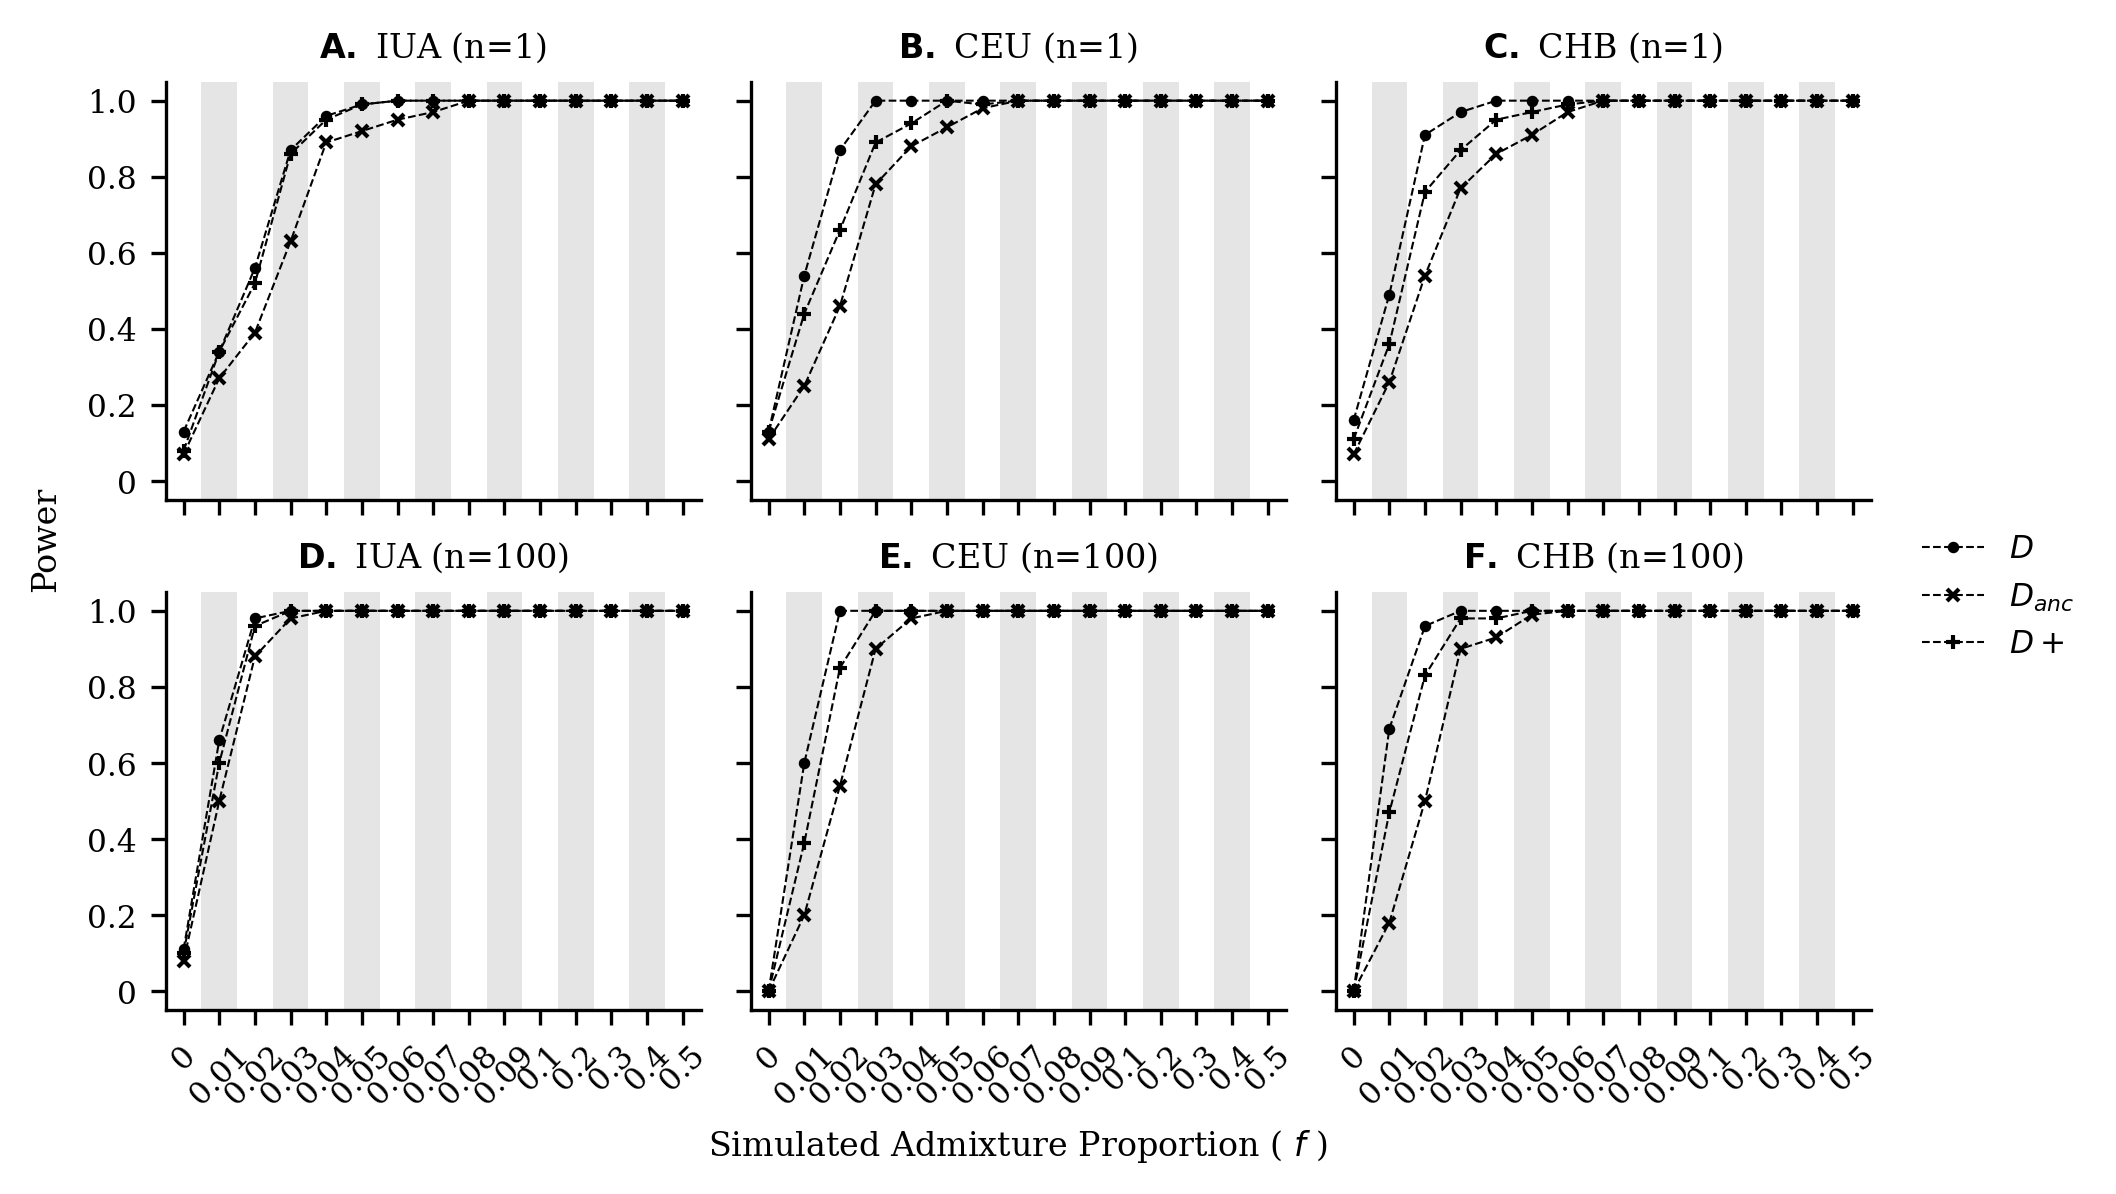

In [43]:
# Intialize data lists.
data_n1 = [
    (all_n1_power_d, all_n1_power_danc, all_n1_power_dplus),
    (ceu_all_n1_power_d, ceu_all_n1_power_danc, ceu_all_n1_power_dplus),
    (chb_all_n1_power_d, chb_all_n1_power_danc, chb_all_n1_power_dplus),
]
data_n100 = [
    (all_n100_power_d, all_n100_power_danc, all_n100_power_dplus),
    (ceu_all_n100_power_d, ceu_all_n100_power_danc, ceu_all_n100_power_dplus),
    (chb_all_n100_power_d, chb_all_n100_power_danc, chb_all_n100_power_dplus),
]
# Intialize a function for plotting the alternating background.
def alt_bands(ax=None):
    locs = np.arange(1, 15, 2)
    for loc in locs:
        ax.axvspan(loc-0.5, loc+0.5, facecolor='black', alpha=0.1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 8})
# Intialize the figure.
fig, axes = plt.subplots(
    2, 3, figsize=max_dim, dpi=300.0,
    sharex=True, sharey=True, facecolor='white', constrained_layout=True,
)
# For every result...
for idx in range(3):
    # Grab the results.
    n1_d, n1_danc, n1_dplus = data_n1[idx]
    n100_d, n100_danc, n100_dplus = data_n100[idx]
    # Plot the n=1 results.
    axes[0, idx].plot(
        np.arange(15), n1_d, color='black', ls='--',
        marker='.', ms=3.5, lw=0.5, mew=1,
    )
    axes[0, idx].plot(
        np.arange(15), n1_danc, color='black', ls='--',
        marker='x', ms=3, lw=0.5, mew=1,
    )
    axes[0, idx].plot(
        np.arange(15), n1_dplus,  color='black', ls='--',
        marker='+', ms=3.5, lw=0.5, mew=1,
    )
    alt_bands(axes[0, idx])
    axes[0, idx].spines['top'].set_visible(False)
    axes[0, idx].spines['right'].set_visible(False)
    # If this is the last index...
    if idx == 2:
        # Plot the n=100 results with labels.
        axes[1, idx].plot(
            np.arange(15), n100_d, color='black', ls='--',
            marker='.', ms=3.5, lw=0.5, mew=1, label=r'$D$',
        )
        axes[1, idx].plot(
            np.arange(15), n100_danc, color='black', ls='--',
            marker='x', ms=3, lw=0.5, mew=1, label=r'$D_{anc}$',
        )
        axes[1, idx].plot(
            np.arange(15), n100_dplus,  color='black', ls='--',
            marker='+', ms=3.5, lw=0.5, mew=1, label=r'$D+$',
        )
    # Else...
    else:
        # Plot the n=100 results.
        axes[1, idx].plot(
            np.arange(15), n100_d, color='black', ls='--',
            marker='.', ms=3.5, lw=0.5, mew=1,
        )
        axes[1, idx].plot(
            np.arange(15), n100_danc, color='black', ls='--',
            marker='x', ms=3, lw=0.5, mew=1,
        )
        axes[1, idx].plot(
            np.arange(15), n100_dplus,  color='black', ls='--',
            marker='+', ms=3.5, lw=0.5, mew=1,
        )
    alt_bands(axes[1, idx])
    axes[1, idx].spines['top'].set_visible(False)
    axes[1, idx].spines['right'].set_visible(False)
    axes[1, idx].set_xlim(-0.5, 14.5)
    axes[1, idx].set_xticks(np.arange(15))
    axes[1, idx].set_xticklabels(all_x_ticks, rotation=45, size=7.5)
# Title each subplot.
axes[0, 0].set_title(r'$\bf{A.}$'+' IUA (n=1)', size=8)
axes[0, 1].set_title(r'$\bf{B.}$'+' CEU (n=1)', size=8)
axes[0, 2].set_title(r'$\bf{C.}$'+' CHB (n=1)', size=8)
axes[1, 0].set_title(r'$\bf{D.}$'+' IUA (n=100)', size=8)
axes[1, 1].set_title(r'$\bf{E.}$'+' CEU (n=100)', size=8)
axes[1, 2].set_title(r'$\bf{F.}$'+' CHB (n=100)', size=8)
# Construct the legend.
fig.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), prop={'size': 7.5}, frameon=False)
# Set the ticks and tick labels.
axes[0, 0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes[0, 0].set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'], size=7.5)
axes[1, 0].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes[1, 0].set_yticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1.0'], size=7.5)
# Label the axes.
axes[1, 1].set_xlabel('Simulated Admixture Proportion '+'( '+r'$f$'+' )', size=8)
fig.supylabel('Power', y=0.55, size=8)
# Export figure.
plt.savefig('./figures/sim_power.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show the plot!
plt.show()

Next, we consolidate the results to compare to the analytical expectations.

In [44]:
# Consolidate the results for the D statistic.
all_n1_d = np.array([
    obs_n1_f00['d'],
    obs_n1_f01['d'],
    obs_n1_f02['d'],
    obs_n1_f03['d'],
    obs_n1_f04['d'],
    obs_n1_f05['d'],
    obs_n1_f06['d'],
    obs_n1_f07['d'],
    obs_n1_f08['d'],
    obs_n1_f09['d'],
    obs_n1_f10['d'],
    obs_n1_f20['d'],
    obs_n1_f30['d'],
    obs_n1_f40['d'],
    obs_n1_f50['d'],
])
all_n100_d = np.array([
    obs_n100_f00['d'],
    obs_n100_f01['d'],
    obs_n100_f02['d'],
    obs_n100_f03['d'],
    obs_n100_f04['d'],
    obs_n100_f05['d'],
    obs_n100_f06['d'],
    obs_n100_f07['d'],
    obs_n100_f08['d'],
    obs_n100_f09['d'],
    obs_n100_f10['d'],
    obs_n100_f20['d'],
    obs_n100_f30['d'],
    obs_n100_f40['d'],
    obs_n100_f50['d'],
])
# Consolidate the results for the Danc statistic.
all_n1_danc = np.array([
    obs_n1_f00['danc'],
    obs_n1_f01['danc'],
    obs_n1_f02['danc'],
    obs_n1_f03['danc'],
    obs_n1_f04['danc'],
    obs_n1_f05['danc'],
    obs_n1_f06['danc'],
    obs_n1_f07['danc'],
    obs_n1_f08['danc'],
    obs_n1_f09['danc'],
    obs_n1_f10['danc'],
    obs_n1_f20['danc'],
    obs_n1_f30['danc'],
    obs_n1_f40['danc'],
    obs_n1_f50['danc'],
])
all_n100_danc = np.array([
    obs_n100_f00['danc'],
    obs_n100_f01['danc'],
    obs_n100_f02['danc'],
    obs_n100_f03['danc'],
    obs_n100_f04['danc'],
    obs_n100_f05['danc'],
    obs_n100_f06['danc'],
    obs_n100_f07['danc'],
    obs_n100_f08['danc'],
    obs_n100_f09['danc'],
    obs_n100_f10['danc'],
    obs_n100_f20['danc'],
    obs_n100_f30['danc'],
    obs_n100_f40['danc'],
    obs_n100_f50['danc'],
])
# Consolidate the results for the D+ statistic.
all_n1_dplus = np.array([
    obs_n1_f00['dplus'],
    obs_n1_f01['dplus'],
    obs_n1_f02['dplus'],
    obs_n1_f03['dplus'],
    obs_n1_f04['dplus'],
    obs_n1_f05['dplus'],
    obs_n1_f06['dplus'],
    obs_n1_f07['dplus'],
    obs_n1_f08['dplus'],
    obs_n1_f09['dplus'],
    obs_n1_f10['dplus'],
    obs_n1_f20['dplus'],
    obs_n1_f30['dplus'],
    obs_n1_f40['dplus'],
    obs_n1_f50['dplus'],
])
all_n100_dplus = np.array([
    obs_n100_f00['dplus'],
    obs_n100_f01['dplus'],
    obs_n100_f02['dplus'],
    obs_n100_f03['dplus'],
    obs_n100_f04['dplus'],
    obs_n100_f05['dplus'],
    obs_n100_f06['dplus'],
    obs_n100_f07['dplus'],
    obs_n100_f08['dplus'],
    obs_n100_f09['dplus'],
    obs_n100_f10['dplus'],
    obs_n100_f20['dplus'],
    obs_n100_f30['dplus'],
    obs_n100_f40['dplus'],
    obs_n100_f50['dplus'],
])

In [45]:
# Consolidate the results for the D statistic.
ceu_all_n1_d = np.array([
    ceu_obs_n1_f00['d'],
    ceu_obs_n1_f01['d'],
    ceu_obs_n1_f02['d'],
    ceu_obs_n1_f03['d'],
    ceu_obs_n1_f04['d'],
    ceu_obs_n1_f05['d'],
    ceu_obs_n1_f06['d'],
    ceu_obs_n1_f07['d'],
    ceu_obs_n1_f08['d'],
    ceu_obs_n1_f09['d'],
    ceu_obs_n1_f10['d'],
    ceu_obs_n1_f20['d'],
    ceu_obs_n1_f30['d'],
    ceu_obs_n1_f40['d'],
    ceu_obs_n1_f50['d'],
    ceu_obs_n1_org['d'],
])
ceu_all_n100_d = np.array([
    ceu_obs_n100_f00['d'],
    ceu_obs_n100_f01['d'],
    ceu_obs_n100_f02['d'],
    ceu_obs_n100_f03['d'],
    ceu_obs_n100_f04['d'],
    ceu_obs_n100_f05['d'],
    ceu_obs_n100_f06['d'],
    ceu_obs_n100_f07['d'],
    ceu_obs_n100_f08['d'],
    ceu_obs_n100_f09['d'],
    ceu_obs_n100_f10['d'],
    ceu_obs_n100_f20['d'],
    ceu_obs_n100_f30['d'],
    ceu_obs_n100_f40['d'],
    ceu_obs_n100_f50['d'],
    ceu_obs_n100_org['d'],
])
# Consolidate the results for the Danc statistic.
ceu_all_n1_danc = np.array([
    ceu_obs_n1_f00['danc'],
    ceu_obs_n1_f01['danc'],
    ceu_obs_n1_f02['danc'],
    ceu_obs_n1_f03['danc'],
    ceu_obs_n1_f04['danc'],
    ceu_obs_n1_f05['danc'],
    ceu_obs_n1_f06['danc'],
    ceu_obs_n1_f07['danc'],
    ceu_obs_n1_f08['danc'],
    ceu_obs_n1_f09['danc'],
    ceu_obs_n1_f10['danc'],
    ceu_obs_n1_f20['danc'],
    ceu_obs_n1_f30['danc'],
    ceu_obs_n1_f40['danc'],
    ceu_obs_n1_f50['danc'],
    ceu_obs_n1_org['danc'],
])
ceu_all_n100_danc = np.array([
    ceu_obs_n100_f00['danc'],
    ceu_obs_n100_f01['danc'],
    ceu_obs_n100_f02['danc'],
    ceu_obs_n100_f03['danc'],
    ceu_obs_n100_f04['danc'],
    ceu_obs_n100_f05['danc'],
    ceu_obs_n100_f06['danc'],
    ceu_obs_n100_f07['danc'],
    ceu_obs_n100_f08['danc'],
    ceu_obs_n100_f09['danc'],
    ceu_obs_n100_f10['danc'],
    ceu_obs_n100_f20['danc'],
    ceu_obs_n100_f30['danc'],
    ceu_obs_n100_f40['danc'],
    ceu_obs_n100_f50['danc'],
    ceu_obs_n100_org['danc'],
])
# Consolidate the results for the D+ statistic.
ceu_all_n1_dplus = np.array([
    ceu_obs_n1_f00['dplus'],
    ceu_obs_n1_f01['dplus'],
    ceu_obs_n1_f02['dplus'],
    ceu_obs_n1_f03['dplus'],
    ceu_obs_n1_f04['dplus'],
    ceu_obs_n1_f05['dplus'],
    ceu_obs_n1_f06['dplus'],
    ceu_obs_n1_f07['dplus'],
    ceu_obs_n1_f08['dplus'],
    ceu_obs_n1_f09['dplus'],
    ceu_obs_n1_f10['dplus'],
    ceu_obs_n1_f20['dplus'],
    ceu_obs_n1_f30['dplus'],
    ceu_obs_n1_f40['dplus'],
    ceu_obs_n1_f50['dplus'],
    ceu_obs_n1_org['dplus'],
])
ceu_all_n100_dplus = np.array([
    ceu_obs_n100_f00['dplus'],
    ceu_obs_n100_f01['dplus'],
    ceu_obs_n100_f02['dplus'],
    ceu_obs_n100_f03['dplus'],
    ceu_obs_n100_f04['dplus'],
    ceu_obs_n100_f05['dplus'],
    ceu_obs_n100_f06['dplus'],
    ceu_obs_n100_f07['dplus'],
    ceu_obs_n100_f08['dplus'],
    ceu_obs_n100_f09['dplus'],
    ceu_obs_n100_f10['dplus'],
    ceu_obs_n100_f20['dplus'],
    ceu_obs_n100_f30['dplus'],
    ceu_obs_n100_f40['dplus'],
    ceu_obs_n100_f50['dplus'],
    ceu_obs_n100_org['dplus'],
])

In [46]:
# Consolidate the results for the D statistic.
chb_all_n1_d = np.array([
    chb_obs_n1_f00['d'],
    chb_obs_n1_f01['d'],
    chb_obs_n1_f02['d'],
    chb_obs_n1_f03['d'],
    chb_obs_n1_f04['d'],
    chb_obs_n1_f05['d'],
    chb_obs_n1_f06['d'],
    chb_obs_n1_f07['d'],
    chb_obs_n1_f08['d'],
    chb_obs_n1_f09['d'],
    chb_obs_n1_f10['d'],
    chb_obs_n1_f20['d'],
    chb_obs_n1_f30['d'],
    chb_obs_n1_f40['d'],
    chb_obs_n1_f50['d'],
    chb_obs_n1_org['d'],
])
chb_all_n100_d = np.array([
    chb_obs_n100_f00['d'],
    chb_obs_n100_f01['d'],
    chb_obs_n100_f02['d'],
    chb_obs_n100_f03['d'],
    chb_obs_n100_f04['d'],
    chb_obs_n100_f05['d'],
    chb_obs_n100_f06['d'],
    chb_obs_n100_f07['d'],
    chb_obs_n100_f08['d'],
    chb_obs_n100_f09['d'],
    chb_obs_n100_f10['d'],
    chb_obs_n100_f20['d'],
    chb_obs_n100_f30['d'],
    chb_obs_n100_f40['d'],
    chb_obs_n100_f50['d'],
    chb_obs_n100_org['d'],
])
# Consolidate the results for the Danc statistic.
chb_all_n1_danc = np.array([
    chb_obs_n1_f00['danc'],
    chb_obs_n1_f01['danc'],
    chb_obs_n1_f02['danc'],
    chb_obs_n1_f03['danc'],
    chb_obs_n1_f04['danc'],
    chb_obs_n1_f05['danc'],
    chb_obs_n1_f06['danc'],
    chb_obs_n1_f07['danc'],
    chb_obs_n1_f08['danc'],
    chb_obs_n1_f09['danc'],
    chb_obs_n1_f10['danc'],
    chb_obs_n1_f20['danc'],
    chb_obs_n1_f30['danc'],
    chb_obs_n1_f40['danc'],
    chb_obs_n1_f50['danc'],
    chb_obs_n1_org['danc'],
])
chb_all_n100_danc = np.array([
    chb_obs_n100_f00['danc'],
    chb_obs_n100_f01['danc'],
    chb_obs_n100_f02['danc'],
    chb_obs_n100_f03['danc'],
    chb_obs_n100_f04['danc'],
    chb_obs_n100_f05['danc'],
    chb_obs_n100_f06['danc'],
    chb_obs_n100_f07['danc'],
    chb_obs_n100_f08['danc'],
    chb_obs_n100_f09['danc'],
    chb_obs_n100_f10['danc'],
    chb_obs_n100_f20['danc'],
    chb_obs_n100_f30['danc'],
    chb_obs_n100_f40['danc'],
    chb_obs_n100_f50['danc'],
    chb_obs_n100_org['danc'],
])
# Consolidate the results for the D+ statistic.
chb_all_n1_dplus = np.array([
    chb_obs_n1_f00['dplus'],
    chb_obs_n1_f01['dplus'],
    chb_obs_n1_f02['dplus'],
    chb_obs_n1_f03['dplus'],
    chb_obs_n1_f04['dplus'],
    chb_obs_n1_f05['dplus'],
    chb_obs_n1_f06['dplus'],
    chb_obs_n1_f07['dplus'],
    chb_obs_n1_f08['dplus'],
    chb_obs_n1_f09['dplus'],
    chb_obs_n1_f10['dplus'],
    chb_obs_n1_f20['dplus'],
    chb_obs_n1_f30['dplus'],
    chb_obs_n1_f40['dplus'],
    chb_obs_n1_f50['dplus'],
    chb_obs_n1_org['dplus'],
])
chb_all_n100_dplus = np.array([
    chb_obs_n100_f00['dplus'],
    chb_obs_n100_f01['dplus'],
    chb_obs_n100_f02['dplus'],
    chb_obs_n100_f03['dplus'],
    chb_obs_n100_f04['dplus'],
    chb_obs_n100_f05['dplus'],
    chb_obs_n100_f06['dplus'],
    chb_obs_n100_f07['dplus'],
    chb_obs_n100_f08['dplus'],
    chb_obs_n100_f09['dplus'],
    chb_obs_n100_f10['dplus'],
    chb_obs_n100_f20['dplus'],
    chb_obs_n100_f30['dplus'],
    chb_obs_n100_f40['dplus'],
    chb_obs_n100_f50['dplus'],
    chb_obs_n100_org['dplus'],
])

Next, we summarize the mean and standard deviation for all introgression detection metrics across all admixture proportions.

In [47]:
# Create a numpy array of admixture proportions.
all_f_vals = np.array([
    0.0, 0.01, 0.02,
    0.03, 0.04, 0.05,
    0.06, 0.07, 0.08,
    0.09, 0.1, 0.2,
    0.3, 0.4, 0.5,
])
# Calculate coalescent based expectations.
all_e_d = vec_e_d(f=all_f_vals)
all_e_danc = vec_e_danc(f=all_f_vals)
all_e_dplus = vec_e_dplus(f=all_f_vals)
# Create a pandas dataframe for the site pattern summary results.
all_detection_metrics_summary_n1_df = pd.DataFrame(
    data={
        r'$\mathbb{E}[D]$': all_e_d,
        r'$D \;(\mu)$': np.mean(all_n1_d, axis=1),
        r'$D \;(\sigma)$': np.std(all_n1_d, axis=1),
        r'$\mathbb{E}[D_{anc}]$': all_e_danc,
        r'$D_{anc} \;(\mu)$': np.mean(all_n1_danc, axis=1),
        r'$D_{anc} \;(\sigma)$': np.std(all_n1_danc, axis=1),
        r'$\mathbb{E}[D+]$': all_e_dplus,
        r'$D+ \;(\mu)$': np.mean(all_n1_dplus, axis=1),
        r'$D+ \;(\sigma)$': np.std(all_n1_dplus, axis=1),
    },
    index=all_admix_props,
)
all_detection_metrics_summary_n1_df

,$\mathbb{E}[D]$,$D \;(\mu)$,$D \;(\sigma)$,$\mathbb{E}[D_{anc}]$,$D_{anc} \;(\mu)$,$D_{anc} \;(\sigma)$,$\mathbb{E}[D+]$,$D+ \;(\mu)$,$D+ \;(\sigma)$
$f = 0$,0.000000,-0.002650,0.019699,0.000000,-0.000611,0.004837,0.000000,-0.000927,0.006331
$f = 0.01$,0.019321,0.020975,0.021219,0.003531,0.004092,0.005624,0.005970,0.006710,0.007456
$f = 0.02$,0.037950,0.037422,0.021686,0.007043,0.006482,0.005791,0.011881,0.011347,0.007363
$f = 0.03$,0.055925,0.057078,0.020516,0.010538,0.010762,0.005352,0.017734,0.018124,0.006981
$f = 0.04$,0.073279,0.075020,0.022793,0.014015,0.014740,0.005310,0.023529,0.024445,0.007414
$f = 0.05$,0.090044,0.087791,0.023050,0.017474,0.017095,0.005638,0.029268,0.028603,0.007810
$f = 0.06$,0.106249,0.107387,0.026579,0.020916,0.020007,0.006900,0.034951,0.034425,0.009643
$f = 0.07$,0.121922,0.123238,0.023358,0.024341,0.024546,0.006631,0.040580,0.041014,0.009016
$f = 0.08$,0.137089,0.137648,0.024567,0.027748,0.028013,0.005968,0.046154,0.046524,0.008567
$f = 0.09$,0.151774,0.152801,0.026970,0.031138,0.030897,0.006584,0.051675,0.051658,0.009661


In [48]:
# Create a pandas dataframe for the site pattern summary results.
all_detection_metrics_summary_n100_df = pd.DataFrame(
    data={
        r'$\mathbb{E}[D]$': all_e_d,
        r'$D \;(\mu)$': np.mean(all_n100_d, axis=1),
        r'$D \;(\sigma)$': np.std(all_n100_d, axis=1),
        r'$\mathbb{E}[D_{anc}]$': all_e_danc,
        r'$D_{anc} \;(\mu)$': np.mean(all_n100_danc, axis=1),
        r'$D_{anc} \;(\sigma)$': np.std(all_n100_danc, axis=1),
        r'$\mathbb{E}[D+]$': all_e_dplus,
        r'$D+ \;(\mu)$': np.mean(all_n100_dplus, axis=1),
        r'$D+ \;(\sigma)$': np.std(all_n100_dplus, axis=1),
    },
    index=all_admix_props,
)
all_detection_metrics_summary_n100_df

,$\mathbb{E}[D]$,$D \;(\mu)$,$D \;(\sigma)$,$\mathbb{E}[D_{anc}]$,$D_{anc} \;(\mu)$,$D_{anc} \;(\sigma)$,$\mathbb{E}[D+]$,$D+ \;(\mu)$,$D+ \;(\sigma)$
$f = 0$,0.000000,0.000913,0.008693,0.000000,0.000190,0.002091,0.000000,0.000301,0.002784
$f = 0.01$,0.019321,0.017169,0.009139,0.003531,0.003317,0.002333,0.005970,0.005456,0.003095
$f = 0.02$,0.037950,0.038819,0.010612,0.007043,0.006898,0.002710,0.011881,0.011901,0.003631
$f = 0.03$,0.055925,0.055484,0.010864,0.010538,0.010350,0.002687,0.017734,0.017506,0.003750
$f = 0.04$,0.073279,0.073083,0.011738,0.014015,0.013904,0.002560,0.023529,0.023403,0.003797
$f = 0.05$,0.090044,0.088573,0.012699,0.017474,0.017038,0.003069,0.029268,0.028668,0.004492
$f = 0.06$,0.106249,0.104544,0.013442,0.020916,0.020717,0.003149,0.034951,0.034510,0.004739
$f = 0.07$,0.121922,0.121649,0.013161,0.024341,0.024317,0.003177,0.040580,0.040514,0.004748
$f = 0.08$,0.137089,0.136929,0.013090,0.027748,0.027361,0.003419,0.046154,0.045823,0.005000
$f = 0.09$,0.151774,0.152122,0.014673,0.031138,0.031272,0.003569,0.051675,0.051889,0.005440


In [49]:
# Create a pandas dataframe for the site pattern summary results.
ceu_all_detection_metrics_summary_n1_df = pd.DataFrame(
    data={
        r'$D \;(\mu)$': np.mean(ceu_all_n1_d, axis=1),
        r'$D \;(\sigma)$': np.std(ceu_all_n1_d, axis=1),
        r'$D_{anc} \;(\mu)$': np.mean(ceu_all_n1_danc, axis=1),
        r'$D_{anc} \;(\sigma)$': np.std(ceu_all_n1_danc, axis=1),
        r'$D+ \;(\mu)$': np.mean(ceu_all_n1_dplus, axis=1),
        r'$D+ \;(\sigma)$': np.std(ceu_all_n1_dplus, axis=1),
    },
    index=ceu_all_admix_props,
)
ceu_all_detection_metrics_summary_n1_df

,$D \;(\mu)$,$D \;(\sigma)$,$D_{anc} \;(\mu)$,$D_{anc} \;(\sigma)$,$D+ \;(\mu)$,$D+ \;(\sigma)$
$f = 0$,0.004738,0.041088,0.000423,0.005548,0.000584,0.005877
$f = 0.01$,0.089398,0.070867,0.005237,0.005736,0.009362,0.008296
$f = 0.02$,0.173276,0.090025,0.009405,0.007641,0.018358,0.012401
$f = 0.03$,0.239581,0.076185,0.015311,0.008369,0.028361,0.012654
$f = 0.04$,0.299628,0.079098,0.020749,0.008663,0.038681,0.014291
$f = 0.05$,0.339416,0.073827,0.024918,0.009674,0.046669,0.016020
$f = 0.06$,0.371024,0.078193,0.029473,0.009812,0.054522,0.016340
$f = 0.07$,0.401774,0.069965,0.033565,0.010948,0.061819,0.017440
$f = 0.08$,0.443129,0.060658,0.039091,0.009835,0.072587,0.016182
$f = 0.09$,0.456591,0.069268,0.042788,0.012642,0.078843,0.020888


In [50]:
# Create a pandas dataframe for the site pattern summary results.
ceu_all_detection_metrics_summary_n100_df = pd.DataFrame(
    data={
        r'$D \;(\mu)$': np.mean(ceu_all_n100_d, axis=1),
        r'$D \;(\sigma)$': np.std(ceu_all_n100_d, axis=1),
        r'$D_{anc} \;(\mu)$': np.mean(ceu_all_n100_danc, axis=1),
        r'$D_{anc} \;(\sigma)$': np.std(ceu_all_n100_danc, axis=1),
        r'$D+ \;(\mu)$': np.mean(ceu_all_n100_dplus, axis=1),
        r'$D+ \;(\sigma)$': np.std(ceu_all_n100_dplus, axis=1),
    },
    index=ceu_all_admix_props,
)
ceu_all_detection_metrics_summary_n100_df

,$D \;(\mu)$,$D \;(\sigma)$,$D_{anc} \;(\mu)$,$D_{anc} \;(\sigma)$,$D+ \;(\mu)$,$D+ \;(\sigma)$
$f = 0$,0.000351,0.014299,-0.000132,0.001976,-0.000110,0.002136
$f = 0.01$,0.100561,0.055448,0.005041,0.003918,0.009707,0.006577
$f = 0.02$,0.180160,0.059459,0.010346,0.004856,0.019482,0.008588
$f = 0.03$,0.247010,0.052227,0.015473,0.005279,0.029090,0.009044
$f = 0.04$,0.298050,0.055168,0.020164,0.005964,0.037814,0.010680
$f = 0.05$,0.346757,0.049039,0.025930,0.006246,0.048099,0.010990
$f = 0.06$,0.376363,0.045775,0.029190,0.005986,0.054326,0.010552
$f = 0.07$,0.411429,0.041258,0.034567,0.006825,0.063935,0.011935
$f = 0.08$,0.433332,0.042949,0.037793,0.007300,0.069661,0.012669
$f = 0.09$,0.459842,0.044641,0.043461,0.008728,0.079591,0.015010


In [51]:
# Create a pandas dataframe for the site pattern summary results.
chb_all_detection_metrics_summary_n1_df = pd.DataFrame(
    data={
        r'$D \;(\mu)$': np.mean(chb_all_n1_d, axis=1),
        r'$D \;(\sigma)$': np.std(chb_all_n1_d, axis=1),
        r'$D_{anc} \;(\mu)$': np.mean(chb_all_n1_danc, axis=1),
        r'$D_{anc} \;(\sigma)$': np.std(chb_all_n1_danc, axis=1),
        r'$D+ \;(\mu)$': np.mean(chb_all_n1_dplus, axis=1),
        r'$D+ \;(\sigma)$': np.std(chb_all_n1_dplus, axis=1),
    },
    index=chb_all_admix_props,
)
chb_all_detection_metrics_summary_n1_df

,$D \;(\mu)$,$D \;(\sigma)$,$D_{anc} \;(\mu)$,$D_{anc} \;(\sigma)$,$D+ \;(\mu)$,$D+ \;(\sigma)$
$f = 0$,0.003885,0.040646,-0.000825,0.004926,-0.000632,0.005393
$f = 0.01$,0.089578,0.071529,0.004664,0.005502,0.008856,0.008028
$f = 0.02$,0.177557,0.085534,0.010132,0.007639,0.019270,0.011916
$f = 0.03$,0.247344,0.094283,0.016446,0.009614,0.030179,0.015146
$f = 0.04$,0.294105,0.093340,0.020827,0.009924,0.038573,0.016457
$f = 0.05$,0.344402,0.086481,0.025583,0.010951,0.047995,0.018279
$f = 0.06$,0.382151,0.087522,0.030786,0.011858,0.056871,0.019621
$f = 0.07$,0.404903,0.081262,0.034657,0.011554,0.063388,0.019300
$f = 0.08$,0.436309,0.077015,0.038996,0.011513,0.071969,0.018950
$f = 0.09$,0.464620,0.071234,0.043902,0.013010,0.080873,0.021440


In [52]:
# Create a pandas dataframe for the site pattern summary results.
chb_all_detection_metrics_summary_n100_df = pd.DataFrame(
    data={
        r'$D \;(\mu)$': np.mean(chb_all_n100_d, axis=1),
        r'$D \;(\sigma)$': np.std(chb_all_n100_d, axis=1),
        r'$D_{anc} \;(\mu)$': np.mean(chb_all_n100_danc, axis=1),
        r'$D_{anc} \;(\sigma)$': np.std(chb_all_n100_danc, axis=1),
        r'$D+ \;(\mu)$': np.mean(chb_all_n100_dplus, axis=1),
        r'$D+ \;(\sigma)$': np.std(chb_all_n100_dplus, axis=1),
    },
    index=chb_all_admix_props,
)
chb_all_detection_metrics_summary_n100_df

,$D \;(\mu)$,$D \;(\sigma)$,$D_{anc} \;(\mu)$,$D_{anc} \;(\sigma)$,$D+ \;(\mu)$,$D+ \;(\sigma)$
$f = 0$,-0.000545,0.016887,-0.000299,0.001951,-0.000307,0.002155
$f = 0.01$,0.100527,0.056950,0.005095,0.003771,0.009757,0.006407
$f = 0.02$,0.177598,0.060825,0.010134,0.004585,0.019125,0.008076
$f = 0.03$,0.251447,0.058774,0.015940,0.005592,0.029936,0.009846
$f = 0.04$,0.295449,0.066401,0.019906,0.006629,0.037464,0.011964
$f = 0.05$,0.345893,0.054725,0.025740,0.006429,0.047914,0.011400
$f = 0.06$,0.371972,0.055626,0.028992,0.007650,0.053849,0.013395
$f = 0.07$,0.410397,0.053915,0.034646,0.008047,0.064058,0.014164
$f = 0.08$,0.433363,0.054006,0.038159,0.008358,0.070168,0.014704
$f = 0.09$,0.461104,0.048765,0.043845,0.008959,0.080195,0.015421


In [53]:
# Intialize the table header.
header = r'\begin{tabular}{@{}lcccccccccccccccccc@{}}'+'\n'\
+r'\toprule'+'\n'\
+r' & \multicolumn{9}{c}{$n=1$} & \multicolumn{9}{c}{$n=100$} \\'+'\n'\
+r'\cmidrule(lr){2-10} \cmidrule(lr){11-19}'+'\n'\
+r' & \multicolumn{3}{c}{$D$} & \multicolumn{3}{c}{$D_{anc}$} & \multicolumn{3}{c}{$D+$} & \multicolumn{3}{c}{$D$} & \multicolumn{3}{c}{$D_{anc}$} & \multicolumn{3}{c}{$D+$} \\'+'\n'\
+r'\cmidrule(lr){2-4} \cmidrule(lr){5-7} \cmidrule(lr){8-10} \cmidrule(lr){11-13} \cmidrule(lr){14-16} \cmidrule(lr){17-19}'+'\n'\
+r' & $\mathbb{E}$ & $\mu$ & $\sigma$ & $\mathbb{E}$ & $\mu$ & $\sigma$ & $\mathbb{E}$ & $\mu$ & $\sigma$ '\
+r'& $\mathbb{E}$ & $\mu$ & $\sigma$ & $\mathbb{E}$ & $\mu$ & $\sigma$ & $\mathbb{E}$ & $\mu$ & $\sigma$ \\'+'\n'\
+r'\midrule'+'\n'\
# Intialize the table footer.
footer = r'\bottomrule'+'\n'+r'\end{tabular}'+'\n'
# Intialize a list of table names.
names = ['iua_detection_metrics_summary.tex']
# Intalize a list of indicies.
indicies = [all_admix_props]
# Intialize a list of dataframes.
dfs = [
    (all_detection_metrics_summary_n1_df.to_numpy(), all_detection_metrics_summary_n100_df.to_numpy()),
]
# For all three models...
for idx in range(1):
    # Grab the admixture proportions.
    fs = indicies[idx]
    # Grab the two dataframes.
    n1_df = dfs[idx][0]
    n100_df = dfs[idx][1]
    # Open the table.
    table = open('./tables/{0}'.format(names[idx]), 'w')
    # Write the header.
    table.write(header)
    # For every admixture proportion.
    for f in range(fs.size):
        # Write the results.
        table.write(
            r'{0} & {1} & {2} & {3} & {4} & {5} & {6} & {7} & {8} & {9} & {10} & {11} & {12} & {13} & {14} & {15} & {16} & {17} & {18}  \\'.format(
                fs[f],
                round(n1_df[f, 0], 3), round(n1_df[f, 1], 3), round(n1_df[f, 2], 3),
                round(n1_df[f, 3], 3), round(n1_df[f, 4], 3), round(n1_df[f, 5], 3),
                round(n1_df[f, 6], 3), round(n1_df[f, 7], 3), round(n1_df[f, 8], 3),
                round(n100_df[f, 0], 3), round(n100_df[f, 1], 3), round(n100_df[f, 2], 3),
                round(n100_df[f, 3], 3), round(n100_df[f, 4], 3), round(n100_df[f, 5], 3),
                round(n100_df[f, 6], 3), round(n100_df[f, 7], 3), round(n100_df[f, 8], 3),
            )+'\n')
    # Write the footer.
    table.write(footer)
    # Close the table file.
    table.close()

In [54]:
# Intialize the table header.
header = r'\begin{tabular}{@{}lcccccccccccc@{}}'+'\n'\
+r'\toprule'+'\n'\
+r' & \multicolumn{6}{c}{$n=1$} & \multicolumn{6}{c}{$n=100$} \\'+'\n'\
+r'\cmidrule(lr){2-7} \cmidrule(lr){8-13}'+'\n'\
+r' & \multicolumn{2}{c}{$D$} & \multicolumn{2}{c}{$D_{anc}$} & \multicolumn{2}{c}{$D+$} & \multicolumn{2}{c}{$D$} & \multicolumn{2}{c}{$D_{anc}$} & \multicolumn{2}{c}{$D+$} \\'+'\n'\
+r'\cmidrule(lr){2-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7} \cmidrule(lr){8-9} \cmidrule(lr){10-11} \cmidrule(lr){12-13}'+'\n'\
+r' & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ '\
+r'& $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ \\'+'\n'\
+r'\midrule'+'\n'\
# Intialize the table footer.
footer = r'\bottomrule'+'\n'+r'\end{tabular}'+'\n'
# Intialize a list of table names.
names = ['ceu_detection_metrics_summary.tex', 'chb_detection_metrics_summary.tex']
# Intalize a list of indicies.
indicies = [ceu_all_admix_props, chb_all_admix_props]
# Intialize a list of dataframes.
dfs = [
    (ceu_all_detection_metrics_summary_n1_df.to_numpy(), ceu_all_detection_metrics_summary_n100_df.to_numpy()),
    (chb_all_detection_metrics_summary_n1_df.to_numpy(), chb_all_detection_metrics_summary_n100_df.to_numpy()),
]
# For all three models...
for idx in range(2):
    # Grab the admixture proportions.
    fs = indicies[idx]
    # Grab the two dataframes.
    n1_df = dfs[idx][0]
    n100_df = dfs[idx][1]
    # Open the table.
    table = open('./tables/{0}'.format(names[idx]), 'w')
    # Write the header.
    table.write(header)
    # For every admixture proportion.
    for f in range(fs.size):
        # Write the results.
        table.write(
            r'{0} & {1} & {2} & {3} & {4} & {5} & {6} & {7} & {8} & {9} & {10} & {11} & {12} \\'.format(
                fs[f],
                round(n1_df[f, 0], 3), round(n1_df[f, 1], 3),
                round(n1_df[f, 2], 3), round(n1_df[f, 3], 3),
                round(n1_df[f, 4], 3), round(n1_df[f, 5], 3),
                round(n100_df[f, 0], 3), round(n100_df[f, 1], 3),
                round(n100_df[f, 2], 3), round(n100_df[f, 3], 3),
                round(n100_df[f, 4], 3), round(n100_df[f, 5], 3),
            )+'\n')
    # Write the footer.
    table.write(footer)
    # Close the table file.
    table.close()

## Power to Quantify Introgression

First, we calculate the RMSE for all quantification metrics across all admixture proportions.

In [55]:
# Create rmse arrays for the fhom statistic.
all_n1_rmse_fhom = np.array([
    np.sqrt(np.mean(np.square((obs_n1_f00['fhom'] - 0)))),
    np.sqrt(np.mean(np.square((obs_n1_f01['fhom'] - 0.01)))),
    np.sqrt(np.mean(np.square((obs_n1_f02['fhom'] - 0.02)))),
    np.sqrt(np.mean(np.square((obs_n1_f03['fhom'] - 0.03)))),
    np.sqrt(np.mean(np.square((obs_n1_f04['fhom'] - 0.04)))),
    np.sqrt(np.mean(np.square((obs_n1_f05['fhom'] - 0.05)))),
    np.sqrt(np.mean(np.square((obs_n1_f06['fhom'] - 0.06)))),
    np.sqrt(np.mean(np.square((obs_n1_f07['fhom'] - 0.07)))),
    np.sqrt(np.mean(np.square((obs_n1_f08['fhom'] - 0.08)))),
    np.sqrt(np.mean(np.square((obs_n1_f09['fhom'] - 0.09)))),
    np.sqrt(np.mean(np.square((obs_n1_f10['fhom'] - 0.1)))),
    np.sqrt(np.mean(np.square((obs_n1_f20['fhom'] - 0.2)))),
    np.sqrt(np.mean(np.square((obs_n1_f30['fhom'] - 0.3)))),
    np.sqrt(np.mean(np.square((obs_n1_f40['fhom'] - 0.4)))),
    np.sqrt(np.mean(np.square((obs_n1_f50['fhom'] - 0.5)))),
])
ceu_all_n1_rmse_fhom = np.array([
    np.sqrt(np.mean(np.square((ceu_obs_n1_f00['fhom'] - 0)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f01['fhom'] - 0.01)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f02['fhom'] - 0.02)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f03['fhom'] - 0.03)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f04['fhom'] - 0.04)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f05['fhom'] - 0.05)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f06['fhom'] - 0.06)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f07['fhom'] - 0.07)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f08['fhom'] - 0.08)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f09['fhom'] - 0.09)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f10['fhom'] - 0.1)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f20['fhom'] - 0.2)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f30['fhom'] - 0.3)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f40['fhom'] - 0.4)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f50['fhom'] - 0.5)))),
])
chb_all_n1_rmse_fhom = np.array([
    np.sqrt(np.mean(np.square((chb_obs_n1_f00['fhom'] - 0)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f01['fhom'] - 0.01)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f02['fhom'] - 0.02)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f03['fhom'] - 0.03)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f04['fhom'] - 0.04)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f05['fhom'] - 0.05)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f06['fhom'] - 0.06)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f07['fhom'] - 0.07)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f08['fhom'] - 0.08)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f09['fhom'] - 0.09)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f10['fhom'] - 0.1)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f20['fhom'] - 0.2)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f30['fhom'] - 0.3)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f40['fhom'] - 0.4)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f50['fhom'] - 0.5)))),
])
# Create rmse arrays for the fanc statistic.
all_n1_rmse_fanc = np.array([
    np.sqrt(np.mean(np.square((obs_n1_f00['fanc'] - 0)))),
    np.sqrt(np.mean(np.square((obs_n1_f01['fanc'] - 0.01)))),
    np.sqrt(np.mean(np.square((obs_n1_f02['fanc'] - 0.02)))),
    np.sqrt(np.mean(np.square((obs_n1_f03['fanc'] - 0.03)))),
    np.sqrt(np.mean(np.square((obs_n1_f04['fanc'] - 0.04)))),
    np.sqrt(np.mean(np.square((obs_n1_f05['fanc'] - 0.05)))),
    np.sqrt(np.mean(np.square((obs_n1_f06['fanc'] - 0.06)))),
    np.sqrt(np.mean(np.square((obs_n1_f07['fanc'] - 0.07)))),
    np.sqrt(np.mean(np.square((obs_n1_f08['fanc'] - 0.08)))),
    np.sqrt(np.mean(np.square((obs_n1_f09['fanc'] - 0.09)))),
    np.sqrt(np.mean(np.square((obs_n1_f10['fanc'] - 0.1)))),
    np.sqrt(np.mean(np.square((obs_n1_f20['fanc'] - 0.2)))),
    np.sqrt(np.mean(np.square((obs_n1_f30['fanc'] - 0.3)))),
    np.sqrt(np.mean(np.square((obs_n1_f40['fanc'] - 0.4)))),
    np.sqrt(np.mean(np.square((obs_n1_f50['fanc'] - 0.5)))),
])
ceu_all_n1_rmse_fanc = np.array([
    np.sqrt(np.mean(np.square((ceu_obs_n1_f00['fanc'] - 0)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f01['fanc'] - 0.01)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f02['fanc'] - 0.02)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f03['fanc'] - 0.03)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f04['fanc'] - 0.04)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f05['fanc'] - 0.05)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f06['fanc'] - 0.06)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f07['fanc'] - 0.07)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f08['fanc'] - 0.08)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f09['fanc'] - 0.09)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f10['fanc'] - 0.1)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f20['fanc'] - 0.2)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f30['fanc'] - 0.3)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f40['fanc'] - 0.4)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f50['fanc'] - 0.5)))),
])
chb_all_n1_rmse_fanc = np.array([
    np.sqrt(np.mean(np.square((chb_obs_n1_f00['fanc'] - 0)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f01['fanc'] - 0.01)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f02['fanc'] - 0.02)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f03['fanc'] - 0.03)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f04['fanc'] - 0.04)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f05['fanc'] - 0.05)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f06['fanc'] - 0.06)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f07['fanc'] - 0.07)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f08['fanc'] - 0.08)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f09['fanc'] - 0.09)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f10['fanc'] - 0.1)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f20['fanc'] - 0.2)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f30['fanc'] - 0.3)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f40['fanc'] - 0.4)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f50['fanc'] - 0.5)))),
])
# Create rmse arrays for the fplus statistic.
all_n1_rmse_fplus = np.array([
    np.sqrt(np.mean(np.square((obs_n1_f00['fplus'] - 0)))),
    np.sqrt(np.mean(np.square((obs_n1_f01['fplus'] - 0.01)))),
    np.sqrt(np.mean(np.square((obs_n1_f02['fplus'] - 0.02)))),
    np.sqrt(np.mean(np.square((obs_n1_f03['fplus'] - 0.03)))),
    np.sqrt(np.mean(np.square((obs_n1_f04['fplus'] - 0.04)))),
    np.sqrt(np.mean(np.square((obs_n1_f05['fplus'] - 0.05)))),
    np.sqrt(np.mean(np.square((obs_n1_f06['fplus'] - 0.06)))),
    np.sqrt(np.mean(np.square((obs_n1_f07['fplus'] - 0.07)))),
    np.sqrt(np.mean(np.square((obs_n1_f08['fplus'] - 0.08)))),
    np.sqrt(np.mean(np.square((obs_n1_f09['fplus'] - 0.09)))),
    np.sqrt(np.mean(np.square((obs_n1_f10['fplus'] - 0.1)))),
    np.sqrt(np.mean(np.square((obs_n1_f20['fplus'] - 0.2)))),
    np.sqrt(np.mean(np.square((obs_n1_f30['fplus'] - 0.3)))),
    np.sqrt(np.mean(np.square((obs_n1_f40['fplus'] - 0.4)))),
    np.sqrt(np.mean(np.square((obs_n1_f50['fplus'] - 0.5)))),
])
ceu_all_n1_rmse_fplus = np.array([
    np.sqrt(np.mean(np.square((ceu_obs_n1_f00['fplus'] - 0)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f01['fplus'] - 0.01)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f02['fplus'] - 0.02)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f03['fplus'] - 0.03)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f04['fplus'] - 0.04)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f05['fplus'] - 0.05)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f06['fplus'] - 0.06)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f07['fplus'] - 0.07)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f08['fplus'] - 0.08)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f09['fplus'] - 0.09)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f10['fplus'] - 0.1)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f20['fplus'] - 0.2)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f30['fplus'] - 0.3)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f40['fplus'] - 0.4)))),
    np.sqrt(np.mean(np.square((ceu_obs_n1_f50['fplus'] - 0.5)))),
])
chb_all_n1_rmse_fplus = np.array([
    np.sqrt(np.mean(np.square((chb_obs_n1_f00['fplus'] - 0)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f01['fplus'] - 0.01)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f02['fplus'] - 0.02)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f03['fplus'] - 0.03)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f04['fplus'] - 0.04)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f05['fplus'] - 0.05)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f06['fplus'] - 0.06)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f07['fplus'] - 0.07)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f08['fplus'] - 0.08)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f09['fplus'] - 0.09)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f10['fplus'] - 0.1)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f20['fplus'] - 0.2)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f30['fplus'] - 0.3)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f40['fplus'] - 0.4)))),
    np.sqrt(np.mean(np.square((chb_obs_n1_f50['fplus'] - 0.5)))),
])

In [56]:
# Create rmse arrays for the fhom statistic.
all_n100_rmse_fhom = np.array([
    np.sqrt(np.mean(np.square((obs_n100_f00['fhom'] - 0)))),
    np.sqrt(np.mean(np.square((obs_n100_f01['fhom'] - 0.01)))),
    np.sqrt(np.mean(np.square((obs_n100_f02['fhom'] - 0.02)))),
    np.sqrt(np.mean(np.square((obs_n100_f03['fhom'] - 0.03)))),
    np.sqrt(np.mean(np.square((obs_n100_f04['fhom'] - 0.04)))),
    np.sqrt(np.mean(np.square((obs_n100_f05['fhom'] - 0.05)))),
    np.sqrt(np.mean(np.square((obs_n100_f06['fhom'] - 0.06)))),
    np.sqrt(np.mean(np.square((obs_n100_f07['fhom'] - 0.07)))),
    np.sqrt(np.mean(np.square((obs_n100_f08['fhom'] - 0.08)))),
    np.sqrt(np.mean(np.square((obs_n100_f09['fhom'] - 0.09)))),
    np.sqrt(np.mean(np.square((obs_n100_f10['fhom'] - 0.1)))),
    np.sqrt(np.mean(np.square((obs_n100_f20['fhom'] - 0.2)))),
    np.sqrt(np.mean(np.square((obs_n100_f30['fhom'] - 0.3)))),
    np.sqrt(np.mean(np.square((obs_n100_f40['fhom'] - 0.4)))),
    np.sqrt(np.mean(np.square((obs_n100_f50['fhom'] - 0.5)))),
])
ceu_all_n100_rmse_fhom = np.array([
    np.sqrt(np.mean(np.square((ceu_obs_n100_f00['fhom'] - 0)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f01['fhom'] - 0.01)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f02['fhom'] - 0.02)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f03['fhom'] - 0.03)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f04['fhom'] - 0.04)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f05['fhom'] - 0.05)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f06['fhom'] - 0.06)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f07['fhom'] - 0.07)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f08['fhom'] - 0.08)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f09['fhom'] - 0.09)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f10['fhom'] - 0.1)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f20['fhom'] - 0.2)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f30['fhom'] - 0.3)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f40['fhom'] - 0.4)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f50['fhom'] - 0.5)))),
])
chb_all_n100_rmse_fhom = np.array([
    np.sqrt(np.mean(np.square((chb_obs_n100_f00['fhom'] - 0)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f01['fhom'] - 0.01)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f02['fhom'] - 0.02)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f03['fhom'] - 0.03)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f04['fhom'] - 0.04)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f05['fhom'] - 0.05)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f06['fhom'] - 0.06)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f07['fhom'] - 0.07)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f08['fhom'] - 0.08)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f09['fhom'] - 0.09)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f10['fhom'] - 0.1)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f20['fhom'] - 0.2)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f30['fhom'] - 0.3)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f40['fhom'] - 0.4)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f50['fhom'] - 0.5)))),
])
# Create rmse arrays for the fanc statistic.
all_n100_rmse_fanc = np.array([
    np.sqrt(np.mean(np.square((obs_n100_f00['fanc'] - 0)))),
    np.sqrt(np.mean(np.square((obs_n100_f01['fanc'] - 0.01)))),
    np.sqrt(np.mean(np.square((obs_n100_f02['fanc'] - 0.02)))),
    np.sqrt(np.mean(np.square((obs_n100_f03['fanc'] - 0.03)))),
    np.sqrt(np.mean(np.square((obs_n100_f04['fanc'] - 0.04)))),
    np.sqrt(np.mean(np.square((obs_n100_f05['fanc'] - 0.05)))),
    np.sqrt(np.mean(np.square((obs_n100_f06['fanc'] - 0.06)))),
    np.sqrt(np.mean(np.square((obs_n100_f07['fanc'] - 0.07)))),
    np.sqrt(np.mean(np.square((obs_n100_f08['fanc'] - 0.08)))),
    np.sqrt(np.mean(np.square((obs_n100_f09['fanc'] - 0.09)))),
    np.sqrt(np.mean(np.square((obs_n100_f10['fanc'] - 0.1)))),
    np.sqrt(np.mean(np.square((obs_n100_f20['fanc'] - 0.2)))),
    np.sqrt(np.mean(np.square((obs_n100_f30['fanc'] - 0.3)))),
    np.sqrt(np.mean(np.square((obs_n100_f40['fanc'] - 0.4)))),
    np.sqrt(np.mean(np.square((obs_n100_f50['fanc'] - 0.5)))),
])
ceu_all_n100_rmse_fanc = np.array([
    np.sqrt(np.mean(np.square((ceu_obs_n100_f00['fanc'] - 0)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f01['fanc'] - 0.01)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f02['fanc'] - 0.02)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f03['fanc'] - 0.03)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f04['fanc'] - 0.04)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f05['fanc'] - 0.05)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f06['fanc'] - 0.06)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f07['fanc'] - 0.07)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f08['fanc'] - 0.08)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f09['fanc'] - 0.09)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f10['fanc'] - 0.1)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f20['fanc'] - 0.2)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f30['fanc'] - 0.3)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f40['fanc'] - 0.4)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f50['fanc'] - 0.5)))),
])
chb_all_n100_rmse_fanc = np.array([
    np.sqrt(np.mean(np.square((chb_obs_n100_f00['fanc'] - 0)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f01['fanc'] - 0.01)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f02['fanc'] - 0.02)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f03['fanc'] - 0.03)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f04['fanc'] - 0.04)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f05['fanc'] - 0.05)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f06['fanc'] - 0.06)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f07['fanc'] - 0.07)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f08['fanc'] - 0.08)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f09['fanc'] - 0.09)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f10['fanc'] - 0.1)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f20['fanc'] - 0.2)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f30['fanc'] - 0.3)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f40['fanc'] - 0.4)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f50['fanc'] - 0.5)))),
])
# Create rmse arrays for the fplus statistic.
all_n100_rmse_fplus = np.array([
    np.sqrt(np.mean(np.square((obs_n100_f00['fplus'] - 0)))),
    np.sqrt(np.mean(np.square((obs_n100_f01['fplus'] - 0.01)))),
    np.sqrt(np.mean(np.square((obs_n100_f02['fplus'] - 0.02)))),
    np.sqrt(np.mean(np.square((obs_n100_f03['fplus'] - 0.03)))),
    np.sqrt(np.mean(np.square((obs_n100_f04['fplus'] - 0.04)))),
    np.sqrt(np.mean(np.square((obs_n100_f05['fplus'] - 0.05)))),
    np.sqrt(np.mean(np.square((obs_n100_f06['fplus'] - 0.06)))),
    np.sqrt(np.mean(np.square((obs_n100_f07['fplus'] - 0.07)))),
    np.sqrt(np.mean(np.square((obs_n100_f08['fplus'] - 0.08)))),
    np.sqrt(np.mean(np.square((obs_n100_f09['fplus'] - 0.09)))),
    np.sqrt(np.mean(np.square((obs_n100_f10['fplus'] - 0.1)))),
    np.sqrt(np.mean(np.square((obs_n100_f20['fplus'] - 0.2)))),
    np.sqrt(np.mean(np.square((obs_n100_f30['fplus'] - 0.3)))),
    np.sqrt(np.mean(np.square((obs_n100_f40['fplus'] - 0.4)))),
    np.sqrt(np.mean(np.square((obs_n100_f50['fplus'] - 0.5)))),
])
ceu_all_n100_rmse_fplus = np.array([
    np.sqrt(np.mean(np.square((ceu_obs_n100_f00['fplus'] - 0)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f01['fplus'] - 0.01)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f02['fplus'] - 0.02)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f03['fplus'] - 0.03)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f04['fplus'] - 0.04)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f05['fplus'] - 0.05)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f06['fplus'] - 0.06)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f07['fplus'] - 0.07)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f08['fplus'] - 0.08)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f09['fplus'] - 0.09)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f10['fplus'] - 0.1)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f20['fplus'] - 0.2)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f30['fplus'] - 0.3)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f40['fplus'] - 0.4)))),
    np.sqrt(np.mean(np.square((ceu_obs_n100_f50['fplus'] - 0.5)))),
])
chb_all_n100_rmse_fplus = np.array([
    np.sqrt(np.mean(np.square((chb_obs_n100_f00['fplus'] - 0)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f01['fplus'] - 0.01)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f02['fplus'] - 0.02)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f03['fplus'] - 0.03)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f04['fplus'] - 0.04)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f05['fplus'] - 0.05)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f06['fplus'] - 0.06)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f07['fplus'] - 0.07)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f08['fplus'] - 0.08)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f09['fplus'] - 0.09)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f10['fplus'] - 0.1)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f20['fplus'] - 0.2)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f30['fplus'] - 0.3)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f40['fplus'] - 0.4)))),
    np.sqrt(np.mean(np.square((chb_obs_n100_f50['fplus'] - 0.5)))),
])

Next, we calculate the MAE for all quantification metrics across all admixture proportions.

In [57]:
# Create mae arrays for the fhom statistic.
all_n1_mae_fhom = np.array([
    np.mean(np.abs((obs_n1_f00['fhom'] - 0))),
    np.mean(np.abs((obs_n1_f01['fhom'] - 0.01))),
    np.mean(np.abs((obs_n1_f02['fhom'] - 0.02))),
    np.mean(np.abs((obs_n1_f03['fhom'] - 0.03))),
    np.mean(np.abs((obs_n1_f04['fhom'] - 0.04))),
    np.mean(np.abs((obs_n1_f05['fhom'] - 0.05))),
    np.mean(np.abs((obs_n1_f06['fhom'] - 0.06))),
    np.mean(np.abs((obs_n1_f07['fhom'] - 0.07))),
    np.mean(np.abs((obs_n1_f08['fhom'] - 0.08))),
    np.mean(np.abs((obs_n1_f09['fhom'] - 0.09))),
    np.mean(np.abs((obs_n1_f10['fhom'] - 0.1))),
    np.mean(np.abs((obs_n1_f20['fhom'] - 0.2))),
    np.mean(np.abs((obs_n1_f30['fhom'] - 0.3))),
    np.mean(np.abs((obs_n1_f40['fhom'] - 0.4))),
    np.mean(np.abs((obs_n1_f50['fhom'] - 0.5))),
])
ceu_all_n1_mae_fhom = np.array([
    np.mean(np.abs((ceu_obs_n1_f00['fhom'] - 0))),
    np.mean(np.abs((ceu_obs_n1_f01['fhom'] - 0.01))),
    np.mean(np.abs((ceu_obs_n1_f02['fhom'] - 0.02))),
    np.mean(np.abs((ceu_obs_n1_f03['fhom'] - 0.03))),
    np.mean(np.abs((ceu_obs_n1_f04['fhom'] - 0.04))),
    np.mean(np.abs((ceu_obs_n1_f05['fhom'] - 0.05))),
    np.mean(np.abs((ceu_obs_n1_f06['fhom'] - 0.06))),
    np.mean(np.abs((ceu_obs_n1_f07['fhom'] - 0.07))),
    np.mean(np.abs((ceu_obs_n1_f08['fhom'] - 0.08))),
    np.mean(np.abs((ceu_obs_n1_f09['fhom'] - 0.09))),
    np.mean(np.abs((ceu_obs_n1_f10['fhom'] - 0.1))),
    np.mean(np.abs((ceu_obs_n1_f20['fhom'] - 0.2))),
    np.mean(np.abs((ceu_obs_n1_f30['fhom'] - 0.3))),
    np.mean(np.abs((ceu_obs_n1_f40['fhom'] - 0.4))),
    np.mean(np.abs((ceu_obs_n1_f50['fhom'] - 0.5))),
])
chb_all_n1_mae_fhom = np.array([
    np.mean(np.abs((chb_obs_n1_f00['fhom'] - 0))),
    np.mean(np.abs((chb_obs_n1_f01['fhom'] - 0.01))),
    np.mean(np.abs((chb_obs_n1_f02['fhom'] - 0.02))),
    np.mean(np.abs((chb_obs_n1_f03['fhom'] - 0.03))),
    np.mean(np.abs((chb_obs_n1_f04['fhom'] - 0.04))),
    np.mean(np.abs((chb_obs_n1_f05['fhom'] - 0.05))),
    np.mean(np.abs((chb_obs_n1_f06['fhom'] - 0.06))),
    np.mean(np.abs((chb_obs_n1_f07['fhom'] - 0.07))),
    np.mean(np.abs((chb_obs_n1_f08['fhom'] - 0.08))),
    np.mean(np.abs((chb_obs_n1_f09['fhom'] - 0.09))),
    np.mean(np.abs((chb_obs_n1_f10['fhom'] - 0.1))),
    np.mean(np.abs((chb_obs_n1_f20['fhom'] - 0.2))),
    np.mean(np.abs((chb_obs_n1_f30['fhom'] - 0.3))),
    np.mean(np.abs((chb_obs_n1_f40['fhom'] - 0.4))),
    np.mean(np.abs((chb_obs_n1_f50['fhom'] - 0.5))),
])
# Create mae arrays for the fanc statistic.
all_n1_mae_fanc = np.array([
    np.mean(np.abs((obs_n1_f00['fanc'] - 0))),
    np.mean(np.abs((obs_n1_f01['fanc'] - 0.01))),
    np.mean(np.abs((obs_n1_f02['fanc'] - 0.02))),
    np.mean(np.abs((obs_n1_f03['fanc'] - 0.03))),
    np.mean(np.abs((obs_n1_f04['fanc'] - 0.04))),
    np.mean(np.abs((obs_n1_f05['fanc'] - 0.05))),
    np.mean(np.abs((obs_n1_f06['fanc'] - 0.06))),
    np.mean(np.abs((obs_n1_f07['fanc'] - 0.07))),
    np.mean(np.abs((obs_n1_f08['fanc'] - 0.08))),
    np.mean(np.abs((obs_n1_f09['fanc'] - 0.09))),
    np.mean(np.abs((obs_n1_f10['fanc'] - 0.1))),
    np.mean(np.abs((obs_n1_f20['fanc'] - 0.2))),
    np.mean(np.abs((obs_n1_f30['fanc'] - 0.3))),
    np.mean(np.abs((obs_n1_f40['fanc'] - 0.4))),
    np.mean(np.abs((obs_n1_f50['fanc'] - 0.5))),
])
ceu_all_n1_mae_fanc = np.array([
    np.mean(np.abs((ceu_obs_n1_f00['fanc'] - 0))),
    np.mean(np.abs((ceu_obs_n1_f01['fanc'] - 0.01))),
    np.mean(np.abs((ceu_obs_n1_f02['fanc'] - 0.02))),
    np.mean(np.abs((ceu_obs_n1_f03['fanc'] - 0.03))),
    np.mean(np.abs((ceu_obs_n1_f04['fanc'] - 0.04))),
    np.mean(np.abs((ceu_obs_n1_f05['fanc'] - 0.05))),
    np.mean(np.abs((ceu_obs_n1_f06['fanc'] - 0.06))),
    np.mean(np.abs((ceu_obs_n1_f07['fanc'] - 0.07))),
    np.mean(np.abs((ceu_obs_n1_f08['fanc'] - 0.08))),
    np.mean(np.abs((ceu_obs_n1_f09['fanc'] - 0.09))),
    np.mean(np.abs((ceu_obs_n1_f10['fanc'] - 0.1))),
    np.mean(np.abs((ceu_obs_n1_f20['fanc'] - 0.2))),
    np.mean(np.abs((ceu_obs_n1_f30['fanc'] - 0.3))),
    np.mean(np.abs((ceu_obs_n1_f40['fanc'] - 0.4))),
    np.mean(np.abs((ceu_obs_n1_f50['fanc'] - 0.5))),
])
chb_all_n1_mae_fanc = np.array([
    np.mean(np.abs((chb_obs_n1_f00['fanc'] - 0))),
    np.mean(np.abs((chb_obs_n1_f01['fanc'] - 0.01))),
    np.mean(np.abs((chb_obs_n1_f02['fanc'] - 0.02))),
    np.mean(np.abs((chb_obs_n1_f03['fanc'] - 0.03))),
    np.mean(np.abs((chb_obs_n1_f04['fanc'] - 0.04))),
    np.mean(np.abs((chb_obs_n1_f05['fanc'] - 0.05))),
    np.mean(np.abs((chb_obs_n1_f06['fanc'] - 0.06))),
    np.mean(np.abs((chb_obs_n1_f07['fanc'] - 0.07))),
    np.mean(np.abs((chb_obs_n1_f08['fanc'] - 0.08))),
    np.mean(np.abs((chb_obs_n1_f09['fanc'] - 0.09))),
    np.mean(np.abs((chb_obs_n1_f10['fanc'] - 0.1))),
    np.mean(np.abs((chb_obs_n1_f20['fanc'] - 0.2))),
    np.mean(np.abs((chb_obs_n1_f30['fanc'] - 0.3))),
    np.mean(np.abs((chb_obs_n1_f40['fanc'] - 0.4))),
    np.mean(np.abs((chb_obs_n1_f50['fanc'] - 0.5))),
])
# Create mae arrays for the fplus statistic.
all_n1_mae_fplus = np.array([
    np.mean(np.abs((obs_n1_f00['fplus'] - 0))),
    np.mean(np.abs((obs_n1_f01['fplus'] - 0.01))),
    np.mean(np.abs((obs_n1_f02['fplus'] - 0.02))),
    np.mean(np.abs((obs_n1_f03['fplus'] - 0.03))),
    np.mean(np.abs((obs_n1_f04['fplus'] - 0.04))),
    np.mean(np.abs((obs_n1_f05['fplus'] - 0.05))),
    np.mean(np.abs((obs_n1_f06['fplus'] - 0.06))),
    np.mean(np.abs((obs_n1_f07['fplus'] - 0.07))),
    np.mean(np.abs((obs_n1_f08['fplus'] - 0.08))),
    np.mean(np.abs((obs_n1_f09['fplus'] - 0.09))),
    np.mean(np.abs((obs_n1_f10['fplus'] - 0.1))),
    np.mean(np.abs((obs_n1_f20['fplus'] - 0.2))),
    np.mean(np.abs((obs_n1_f30['fplus'] - 0.3))),
    np.mean(np.abs((obs_n1_f40['fplus'] - 0.4))),
    np.mean(np.abs((obs_n1_f50['fplus'] - 0.5))),
])
ceu_all_n1_mae_fplus = np.array([
    np.mean(np.abs((ceu_obs_n1_f00['fplus'] - 0))),
    np.mean(np.abs((ceu_obs_n1_f01['fplus'] - 0.01))),
    np.mean(np.abs((ceu_obs_n1_f02['fplus'] - 0.02))),
    np.mean(np.abs((ceu_obs_n1_f03['fplus'] - 0.03))),
    np.mean(np.abs((ceu_obs_n1_f04['fplus'] - 0.04))),
    np.mean(np.abs((ceu_obs_n1_f05['fplus'] - 0.05))),
    np.mean(np.abs((ceu_obs_n1_f06['fplus'] - 0.06))),
    np.mean(np.abs((ceu_obs_n1_f07['fplus'] - 0.07))),
    np.mean(np.abs((ceu_obs_n1_f08['fplus'] - 0.08))),
    np.mean(np.abs((ceu_obs_n1_f09['fplus'] - 0.09))),
    np.mean(np.abs((ceu_obs_n1_f10['fplus'] - 0.1))),
    np.mean(np.abs((ceu_obs_n1_f20['fplus'] - 0.2))),
    np.mean(np.abs((ceu_obs_n1_f30['fplus'] - 0.3))),
    np.mean(np.abs((ceu_obs_n1_f40['fplus'] - 0.4))),
    np.mean(np.abs((ceu_obs_n1_f50['fplus'] - 0.5))),
])
chb_all_n1_mae_fplus = np.array([
    np.mean(np.abs((chb_obs_n1_f00['fplus'] - 0))),
    np.mean(np.abs((chb_obs_n1_f01['fplus'] - 0.01))),
    np.mean(np.abs((chb_obs_n1_f02['fplus'] - 0.02))),
    np.mean(np.abs((chb_obs_n1_f03['fplus'] - 0.03))),
    np.mean(np.abs((chb_obs_n1_f04['fplus'] - 0.04))),
    np.mean(np.abs((chb_obs_n1_f05['fplus'] - 0.05))),
    np.mean(np.abs((chb_obs_n1_f06['fplus'] - 0.06))),
    np.mean(np.abs((chb_obs_n1_f07['fplus'] - 0.07))),
    np.mean(np.abs((chb_obs_n1_f08['fplus'] - 0.08))),
    np.mean(np.abs((chb_obs_n1_f09['fplus'] - 0.09))),
    np.mean(np.abs((chb_obs_n1_f10['fplus'] - 0.1))),
    np.mean(np.abs((chb_obs_n1_f20['fplus'] - 0.2))),
    np.mean(np.abs((chb_obs_n1_f30['fplus'] - 0.3))),
    np.mean(np.abs((chb_obs_n1_f40['fplus'] - 0.4))),
    np.mean(np.abs((chb_obs_n1_f50['fplus'] - 0.5))),
])

In [58]:
# Create mae arrays for the fhom statistic.
all_n100_mae_fhom = np.array([
    np.mean(np.abs((obs_n100_f00['fhom'] - 0))),
    np.mean(np.abs((obs_n100_f01['fhom'] - 0.01))),
    np.mean(np.abs((obs_n100_f02['fhom'] - 0.02))),
    np.mean(np.abs((obs_n100_f03['fhom'] - 0.03))),
    np.mean(np.abs((obs_n100_f04['fhom'] - 0.04))),
    np.mean(np.abs((obs_n100_f05['fhom'] - 0.05))),
    np.mean(np.abs((obs_n100_f06['fhom'] - 0.06))),
    np.mean(np.abs((obs_n100_f07['fhom'] - 0.07))),
    np.mean(np.abs((obs_n100_f08['fhom'] - 0.08))),
    np.mean(np.abs((obs_n100_f09['fhom'] - 0.09))),
    np.mean(np.abs((obs_n100_f10['fhom'] - 0.1))),
    np.mean(np.abs((obs_n100_f20['fhom'] - 0.2))),
    np.mean(np.abs((obs_n100_f30['fhom'] - 0.3))),
    np.mean(np.abs((obs_n100_f40['fhom'] - 0.4))),
    np.mean(np.abs((obs_n100_f50['fhom'] - 0.5))),
])
ceu_all_n100_mae_fhom = np.array([
    np.mean(np.abs((ceu_obs_n100_f00['fhom'] - 0))),
    np.mean(np.abs((ceu_obs_n100_f01['fhom'] - 0.01))),
    np.mean(np.abs((ceu_obs_n100_f02['fhom'] - 0.02))),
    np.mean(np.abs((ceu_obs_n100_f03['fhom'] - 0.03))),
    np.mean(np.abs((ceu_obs_n100_f04['fhom'] - 0.04))),
    np.mean(np.abs((ceu_obs_n100_f05['fhom'] - 0.05))),
    np.mean(np.abs((ceu_obs_n100_f06['fhom'] - 0.06))),
    np.mean(np.abs((ceu_obs_n100_f07['fhom'] - 0.07))),
    np.mean(np.abs((ceu_obs_n100_f08['fhom'] - 0.08))),
    np.mean(np.abs((ceu_obs_n100_f09['fhom'] - 0.09))),
    np.mean(np.abs((ceu_obs_n100_f10['fhom'] - 0.1))),
    np.mean(np.abs((ceu_obs_n100_f20['fhom'] - 0.2))),
    np.mean(np.abs((ceu_obs_n100_f30['fhom'] - 0.3))),
    np.mean(np.abs((ceu_obs_n100_f40['fhom'] - 0.4))),
    np.mean(np.abs((ceu_obs_n100_f50['fhom'] - 0.5))),
])
chb_all_n100_mae_fhom = np.array([
    np.mean(np.abs((chb_obs_n100_f00['fhom'] - 0))),
    np.mean(np.abs((chb_obs_n100_f01['fhom'] - 0.01))),
    np.mean(np.abs((chb_obs_n100_f02['fhom'] - 0.02))),
    np.mean(np.abs((chb_obs_n100_f03['fhom'] - 0.03))),
    np.mean(np.abs((chb_obs_n100_f04['fhom'] - 0.04))),
    np.mean(np.abs((chb_obs_n100_f05['fhom'] - 0.05))),
    np.mean(np.abs((chb_obs_n100_f06['fhom'] - 0.06))),
    np.mean(np.abs((chb_obs_n100_f07['fhom'] - 0.07))),
    np.mean(np.abs((chb_obs_n100_f08['fhom'] - 0.08))),
    np.mean(np.abs((chb_obs_n100_f09['fhom'] - 0.09))),
    np.mean(np.abs((chb_obs_n100_f10['fhom'] - 0.1))),
    np.mean(np.abs((chb_obs_n100_f20['fhom'] - 0.2))),
    np.mean(np.abs((chb_obs_n100_f30['fhom'] - 0.3))),
    np.mean(np.abs((chb_obs_n100_f40['fhom'] - 0.4))),
    np.mean(np.abs((chb_obs_n100_f50['fhom'] - 0.5))),
])
# Create mae arrays for the fanc statistic.
all_n100_mae_fanc = np.array([
    np.mean(np.abs((obs_n100_f00['fanc'] - 0))),
    np.mean(np.abs((obs_n100_f01['fanc'] - 0.01))),
    np.mean(np.abs((obs_n100_f02['fanc'] - 0.02))),
    np.mean(np.abs((obs_n100_f03['fanc'] - 0.03))),
    np.mean(np.abs((obs_n100_f04['fanc'] - 0.04))),
    np.mean(np.abs((obs_n100_f05['fanc'] - 0.05))),
    np.mean(np.abs((obs_n100_f06['fanc'] - 0.06))),
    np.mean(np.abs((obs_n100_f07['fanc'] - 0.07))),
    np.mean(np.abs((obs_n100_f08['fanc'] - 0.08))),
    np.mean(np.abs((obs_n100_f09['fanc'] - 0.09))),
    np.mean(np.abs((obs_n100_f10['fanc'] - 0.1))),
    np.mean(np.abs((obs_n100_f20['fanc'] - 0.2))),
    np.mean(np.abs((obs_n100_f30['fanc'] - 0.3))),
    np.mean(np.abs((obs_n100_f40['fanc'] - 0.4))),
    np.mean(np.abs((obs_n100_f50['fanc'] - 0.5))),
])
ceu_all_n100_mae_fanc = np.array([
    np.mean(np.abs((ceu_obs_n100_f00['fanc'] - 0))),
    np.mean(np.abs((ceu_obs_n100_f01['fanc'] - 0.01))),
    np.mean(np.abs((ceu_obs_n100_f02['fanc'] - 0.02))),
    np.mean(np.abs((ceu_obs_n100_f03['fanc'] - 0.03))),
    np.mean(np.abs((ceu_obs_n100_f04['fanc'] - 0.04))),
    np.mean(np.abs((ceu_obs_n100_f05['fanc'] - 0.05))),
    np.mean(np.abs((ceu_obs_n100_f06['fanc'] - 0.06))),
    np.mean(np.abs((ceu_obs_n100_f07['fanc'] - 0.07))),
    np.mean(np.abs((ceu_obs_n100_f08['fanc'] - 0.08))),
    np.mean(np.abs((ceu_obs_n100_f09['fanc'] - 0.09))),
    np.mean(np.abs((ceu_obs_n100_f10['fanc'] - 0.1))),
    np.mean(np.abs((ceu_obs_n100_f20['fanc'] - 0.2))),
    np.mean(np.abs((ceu_obs_n100_f30['fanc'] - 0.3))),
    np.mean(np.abs((ceu_obs_n100_f40['fanc'] - 0.4))),
    np.mean(np.abs((ceu_obs_n100_f50['fanc'] - 0.5))),
])
chb_all_n100_mae_fanc = np.array([
    np.mean(np.abs((chb_obs_n100_f00['fanc'] - 0))),
    np.mean(np.abs((chb_obs_n100_f01['fanc'] - 0.01))),
    np.mean(np.abs((chb_obs_n100_f02['fanc'] - 0.02))),
    np.mean(np.abs((chb_obs_n100_f03['fanc'] - 0.03))),
    np.mean(np.abs((chb_obs_n100_f04['fanc'] - 0.04))),
    np.mean(np.abs((chb_obs_n100_f05['fanc'] - 0.05))),
    np.mean(np.abs((chb_obs_n100_f06['fanc'] - 0.06))),
    np.mean(np.abs((chb_obs_n100_f07['fanc'] - 0.07))),
    np.mean(np.abs((chb_obs_n100_f08['fanc'] - 0.08))),
    np.mean(np.abs((chb_obs_n100_f09['fanc'] - 0.09))),
    np.mean(np.abs((chb_obs_n100_f10['fanc'] - 0.1))),
    np.mean(np.abs((chb_obs_n100_f20['fanc'] - 0.2))),
    np.mean(np.abs((chb_obs_n100_f30['fanc'] - 0.3))),
    np.mean(np.abs((chb_obs_n100_f40['fanc'] - 0.4))),
    np.mean(np.abs((chb_obs_n100_f50['fanc'] - 0.5))),
])
# Create mae arrays for the fplus statistic.
all_n100_mae_fplus = np.array([
    np.mean(np.abs((obs_n100_f00['fplus'] - 0))),
    np.mean(np.abs((obs_n100_f01['fplus'] - 0.01))),
    np.mean(np.abs((obs_n100_f02['fplus'] - 0.02))),
    np.mean(np.abs((obs_n100_f03['fplus'] - 0.03))),
    np.mean(np.abs((obs_n100_f04['fplus'] - 0.04))),
    np.mean(np.abs((obs_n100_f05['fplus'] - 0.05))),
    np.mean(np.abs((obs_n100_f06['fplus'] - 0.06))),
    np.mean(np.abs((obs_n100_f07['fplus'] - 0.07))),
    np.mean(np.abs((obs_n100_f08['fplus'] - 0.08))),
    np.mean(np.abs((obs_n100_f09['fplus'] - 0.09))),
    np.mean(np.abs((obs_n100_f10['fplus'] - 0.1))),
    np.mean(np.abs((obs_n100_f20['fplus'] - 0.2))),
    np.mean(np.abs((obs_n100_f30['fplus'] - 0.3))),
    np.mean(np.abs((obs_n100_f40['fplus'] - 0.4))),
    np.mean(np.abs((obs_n100_f50['fplus'] - 0.5))),
])
ceu_all_n100_mae_fplus = np.array([
    np.mean(np.abs((ceu_obs_n100_f00['fplus'] - 0))),
    np.mean(np.abs((ceu_obs_n100_f01['fplus'] - 0.01))),
    np.mean(np.abs((ceu_obs_n100_f02['fplus'] - 0.02))),
    np.mean(np.abs((ceu_obs_n100_f03['fplus'] - 0.03))),
    np.mean(np.abs((ceu_obs_n100_f04['fplus'] - 0.04))),
    np.mean(np.abs((ceu_obs_n100_f05['fplus'] - 0.05))),
    np.mean(np.abs((ceu_obs_n100_f06['fplus'] - 0.06))),
    np.mean(np.abs((ceu_obs_n100_f07['fplus'] - 0.07))),
    np.mean(np.abs((ceu_obs_n100_f08['fplus'] - 0.08))),
    np.mean(np.abs((ceu_obs_n100_f09['fplus'] - 0.09))),
    np.mean(np.abs((ceu_obs_n100_f10['fplus'] - 0.1))),
    np.mean(np.abs((ceu_obs_n100_f20['fplus'] - 0.2))),
    np.mean(np.abs((ceu_obs_n100_f30['fplus'] - 0.3))),
    np.mean(np.abs((ceu_obs_n100_f40['fplus'] - 0.4))),
    np.mean(np.abs((ceu_obs_n100_f50['fplus'] - 0.5))),
])
chb_all_n100_mae_fplus = np.array([
    np.mean(np.abs((chb_obs_n100_f00['fplus'] - 0))),
    np.mean(np.abs((chb_obs_n100_f01['fplus'] - 0.01))),
    np.mean(np.abs((chb_obs_n100_f02['fplus'] - 0.02))),
    np.mean(np.abs((chb_obs_n100_f03['fplus'] - 0.03))),
    np.mean(np.abs((chb_obs_n100_f04['fplus'] - 0.04))),
    np.mean(np.abs((chb_obs_n100_f05['fplus'] - 0.05))),
    np.mean(np.abs((chb_obs_n100_f06['fplus'] - 0.06))),
    np.mean(np.abs((chb_obs_n100_f07['fplus'] - 0.07))),
    np.mean(np.abs((chb_obs_n100_f08['fplus'] - 0.08))),
    np.mean(np.abs((chb_obs_n100_f09['fplus'] - 0.09))),
    np.mean(np.abs((chb_obs_n100_f10['fplus'] - 0.1))),
    np.mean(np.abs((chb_obs_n100_f20['fplus'] - 0.2))),
    np.mean(np.abs((chb_obs_n100_f30['fplus'] - 0.3))),
    np.mean(np.abs((chb_obs_n100_f40['fplus'] - 0.4))),
    np.mean(np.abs((chb_obs_n100_f50['fplus'] - 0.5))),
])

Next, we compute the results for the OOA-AA original model.

In [59]:
# Estimate the simulated admixture proportion.
sim_ooaaa_f = (((60_700 - 18_700) / 29) * (0.825 * 10**-5)) / 2
# Calculate the CEU results.
ceu_org_n1_rmse_fhom = np.sqrt(np.mean(np.square((ceu_obs_n1_org['fhom'] - sim_ooaaa_f ))))
ceu_org_n1_mae_fhom = np.mean(np.abs((ceu_obs_n1_org['fhom'] - sim_ooaaa_f )))
ceu_org_n1_rmse_fanc = np.sqrt(np.mean(np.square((ceu_obs_n1_org['fanc'] - sim_ooaaa_f ))))
ceu_org_n1_mae_fanc = np.mean(np.abs((ceu_obs_n1_org['fanc'] - sim_ooaaa_f )))
ceu_org_n1_rmse_fplus = np.sqrt(np.mean(np.square((ceu_obs_n1_org['fplus'] - sim_ooaaa_f ))))
ceu_org_n1_mae_fplus = np.mean(np.abs((ceu_obs_n1_org['fplus'] - sim_ooaaa_f )))
ceu_org_n100_rmse_fhom = np.sqrt(np.mean(np.square((ceu_obs_n100_org['fhom'] - sim_ooaaa_f ))))
ceu_org_n100_mae_fhom = np.mean(np.abs((ceu_obs_n100_org['fhom'] - sim_ooaaa_f )))
ceu_org_n100_rmse_fanc = np.sqrt(np.mean(np.square((ceu_obs_n100_org['fanc'] - sim_ooaaa_f ))))
ceu_org_n100_mae_fanc = np.mean(np.abs((ceu_obs_n100_org['fanc'] - sim_ooaaa_f )))
ceu_org_n100_rmse_fplus = np.sqrt(np.mean(np.square((ceu_obs_n100_org['fplus'] - sim_ooaaa_f ))))
ceu_org_n100_mae_fplus = np.mean(np.abs((ceu_obs_n100_org['fplus'] - sim_ooaaa_f )))
# Calculate the CHB results.
chb_org_n1_rmse_fhom = np.sqrt(np.mean(np.square((chb_obs_n1_org['fhom'] - sim_ooaaa_f ))))
chb_org_n1_mae_fhom = np.mean(np.abs((chb_obs_n1_org['fhom'] - sim_ooaaa_f )))
chb_org_n1_rmse_fanc = np.sqrt(np.mean(np.square((chb_obs_n1_org['fanc'] - sim_ooaaa_f ))))
chb_org_n1_mae_fanc = np.mean(np.abs((chb_obs_n1_org['fanc'] - sim_ooaaa_f )))
chb_org_n1_rmse_fplus = np.sqrt(np.mean(np.square((chb_obs_n1_org['fplus'] - sim_ooaaa_f ))))
chb_org_n1_mae_fplus = np.mean(np.abs((chb_obs_n1_org['fplus'] - sim_ooaaa_f )))
chb_org_n100_rmse_fhom = np.sqrt(np.mean(np.square((chb_obs_n100_org['fhom'] - sim_ooaaa_f ))))
chb_org_n100_mae_fhom = np.mean(np.abs((chb_obs_n100_org['fhom'] - sim_ooaaa_f )))
chb_org_n100_rmse_fanc = np.sqrt(np.mean(np.square((chb_obs_n100_org['fanc'] - sim_ooaaa_f ))))
chb_org_n100_mae_fanc = np.mean(np.abs((chb_obs_n100_org['fanc'] - sim_ooaaa_f )))
chb_org_n100_rmse_fplus = np.sqrt(np.mean(np.square((chb_obs_n100_org['fplus'] - sim_ooaaa_f ))))
chb_org_n100_mae_fplus = np.mean(np.abs((chb_obs_n100_org['fplus'] - sim_ooaaa_f )))

Lastly, we compile the RMSE and MAE results.

In [60]:
# Create a pandas dataframe for the all admixture proportions results.
all_rmse_mae_n1_df = pd.DataFrame(
    data={
        r'$f_{hom}\;(RMSE)$': all_n1_rmse_fhom,
        r'$f_{hom}\;(MAE)$': all_n1_mae_fhom,
        r'$f_{anc}\;(RMSE)$': all_n1_rmse_fanc,
        r'$f_{anc}\;(MAE)$': all_n1_mae_fanc,
        r'$f+\;(RMSE)$': all_n1_rmse_fplus,
        r'$f+\;(MAE)$': all_n1_mae_fplus,
    },
    index=all_admix_props,
)
all_rmse_mae_n1_df

,$f_{hom}\;(RMSE)$,$f_{hom}\;(MAE)$,$f_{anc}\;(RMSE)$,$f_{anc}\;(MAE)$,$f+\;(RMSE)$,$f+\;(MAE)$
$f = 0$,0.004055,0.003330,0.005513,0.004559,0.004270,0.003478
$f = 0.01$,0.007167,0.005810,0.008334,0.006902,0.007442,0.006046
$f = 0.02$,0.012945,0.012111,0.014257,0.012770,0.013320,0.012382
$f = 0.03$,0.018297,0.017736,0.018776,0.017770,0.018367,0.017749
$f = 0.04$,0.024105,0.023567,0.023971,0.023192,0.023922,0.023378
$f = 0.05$,0.030919,0.030463,0.031115,0.030437,0.030921,0.030448
$f = 0.06$,0.036199,0.035642,0.037867,0.037031,0.036942,0.036332
$f = 0.07$,0.041966,0.041572,0.042437,0.041749,0.042131,0.041658
$f = 0.08$,0.048129,0.047738,0.048183,0.047695,0.048090,0.047714
$f = 0.09$,0.054207,0.053766,0.054842,0.054312,0.054467,0.054036


In [61]:
# Create a pandas dataframe for the all admixture proportions results.
all_rmse_mae_n100_df = pd.DataFrame(
    data={
        r'$f_{hom}\;(RMSE)$': all_n100_rmse_fhom,
        r'$f_{hom}\;(MAE)$': all_n100_mae_fhom,
        r'$f_{anc}\;(RMSE)$': all_n100_rmse_fanc,
        r'$f_{anc}\;(MAE)$': all_n100_mae_fanc,
        r'$f+\;(RMSE)$': all_n100_rmse_fplus,
        r'$f+\;(MAE)$': all_n100_mae_fplus,
    },
    index=all_admix_props,
)
all_rmse_mae_n100_df

,$f_{hom}\;(RMSE)$,$f_{hom}\;(MAE)$,$f_{anc}\;(RMSE)$,$f_{anc}\;(MAE)$,$f+\;(RMSE)$,$f+\;(MAE)$
$f = 0$,0.001780,0.001454,0.002367,0.001809,0.001863,0.001477
$f = 0.01$,0.006716,0.006446,0.006780,0.006245,0.006675,0.006345
$f = 0.02$,0.012020,0.011805,0.012548,0.012165,0.012232,0.011984
$f = 0.03$,0.018256,0.018099,0.018476,0.018224,0.018337,0.018161
$f = 0.04$,0.024178,0.024028,0.024292,0.024113,0.024213,0.024070
$f = 0.05$,0.030475,0.030329,0.030699,0.030498,0.030570,0.030413
$f = 0.06$,0.036523,0.036381,0.036417,0.036238,0.036456,0.036309
$f = 0.07$,0.042174,0.042046,0.042173,0.042012,0.042162,0.042028
$f = 0.08$,0.048127,0.048008,0.048596,0.048433,0.048351,0.048220
$f = 0.09$,0.053941,0.053800,0.053984,0.053825,0.053952,0.053812


In [62]:
# Create a pandas dataframe for the all admixture proportions results.
ceu_all_rmse_mae_n1_df = pd.DataFrame(
    data={
        r'$f_{hom}\;(RMSE)$': np.append(ceu_all_n1_rmse_fhom, ceu_org_n1_rmse_fhom),
        r'$f_{hom}\;(MAE)$': np.append(ceu_all_n1_mae_fhom, ceu_org_n1_mae_fhom),
        r'$f_{anc}\;(RMSE)$': np.append(ceu_all_n1_rmse_fanc, ceu_org_n1_rmse_fanc),
        r'$f_{anc}\;(MAE)$': np.append(ceu_all_n1_mae_fanc, ceu_org_n1_mae_fanc),
        r'$f+\;(RMSE)$': np.append(ceu_all_n1_rmse_fplus, ceu_org_n1_rmse_fplus),
        r'$f+\;(MAE)$': np.append(ceu_all_n1_mae_fplus, ceu_org_n1_mae_fplus),
    },
    index=ceu_all_admix_props,
)
ceu_all_rmse_mae_n1_df

,$f_{hom}\;(RMSE)$,$f_{hom}\;(MAE)$,$f_{anc}\;(RMSE)$,$f_{anc}\;(MAE)$,$f+\;(RMSE)$,$f+\;(MAE)$
$f = 0$,0.001905,0.001586,0.005941,0.004518,0.003280,0.002569
$f = 0.01$,0.006536,0.005731,0.007550,0.006262,0.006658,0.005805
$f = 0.02$,0.011524,0.010492,0.012890,0.011335,0.011946,0.010750
$f = 0.03$,0.015504,0.014155,0.016246,0.014207,0.015606,0.013994
$f = 0.04$,0.019605,0.018144,0.020004,0.018061,0.019644,0.018060
$f = 0.05$,0.024603,0.023142,0.025370,0.023234,0.024846,0.023166
$f = 0.06$,0.029780,0.028092,0.030034,0.028141,0.029782,0.028091
$f = 0.07$,0.035065,0.033550,0.035554,0.033477,0.035184,0.033511
$f = 0.08$,0.037604,0.036226,0.038888,0.037381,0.038148,0.036799
$f = 0.09$,0.044027,0.042090,0.045370,0.043165,0.044640,0.042624


In [63]:
# Create a pandas dataframe for the all admixture proportions results.
ceu_all_rmse_mae_n100_df = pd.DataFrame(
    data={
        r'$f_{hom}\;(RMSE)$': np.append(ceu_all_n100_rmse_fhom, ceu_org_n100_rmse_fhom),
        r'$f_{hom}\;(MAE)$': np.append(ceu_all_n100_mae_fhom, ceu_org_n100_mae_fhom),
        r'$f_{anc}\;(RMSE)$': np.append(ceu_all_n100_rmse_fanc, ceu_org_n100_rmse_fanc),
        r'$f_{anc}\;(MAE)$': np.append(ceu_all_n100_mae_fanc, ceu_org_n100_mae_fanc),
        r'$f+\;(RMSE)$': np.append(ceu_all_n100_rmse_fplus, ceu_org_n100_rmse_fplus),
        r'$f+\;(MAE)$': np.append(ceu_all_n100_mae_fplus, ceu_org_n100_mae_fplus),
    },
    index=ceu_all_admix_props,
)
ceu_all_rmse_mae_n100_df

,$f_{hom}\;(RMSE)$,$f_{hom}\;(MAE)$,$f_{anc}\;(RMSE)$,$f_{anc}\;(MAE)$,$f+\;(RMSE)$,$f+\;(MAE)$
$f = 0$,0.000668,0.000512,0.002113,0.001740,0.001190,0.000959
$f = 0.01$,0.005666,0.005060,0.006231,0.005404,0.005872,0.005197
$f = 0.02$,0.010261,0.009584,0.010324,0.009504,0.010234,0.009525
$f = 0.03$,0.014298,0.013439,0.014513,0.013439,0.014367,0.013438
$f = 0.04$,0.019254,0.018349,0.019367,0.018449,0.019287,0.018391
$f = 0.05$,0.023075,0.022070,0.022983,0.021907,0.023009,0.021989
$f = 0.06$,0.028864,0.028118,0.029098,0.028339,0.028965,0.028229
$f = 0.07$,0.032964,0.032075,0.033254,0.032367,0.033097,0.032221
$f = 0.08$,0.039341,0.038517,0.039648,0.038798,0.039484,0.038658
$f = 0.09$,0.043158,0.042046,0.043524,0.042412,0.043331,0.042230


In [64]:
# Create a pandas dataframe for the all admixture proportions results.
chb_all_rmse_mae_n1_df = pd.DataFrame(
    data={
        r'$f_{hom}\;(RMSE)$': np.append(chb_all_n1_rmse_fhom, chb_org_n1_rmse_fhom),
        r'$f_{hom}\;(MAE)$': np.append(chb_all_n1_mae_fhom, chb_org_n1_mae_fhom),
        r'$f_{anc}\;(RMSE)$': np.append(chb_all_n1_rmse_fanc, chb_org_n1_rmse_fanc),
        r'$f_{anc}\;(MAE)$': np.append(chb_all_n1_mae_fanc, chb_org_n1_mae_fanc),
        r'$f+\;(RMSE)$': np.append(chb_all_n1_rmse_fplus, chb_org_n1_rmse_fplus),
        r'$f+\;(MAE)$': np.append(chb_all_n1_mae_fplus, chb_org_n1_mae_fplus),
    },
    index=chb_all_admix_props,
)
chb_all_rmse_mae_n1_df

,$f_{hom}\;(RMSE)$,$f_{hom}\;(MAE)$,$f_{anc}\;(RMSE)$,$f_{anc}\;(MAE)$,$f+\;(RMSE)$,$f+\;(MAE)$
$f = 0$,0.001888,0.001516,0.005328,0.004161,0.003019,0.002345
$f = 0.01$,0.006599,0.005985,0.007728,0.006334,0.006759,0.005867
$f = 0.02$,0.010961,0.009839,0.012268,0.010443,0.011332,0.010017
$f = 0.03$,0.015411,0.013789,0.016079,0.013408,0.015464,0.013446
$f = 0.04$,0.020199,0.018293,0.020571,0.018292,0.020222,0.018226
$f = 0.05$,0.024199,0.022148,0.025289,0.022584,0.024605,0.022290
$f = 0.06$,0.028925,0.026555,0.029536,0.026803,0.029124,0.026587
$f = 0.07$,0.034769,0.032779,0.034634,0.032259,0.034600,0.032516
$f = 0.08$,0.038643,0.036833,0.039540,0.037470,0.038966,0.037145
$f = 0.09$,0.042872,0.040769,0.044330,0.041935,0.043533,0.041349


In [65]:
# Create a pandas dataframe for the all admixture proportions results.
chb_all_rmse_mae_n100_df = pd.DataFrame(
    data={
        r'$f_{hom}\;(RMSE)$': np.append(chb_all_n100_rmse_fhom, chb_org_n100_rmse_fhom),
        r'$f_{hom}\;(MAE)$': np.append(chb_all_n100_mae_fhom, chb_org_n100_mae_fhom),
        r'$f_{anc}\;(RMSE)$': np.append(chb_all_n100_rmse_fanc, chb_org_n100_rmse_fanc),
        r'$f_{anc}\;(MAE)$': np.append(chb_all_n100_mae_fanc, chb_org_n100_mae_fanc),
        r'$f+\;(RMSE)$': np.append(chb_all_n100_rmse_fplus, chb_org_n100_rmse_fplus),
        r'$f+\;(MAE)$': np.append(chb_all_n100_mae_fplus, chb_org_n100_mae_fplus),
    },
    index=chb_all_admix_props,
)
chb_all_rmse_mae_n100_df

,$f_{hom}\;(RMSE)$,$f_{hom}\;(MAE)$,$f_{anc}\;(RMSE)$,$f_{anc}\;(MAE)$,$f+\;(RMSE)$,$f+\;(MAE)$
$f = 0$,0.000788,0.000613,0.002110,0.001675,0.001214,0.000974
$f = 0.01$,0.005649,0.004974,0.006080,0.005248,0.005781,0.005041
$f = 0.02$,0.010266,0.009380,0.010364,0.009435,0.010250,0.009391
$f = 0.03$,0.014081,0.013157,0.014185,0.013196,0.014088,0.013176
$f = 0.04$,0.019609,0.018442,0.019864,0.018643,0.019711,0.018524
$f = 0.05$,0.023125,0.022056,0.023203,0.022100,0.023141,0.022079
$f = 0.06$,0.029557,0.028408,0.029748,0.028524,0.029635,0.028466
$f = 0.07$,0.033166,0.031957,0.033461,0.032257,0.033297,0.032107
$f = 0.08$,0.039352,0.038232,0.039478,0.038367,0.039401,0.038299
$f = 0.09$,0.042824,0.041667,0.043120,0.041946,0.042962,0.041807


In [66]:
# Intialize the table header.
header = r'\begin{tabular}{@{}lcccccccccccc@{}}'+'\n'\
+r'\toprule'+'\n'\
+r' & \multicolumn{6}{c}{$n=1$} & \multicolumn{6}{c}{$n=100$} \\'+'\n'\
+r'\cmidrule(lr){2-7} \cmidrule(lr){8-13}'+'\n'\
+r' & \multicolumn{2}{c}{$f_{hom}$} & \multicolumn{2}{c}{$f_{anc}$} & \multicolumn{2}{c}{$f+$} & \multicolumn{2}{c}{$f_{hom}$} & \multicolumn{2}{c}{$f_{anc}$} & \multicolumn{2}{c}{$f+$} \\'+'\n'\
+r'\cmidrule(lr){2-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7} \cmidrule(lr){8-9} \cmidrule(lr){10-11} \cmidrule(lr){12-13}'+'\n'\
+r' & \textit{RMSE} & \textit{MAE} & \textit{RMSE} & \textit{MAE} & \textit{RMSE} & \textit{MAE} '\
+r'& \textit{RMSE} & \textit{MAE} & \textit{RMSE} & \textit{MAE} & \textit{RMSE} & \textit{MAE} \\'+'\n'\
+r'\midrule'+'\n'\
# Intialize the table footer.
footer = r'\bottomrule'+'\n'+r'\end{tabular}'+'\n'
# Intialize a list of table names.
names = ['iua_rmse_mae.tex', 'ceu_rmse_mae.tex', 'chb_rmse_mae.tex']
# Intalize a list of indicies.
indicies = [all_admix_props, ceu_all_admix_props, chb_all_admix_props]
# Intialize a list of dataframes.
dfs = [
    (all_rmse_mae_n1_df.to_numpy(), all_rmse_mae_n100_df.to_numpy()),
    (ceu_all_rmse_mae_n1_df.to_numpy(), ceu_all_rmse_mae_n100_df.to_numpy()),
    (chb_all_rmse_mae_n1_df.to_numpy(), chb_all_rmse_mae_n100_df.to_numpy()),
]
# For all three models...
for idx in range(3):
    # Grab the admixture proportions.
    fs = indicies[idx]
    # Grab the two dataframes.
    n1_df = dfs[idx][0]
    n100_df = dfs[idx][1]
    # Open the table.
    table = open('./tables/{0}'.format(names[idx]), 'w')
    # Write the header.
    table.write(header)
    # For every admixture proportion.
    for f in range(fs.size):
        # Write the results.
        table.write(
            r'{0} & {1} & {2} & {3} & {4} & {5} & {6} & {7} & {8} & {9} & {10} & {11} & {12} \\'.format(
                fs[f],
                round(n1_df[f, 0], 3), round(n1_df[f, 1], 3),
                round(n1_df[f, 2], 3), round(n1_df[f, 3], 3),
                round(n1_df[f, 4], 3), round(n1_df[f, 5], 3),
                round(n100_df[f, 0], 3), round(n100_df[f, 1], 3),
                round(n100_df[f, 2], 3), round(n100_df[f, 3], 3),
                round(n100_df[f, 4], 3), round(n100_df[f, 5], 3),
            )+'\n')
    # Write the footer.
    table.write(footer)
    # Close the table file.
    table.close()

Next, we consolidate the results for plotting.

In [67]:
# Consolidate the results for the fhom statistic.
all_n1_fhom = np.array([
    obs_n1_f00['fhom'],
    obs_n1_f01['fhom'],
    obs_n1_f02['fhom'],
    obs_n1_f03['fhom'],
    obs_n1_f04['fhom'],
    obs_n1_f05['fhom'],
    obs_n1_f06['fhom'],
    obs_n1_f07['fhom'],
    obs_n1_f08['fhom'],
    obs_n1_f09['fhom'],
    obs_n1_f10['fhom'],
    obs_n1_f20['fhom'],
    obs_n1_f30['fhom'],
    obs_n1_f40['fhom'],
    obs_n1_f50['fhom'],
])
ceu_all_n1_fhom = np.array([
    ceu_obs_n1_f00['fhom'],
    ceu_obs_n1_f01['fhom'],
    ceu_obs_n1_f02['fhom'],
    ceu_obs_n1_f03['fhom'],
    ceu_obs_n1_f04['fhom'],
    ceu_obs_n1_f05['fhom'],
    ceu_obs_n1_f06['fhom'],
    ceu_obs_n1_f07['fhom'],
    ceu_obs_n1_f08['fhom'],
    ceu_obs_n1_f09['fhom'],
    ceu_obs_n1_f10['fhom'],
    ceu_obs_n1_f20['fhom'],
    ceu_obs_n1_f30['fhom'],
    ceu_obs_n1_f40['fhom'],
    ceu_obs_n1_f50['fhom'],
])
chb_all_n1_fhom = np.array([
    chb_obs_n1_f00['fhom'],
    chb_obs_n1_f01['fhom'],
    chb_obs_n1_f02['fhom'],
    chb_obs_n1_f03['fhom'],
    chb_obs_n1_f04['fhom'],
    chb_obs_n1_f05['fhom'],
    chb_obs_n1_f06['fhom'],
    chb_obs_n1_f07['fhom'],
    chb_obs_n1_f08['fhom'],
    chb_obs_n1_f09['fhom'],
    chb_obs_n1_f10['fhom'],
    chb_obs_n1_f20['fhom'],
    chb_obs_n1_f30['fhom'],
    chb_obs_n1_f40['fhom'],
    chb_obs_n1_f50['fhom'],
])
# Consolidate the results for the fanc statistic.
all_n1_fanc = np.array([
    obs_n1_f00['fanc'],
    obs_n1_f01['fanc'],
    obs_n1_f02['fanc'],
    obs_n1_f03['fanc'],
    obs_n1_f04['fanc'],
    obs_n1_f05['fanc'],
    obs_n1_f06['fanc'],
    obs_n1_f07['fanc'],
    obs_n1_f08['fanc'],
    obs_n1_f09['fanc'],
    obs_n1_f10['fanc'],
    obs_n1_f20['fanc'],
    obs_n1_f30['fanc'],
    obs_n1_f40['fanc'],
    obs_n1_f50['fanc'],
])
ceu_all_n1_fanc = np.array([
    ceu_obs_n1_f00['fanc'],
    ceu_obs_n1_f01['fanc'],
    ceu_obs_n1_f02['fanc'],
    ceu_obs_n1_f03['fanc'],
    ceu_obs_n1_f04['fanc'],
    ceu_obs_n1_f05['fanc'],
    ceu_obs_n1_f06['fanc'],
    ceu_obs_n1_f07['fanc'],
    ceu_obs_n1_f08['fanc'],
    ceu_obs_n1_f09['fanc'],
    ceu_obs_n1_f10['fanc'],
    ceu_obs_n1_f20['fanc'],
    ceu_obs_n1_f30['fanc'],
    ceu_obs_n1_f40['fanc'],
    ceu_obs_n1_f50['fanc'],
])
chb_all_n1_fanc = np.array([
    chb_obs_n1_f00['fanc'],
    chb_obs_n1_f01['fanc'],
    chb_obs_n1_f02['fanc'],
    chb_obs_n1_f03['fanc'],
    chb_obs_n1_f04['fanc'],
    chb_obs_n1_f05['fanc'],
    chb_obs_n1_f06['fanc'],
    chb_obs_n1_f07['fanc'],
    chb_obs_n1_f08['fanc'],
    chb_obs_n1_f09['fanc'],
    chb_obs_n1_f10['fanc'],
    chb_obs_n1_f20['fanc'],
    chb_obs_n1_f30['fanc'],
    chb_obs_n1_f40['fanc'],
    chb_obs_n1_f50['fanc'],
])
# Consolidate the results for the f+ statistic.
all_n1_fplus = np.array([
    obs_n1_f00['fplus'],
    obs_n1_f01['fplus'],
    obs_n1_f02['fplus'],
    obs_n1_f03['fplus'],
    obs_n1_f04['fplus'],
    obs_n1_f05['fplus'],
    obs_n1_f06['fplus'],
    obs_n1_f07['fplus'],
    obs_n1_f08['fplus'],
    obs_n1_f09['fplus'],
    obs_n1_f10['fplus'],
    obs_n1_f20['fplus'],
    obs_n1_f30['fplus'],
    obs_n1_f40['fplus'],
    obs_n1_f50['fplus'],
])
ceu_all_n1_fplus = np.array([
    ceu_obs_n1_f00['fplus'],
    ceu_obs_n1_f01['fplus'],
    ceu_obs_n1_f02['fplus'],
    ceu_obs_n1_f03['fplus'],
    ceu_obs_n1_f04['fplus'],
    ceu_obs_n1_f05['fplus'],
    ceu_obs_n1_f06['fplus'],
    ceu_obs_n1_f07['fplus'],
    ceu_obs_n1_f08['fplus'],
    ceu_obs_n1_f09['fplus'],
    ceu_obs_n1_f10['fplus'],
    ceu_obs_n1_f20['fplus'],
    ceu_obs_n1_f30['fplus'],
    ceu_obs_n1_f40['fplus'],
    ceu_obs_n1_f50['fplus'],
])
chb_all_n1_fplus = np.array([
    chb_obs_n1_f00['fplus'],
    chb_obs_n1_f01['fplus'],
    chb_obs_n1_f02['fplus'],
    chb_obs_n1_f03['fplus'],
    chb_obs_n1_f04['fplus'],
    chb_obs_n1_f05['fplus'],
    chb_obs_n1_f06['fplus'],
    chb_obs_n1_f07['fplus'],
    chb_obs_n1_f08['fplus'],
    chb_obs_n1_f09['fplus'],
    chb_obs_n1_f10['fplus'],
    chb_obs_n1_f20['fplus'],
    chb_obs_n1_f30['fplus'],
    chb_obs_n1_f40['fplus'],
    chb_obs_n1_f50['fplus'],
])

In [68]:
# Consolidate the results for the fhom statistic.
all_n100_fhom = np.array([
    obs_n100_f00['fhom'],
    obs_n100_f01['fhom'],
    obs_n100_f02['fhom'],
    obs_n100_f03['fhom'],
    obs_n100_f04['fhom'],
    obs_n100_f05['fhom'],
    obs_n100_f06['fhom'],
    obs_n100_f07['fhom'],
    obs_n100_f08['fhom'],
    obs_n100_f09['fhom'],
    obs_n100_f10['fhom'],
    obs_n100_f20['fhom'],
    obs_n100_f30['fhom'],
    obs_n100_f40['fhom'],
    obs_n100_f50['fhom'],
])
ceu_all_n100_fhom = np.array([
    ceu_obs_n100_f00['fhom'],
    ceu_obs_n100_f01['fhom'],
    ceu_obs_n100_f02['fhom'],
    ceu_obs_n100_f03['fhom'],
    ceu_obs_n100_f04['fhom'],
    ceu_obs_n100_f05['fhom'],
    ceu_obs_n100_f06['fhom'],
    ceu_obs_n100_f07['fhom'],
    ceu_obs_n100_f08['fhom'],
    ceu_obs_n100_f09['fhom'],
    ceu_obs_n100_f10['fhom'],
    ceu_obs_n100_f20['fhom'],
    ceu_obs_n100_f30['fhom'],
    ceu_obs_n100_f40['fhom'],
    ceu_obs_n100_f50['fhom'],
])
chb_all_n100_fhom = np.array([
    chb_obs_n100_f00['fhom'],
    chb_obs_n100_f01['fhom'],
    chb_obs_n100_f02['fhom'],
    chb_obs_n100_f03['fhom'],
    chb_obs_n100_f04['fhom'],
    chb_obs_n100_f05['fhom'],
    chb_obs_n100_f06['fhom'],
    chb_obs_n100_f07['fhom'],
    chb_obs_n100_f08['fhom'],
    chb_obs_n100_f09['fhom'],
    chb_obs_n100_f10['fhom'],
    chb_obs_n100_f20['fhom'],
    chb_obs_n100_f30['fhom'],
    chb_obs_n100_f40['fhom'],
    chb_obs_n100_f50['fhom'],
])
# Consolidate the results for the fanc statistic.
all_n100_fanc = np.array([
    obs_n100_f00['fanc'],
    obs_n100_f01['fanc'],
    obs_n100_f02['fanc'],
    obs_n100_f03['fanc'],
    obs_n100_f04['fanc'],
    obs_n100_f05['fanc'],
    obs_n100_f06['fanc'],
    obs_n100_f07['fanc'],
    obs_n100_f08['fanc'],
    obs_n100_f09['fanc'],
    obs_n100_f10['fanc'],
    obs_n100_f20['fanc'],
    obs_n100_f30['fanc'],
    obs_n100_f40['fanc'],
    obs_n100_f50['fanc'],
])
ceu_all_n100_fanc = np.array([
    ceu_obs_n100_f00['fanc'],
    ceu_obs_n100_f01['fanc'],
    ceu_obs_n100_f02['fanc'],
    ceu_obs_n100_f03['fanc'],
    ceu_obs_n100_f04['fanc'],
    ceu_obs_n100_f05['fanc'],
    ceu_obs_n100_f06['fanc'],
    ceu_obs_n100_f07['fanc'],
    ceu_obs_n100_f08['fanc'],
    ceu_obs_n100_f09['fanc'],
    ceu_obs_n100_f10['fanc'],
    ceu_obs_n100_f20['fanc'],
    ceu_obs_n100_f30['fanc'],
    ceu_obs_n100_f40['fanc'],
    ceu_obs_n100_f50['fanc'],
])
chb_all_n100_fanc = np.array([
    chb_obs_n100_f00['fanc'],
    chb_obs_n100_f01['fanc'],
    chb_obs_n100_f02['fanc'],
    chb_obs_n100_f03['fanc'],
    chb_obs_n100_f04['fanc'],
    chb_obs_n100_f05['fanc'],
    chb_obs_n100_f06['fanc'],
    chb_obs_n100_f07['fanc'],
    chb_obs_n100_f08['fanc'],
    chb_obs_n100_f09['fanc'],
    chb_obs_n100_f10['fanc'],
    chb_obs_n100_f20['fanc'],
    chb_obs_n100_f30['fanc'],
    chb_obs_n100_f40['fanc'],
    chb_obs_n100_f50['fanc'],
])
# Consolidate the results for the f+ statistic.
all_n100_fplus = np.array([
    obs_n100_f00['fplus'],
    obs_n100_f01['fplus'],
    obs_n100_f02['fplus'],
    obs_n100_f03['fplus'],
    obs_n100_f04['fplus'],
    obs_n100_f05['fplus'],
    obs_n100_f06['fplus'],
    obs_n100_f07['fplus'],
    obs_n100_f08['fplus'],
    obs_n100_f09['fplus'],
    obs_n100_f10['fplus'],
    obs_n100_f20['fplus'],
    obs_n100_f30['fplus'],
    obs_n100_f40['fplus'],
    obs_n100_f50['fplus'],
])
ceu_all_n100_fplus = np.array([
    ceu_obs_n100_f00['fplus'],
    ceu_obs_n100_f01['fplus'],
    ceu_obs_n100_f02['fplus'],
    ceu_obs_n100_f03['fplus'],
    ceu_obs_n100_f04['fplus'],
    ceu_obs_n100_f05['fplus'],
    ceu_obs_n100_f06['fplus'],
    ceu_obs_n100_f07['fplus'],
    ceu_obs_n100_f08['fplus'],
    ceu_obs_n100_f09['fplus'],
    ceu_obs_n100_f10['fplus'],
    ceu_obs_n100_f20['fplus'],
    ceu_obs_n100_f30['fplus'],
    ceu_obs_n100_f40['fplus'],
    ceu_obs_n100_f50['fplus'],
])
chb_all_n100_fplus = np.array([
    chb_obs_n100_f00['fplus'],
    chb_obs_n100_f01['fplus'],
    chb_obs_n100_f02['fplus'],
    chb_obs_n100_f03['fplus'],
    chb_obs_n100_f04['fplus'],
    chb_obs_n100_f05['fplus'],
    chb_obs_n100_f06['fplus'],
    chb_obs_n100_f07['fplus'],
    chb_obs_n100_f08['fplus'],
    chb_obs_n100_f09['fplus'],
    chb_obs_n100_f10['fplus'],
    chb_obs_n100_f20['fplus'],
    chb_obs_n100_f30['fplus'],
    chb_obs_n100_f40['fplus'],
    chb_obs_n100_f50['fplus'],
])

Next, we summarize the mean and standard deviation for all introgression quantification metrics across all admixture proportions.

In [69]:
# Calculate coalescent based expectations.
all_e_quantify = vec_e_quantify(f=all_f_vals)
# Create a pandas dataframe for the site pattern summary results.
all_quantification_metrics_summary_n1_df = pd.DataFrame(
    data={
        r'$\mathbb{E}[f_{hom}]$': all_e_quantify,
        r'$f_{hom} \;(\mu)$': np.mean(all_n1_fhom, axis=1),
        r'$f_{hom} \;(\sigma)$': np.std(all_n1_fhom, axis=1),
        r'$\mathbb{E}[f_{anc}]$': all_e_quantify,
        r'$f_{anc} \;(\mu)$': np.mean(all_n1_fanc, axis=1),
        r'$f_{anc} \;(\sigma)$': np.std(all_n1_fanc, axis=1),
        r'$\mathbb{E}[f+]$': all_e_quantify,
        r'$f+ \;(\mu)$': np.mean(all_n1_fplus, axis=1),
        r'$f+ \;(\sigma)$': np.std(all_n1_fplus, axis=1),
    },
    index=all_admix_props,
)
all_quantification_metrics_summary_n1_df

,$\mathbb{E}[f_{hom}]$,$f_{hom} \;(\mu)$,$f_{hom} \;(\sigma)$,$\mathbb{E}[f_{anc}]$,$f_{anc} \;(\mu)$,$f_{anc} \;(\sigma)$,$\mathbb{E}[f+]$,$f+ \;(\mu)$,$f+ \;(\sigma)$
$f = 0$,0.000,-0.000557,0.004017,0.000,-0.000713,0.005467,0.000,-0.000633,0.004222
$f = 0.01$,0.004,0.004347,0.004405,0.004,0.004620,0.006366,0.004,0.004488,0.004999
$f = 0.02$,0.008,0.007923,0.004660,0.008,0.007349,0.006575,0.008,0.007641,0.004967
$f = 0.03$,0.012,0.012264,0.004495,0.012,0.012230,0.006062,0.012,0.012251,0.004724
$f = 0.04$,0.016,0.016433,0.005068,0.016,0.016808,0.006061,0.016,0.016622,0.005071
$f = 0.05$,0.020,0.019537,0.005294,0.020,0.019563,0.006458,0.020,0.019552,0.005389
$f = 0.06$,0.024,0.024358,0.006324,0.024,0.022969,0.007910,0.024,0.023668,0.006682
$f = 0.07$,0.028,0.028428,0.005739,0.028,0.028251,0.007611,0.028,0.028342,0.006295
$f = 0.08$,0.032,0.032262,0.006119,0.032,0.032305,0.006842,0.032,0.032286,0.005999
$f = 0.09$,0.036,0.036235,0.006903,0.036,0.035688,0.007607,0.036,0.035964,0.006837


In [70]:
# Create a pandas dataframe for the site pattern summary results.
all_quantification_metrics_summary_n100_df = pd.DataFrame(
    data={
        r'$\mathbb{E}[f_{hom}]$': all_e_quantify,
        r'$f_{hom} \;(\mu)$': np.mean(all_n100_fhom, axis=1),
        r'$f_{hom} \;(\sigma)$': np.std(all_n100_fhom, axis=1),
        r'$\mathbb{E}[f_{anc}]$': all_e_quantify,
        r'$f_{anc} \;(\mu)$': np.mean(all_n100_fanc, axis=1),
        r'$f_{anc} \;(\sigma)$': np.std(all_n100_fanc, axis=1),
        r'$\mathbb{E}[f+]$': all_e_quantify,
        r'$f+ \;(\mu)$': np.mean(all_n100_fplus, axis=1),
        r'$f+ \;(\sigma)$': np.std(all_n100_fplus, axis=1),
    },
    index=all_admix_props,
)
all_quantification_metrics_summary_n100_df

,$\mathbb{E}[f_{hom}]$,$f_{hom} \;(\mu)$,$f_{hom} \;(\sigma)$,$\mathbb{E}[f_{anc}]$,$f_{anc} \;(\mu)$,$f_{anc} \;(\sigma)$,$\mathbb{E}[f+]$,$f+ \;(\mu)$,$f+ \;(\sigma)$
$f = 0$,0.000,0.000186,0.001770,0.000,0.000211,0.002357,0.000,0.000199,0.001853
$f = 0.01$,0.004,0.003554,0.001886,0.004,0.003755,0.002640,0.004,0.003655,0.002072
$f = 0.02$,0.008,0.008195,0.002264,0.008,0.007835,0.003077,0.008,0.008016,0.002451
$f = 0.03$,0.012,0.011901,0.002391,0.012,0.011776,0.003044,0.012,0.011839,0.002540
$f = 0.04$,0.016,0.015972,0.002693,0.016,0.015887,0.002939,0.016,0.015930,0.002621
$f = 0.05$,0.020,0.019671,0.002975,0.020,0.019502,0.003508,0.020,0.019587,0.003093
$f = 0.06$,0.024,0.023619,0.003215,0.024,0.023762,0.003607,0.024,0.023691,0.003277
$f = 0.07$,0.028,0.027954,0.003289,0.028,0.027988,0.003681,0.028,0.027972,0.003353
$f = 0.08$,0.032,0.031992,0.003383,0.032,0.031567,0.003976,0.032,0.031780,0.003553
$f = 0.09$,0.036,0.036200,0.003903,0.036,0.036175,0.004150,0.036,0.036188,0.003891


In [71]:
# Create a pandas dataframe for the site pattern summary results.
ceu_all_quantification_metrics_summary_n1_df = pd.DataFrame(
    data={
        r'$f_{hom} \;(\mu)$': np.append(np.mean(ceu_all_n1_fhom, axis=1), np.mean(ceu_obs_n1_org['fhom'])),
        r'$f_{hom} \;(\sigma)$': np.append(np.std(ceu_all_n1_fhom, axis=1), np.std(ceu_obs_n1_org['fhom'])),
        r'$f_{anc} \;(\mu)$': np.append(np.mean(ceu_all_n1_fanc, axis=1), np.mean(ceu_obs_n1_org['fanc'])),
        r'$f_{anc} \;(\sigma)$': np.append(np.std(ceu_all_n1_fanc, axis=1), np.std(ceu_obs_n1_org['fanc'])),
        r'$f+ \;(\mu)$': np.append(np.mean(ceu_all_n1_fplus, axis=1), np.mean(ceu_obs_n1_org['fplus'])),
        r'$f+ \;(\sigma)$': np.append(np.std(ceu_all_n1_fplus, axis=1), np.std(ceu_obs_n1_org['fplus'])),
    },
    index=ceu_all_admix_props,
)
ceu_all_quantification_metrics_summary_n1_df

,$f_{hom} \;(\mu)$,$f_{hom} \;(\sigma)$,$f_{anc} \;(\mu)$,$f_{anc} \;(\sigma)$,$f+ \;(\mu)$,$f+ \;(\sigma)$
$f = 0$,0.000190,0.001895,0.000425,0.005926,0.000312,0.003265
$f = 0.01$,0.004927,0.004121,0.005590,0.006128,0.005261,0.004677
$f = 0.02$,0.010760,0.006888,0.010091,0.008243,0.010429,0.007148
$f = 0.03$,0.015982,0.006622,0.016483,0.009012,0.016236,0.007355
$f = 0.04$,0.022252,0.008328,0.022337,0.009389,0.022298,0.008515
$f = 0.05$,0.027368,0.009650,0.026944,0.010588,0.027159,0.009776
$f = 0.06$,0.031908,0.009884,0.031947,0.010725,0.031931,0.009953
$f = 0.07$,0.036450,0.010195,0.036523,0.011975,0.036489,0.010722
$f = 0.08$,0.043774,0.010086,0.042619,0.010724,0.043201,0.010054
$f = 0.09$,0.047910,0.012915,0.046835,0.013972,0.047376,0.013266


In [72]:
# Create a pandas dataframe for the site pattern summary results.
ceu_all_quantification_metrics_summary_n100_df = pd.DataFrame(
    data={
        r'$f_{hom} \;(\mu)$': np.append(np.mean(ceu_all_n100_fhom, axis=1), np.mean(ceu_obs_n100_org['fhom'])),
        r'$f_{hom} \;(\sigma)$': np.append(np.std(ceu_all_n100_fhom, axis=1), np.std(ceu_obs_n100_org['fhom'])),
        r'$f_{anc} \;(\mu)$': np.append(np.mean(ceu_all_n100_fanc, axis=1), np.mean(ceu_obs_n100_org['fanc'])),
        r'$f_{anc} \;(\sigma)$': np.append(np.std(ceu_all_n100_fanc, axis=1), np.std(ceu_obs_n100_org['fanc'])),
        r'$f+ \;(\mu)$': np.append(np.mean(ceu_all_n100_fplus, axis=1), np.mean(ceu_obs_n100_org['fplus'])),
        r'$f+ \;(\sigma)$': np.append(np.std(ceu_all_n100_fplus, axis=1), np.std(ceu_obs_n100_org['fplus'])),
    },
    index=ceu_all_admix_props,
)
ceu_all_quantification_metrics_summary_n100_df

,$f_{hom} \;(\mu)$,$f_{hom} \;(\sigma)$,$f_{anc} \;(\mu)$,$f_{anc} \;(\sigma)$,$f+ \;(\mu)$,$f+ \;(\sigma)$
$f = 0$,0.000019,0.000668,-0.000142,0.002108,-0.000062,0.001188
$f = 0.01$,0.005543,0.003498,0.005404,0.004208,0.005474,0.003741
$f = 0.02$,0.011026,0.004974,0.011106,0.005243,0.011066,0.004991
$f = 0.03$,0.016645,0.005108,0.016665,0.005726,0.016655,0.005322
$f = 0.04$,0.021839,0.006395,0.021748,0.006475,0.021792,0.006362
$f = 0.05$,0.027930,0.006736,0.028093,0.006950,0.028010,0.006774
$f = 0.06$,0.031882,0.006518,0.031661,0.006605,0.031771,0.006490
$f = 0.07$,0.037925,0.007607,0.037633,0.007630,0.037779,0.007565
$f = 0.08$,0.041483,0.008007,0.041202,0.008165,0.041342,0.008033
$f = 0.09$,0.047954,0.009732,0.047588,0.009776,0.047770,0.009706


In [73]:
# Create a pandas dataframe for the site pattern summary results.
chb_all_quantification_metrics_summary_n1_df = pd.DataFrame(
    data={
        r'$f_{hom} \;(\mu)$': np.append(np.mean(chb_all_n1_fhom, axis=1), np.mean(chb_obs_n1_org['fhom'])),
        r'$f_{hom} \;(\sigma)$': np.append(np.std(chb_all_n1_fhom, axis=1), np.std(chb_obs_n1_org['fhom'])),
        r'$f_{anc} \;(\mu)$': np.append(np.mean(chb_all_n1_fanc, axis=1), np.mean(chb_obs_n1_org['fanc'])),
        r'$f_{anc} \;(\sigma)$': np.append(np.std(chb_all_n1_fanc, axis=1), np.std(chb_obs_n1_org['fanc'])),
        r'$f+ \;(\mu)$': np.append(np.mean(chb_all_n1_fplus, axis=1), np.mean(chb_obs_n1_org['fplus'])),
        r'$f+ \;(\sigma)$': np.append(np.std(chb_all_n1_fplus, axis=1), np.std(chb_obs_n1_org['fplus'])),
    },
    index=chb_all_admix_props,
)
chb_all_quantification_metrics_summary_n1_df

,$f_{hom} \;(\mu)$,$f_{hom} \;(\sigma)$,$f_{anc} \;(\mu)$,$f_{anc} \;(\sigma)$,$f+ \;(\mu)$,$f+ \;(\sigma)$
$f = 0$,0.000174,0.001880,-0.000899,0.005251,-0.000359,0.002998
$f = 0.01$,0.004969,0.004271,0.004968,0.005866,0.004971,0.004516
$f = 0.02$,0.011013,0.006276,0.010873,0.008198,0.010947,0.006816
$f = 0.03$,0.016899,0.008116,0.017712,0.010370,0.017312,0.008840
$f = 0.04$,0.022086,0.009333,0.022447,0.010725,0.022268,0.009723
$f = 0.05$,0.028303,0.010717,0.027726,0.011974,0.028018,0.011055
$f = 0.06$,0.033453,0.011485,0.033499,0.013041,0.033479,0.012034
$f = 0.07$,0.037221,0.011595,0.037741,0.012605,0.037485,0.011828
$f = 0.08$,0.043167,0.011688,0.042530,0.012628,0.042855,0.011771
$f = 0.09$,0.049231,0.013261,0.048065,0.014372,0.048651,0.013618


In [74]:
# Create a pandas dataframe for the site pattern summary results.
chb_all_quantification_metrics_summary_n100_df = pd.DataFrame(
    data={
        r'$f_{hom} \;(\mu)$': np.append(np.mean(chb_all_n100_fhom, axis=1), np.mean(chb_obs_n100_org['fhom'])),
        r'$f_{hom} \;(\sigma)$': np.append(np.std(chb_all_n100_fhom, axis=1), np.std(chb_obs_n100_org['fhom'])),
        r'$f_{anc} \;(\mu)$': np.append(np.mean(chb_all_n100_fanc, axis=1), np.mean(chb_obs_n100_org['fanc'])),
        r'$f_{anc} \;(\sigma)$': np.append(np.std(chb_all_n100_fanc, axis=1), np.std(chb_obs_n100_org['fanc'])),
        r'$f+ \;(\mu)$': np.append(np.mean(chb_all_n100_fplus, axis=1), np.mean(chb_obs_n100_org['fplus'])),
        r'$f+ \;(\sigma)$': np.append(np.std(chb_all_n100_fplus, axis=1), np.std(chb_obs_n100_org['fplus'])),
    },
    index=chb_all_admix_props,
)
chb_all_quantification_metrics_summary_n100_df

,$f_{hom} \;(\mu)$,$f_{hom} \;(\sigma)$,$f_{anc} \;(\mu)$,$f_{anc} \;(\sigma)$,$f+ \;(\mu)$,$f+ \;(\sigma)$
$f = 0$,-0.000023,0.000788,-0.000321,0.002086,-0.000172,0.001201
$f = 0.01$,0.005543,0.003470,0.005465,0.004049,0.005505,0.003635
$f = 0.02$,0.010851,0.004656,0.010891,0.004943,0.010872,0.004663
$f = 0.03$,0.017144,0.005744,0.017179,0.006069,0.017161,0.005799
$f = 0.04$,0.021732,0.007128,0.021475,0.007171,0.021604,0.007078
$f = 0.05$,0.027944,0.006951,0.027900,0.007068,0.027921,0.006932
$f = 0.06$,0.031592,0.008162,0.031476,0.008444,0.031534,0.008241
$f = 0.07$,0.038043,0.008875,0.037743,0.008893,0.037893,0.008820
$f = 0.08$,0.041769,0.009326,0.041633,0.009297,0.041701,0.009250
$f = 0.09$,0.048333,0.009887,0.048054,0.009996,0.048193,0.009891


In [75]:
# Intialize the table header.
header = r'\begin{tabular}{@{}lcccccccccccccccccc@{}}'+'\n'\
+r'\toprule'+'\n'\
+r' & \multicolumn{9}{c}{$n=1$} & \multicolumn{9}{c}{$n=100$} \\'+'\n'\
+r'\cmidrule(lr){2-10} \cmidrule(lr){11-19}'+'\n'\
+r' & \multicolumn{3}{c}{$f_{hom}$} & \multicolumn{3}{c}{$f_{anc}$} & \multicolumn{3}{c}{$f+$} & \multicolumn{3}{c}{$f_{hom}$} & \multicolumn{3}{c}{$f_{anc}$} & \multicolumn{3}{c}{$f+$} \\'+'\n'\
+r'\cmidrule(lr){2-4} \cmidrule(lr){5-7} \cmidrule(lr){8-10} \cmidrule(lr){11-13} \cmidrule(lr){14-16} \cmidrule(lr){17-19}'+'\n'\
+r' & $\mathbb{E}$ & $\mu$ & $\sigma$ & $\mathbb{E}$ & $\mu$ & $\sigma$ & $\mathbb{E}$ & $\mu$ & $\sigma$ '\
+r'& $\mathbb{E}$ & $\mu$ & $\sigma$ & $\mathbb{E}$ & $\mu$ & $\sigma$ & $\mathbb{E}$ & $\mu$ & $\sigma$ \\'+'\n'\
+r'\midrule'+'\n'\
# Intialize the table footer.
footer = r'\bottomrule'+'\n'+r'\end{tabular}'+'\n'
# Intialize a list of table names.
names = ['iua_quantification_metrics_summary.tex']
# Intalize a list of indicies.
indicies = [all_admix_props]
# Intialize a list of dataframes.
dfs = [
    (all_quantification_metrics_summary_n1_df.to_numpy(), all_quantification_metrics_summary_n100_df.to_numpy()),
]
# For all three models...
for idx in range(1):
    # Grab the admixture proportions.
    fs = indicies[idx]
    # Grab the two dataframes.
    n1_df = dfs[idx][0]
    n100_df = dfs[idx][1]
    # Open the table.
    table = open('./tables/{0}'.format(names[idx]), 'w')
    # Write the header.
    table.write(header)
    # For every admixture proportion.
    for f in range(fs.size):
        # Write the results.
        table.write(
            r'{0} & {1} & {2} & {3} & {4} & {5} & {6} & {7} & {8} & {9} & {10} & {11} & {12} & {13} & {14} & {15} & {16} & {17} & {18}  \\'.format(
                fs[f],
                round(n1_df[f, 0], 3), round(n1_df[f, 1], 3), round(n1_df[f, 2], 3),
                round(n1_df[f, 3], 3), round(n1_df[f, 4], 3), round(n1_df[f, 5], 3),
                round(n1_df[f, 6], 3), round(n1_df[f, 7], 3), round(n1_df[f, 8], 3),
                round(n100_df[f, 0], 3), round(n100_df[f, 1], 3), round(n100_df[f, 2], 3),
                round(n100_df[f, 3], 3), round(n100_df[f, 4], 3), round(n100_df[f, 5], 3),
                round(n100_df[f, 6], 3), round(n100_df[f, 7], 3), round(n100_df[f, 8], 3),
            )+'\n')
    # Write the footer.
    table.write(footer)
    # Close the table file.
    table.close()

In [76]:
# Intialize the table header.
header = r'\begin{tabular}{@{}lcccccccccccc@{}}'+'\n'\
+r'\toprule'+'\n'\
+r' & \multicolumn{6}{c}{$n=1$} & \multicolumn{6}{c}{$n=100$} \\'+'\n'\
+r'\cmidrule(lr){2-7} \cmidrule(lr){8-13}'+'\n'\
+r' & \multicolumn{2}{c}{$f_{hom}$} & \multicolumn{2}{c}{$f_{anc}$} & \multicolumn{2}{c}{$f+$} & \multicolumn{2}{c}{$f_{hom}$} & \multicolumn{2}{c}{$f_{anc}$} & \multicolumn{2}{c}{$f+$} \\'+'\n'\
+r'\cmidrule(lr){2-3} \cmidrule(lr){4-5} \cmidrule(lr){6-7} \cmidrule(lr){8-9} \cmidrule(lr){10-11} \cmidrule(lr){12-13}'+'\n'\
+r' & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ '\
+r'& $\mu$ & $\sigma$ & $\mu$ & $\sigma$ & $\mu$ & $\sigma$ \\'+'\n'\
+r'\midrule'+'\n'\
# Intialize the table footer.
footer = r'\bottomrule'+'\n'+r'\end{tabular}'+'\n'
# Intialize a list of table names.
names = ['ceu_quantification_metrics_summary.tex', 'chb_quantification_metrics_summary.tex']
# Intalize a list of indicies.
indicies = [ceu_all_admix_props, chb_all_admix_props]
# Intialize a list of dataframes.
dfs = [
    (ceu_all_quantification_metrics_summary_n1_df.to_numpy(), ceu_all_quantification_metrics_summary_n100_df.to_numpy()),
    (chb_all_quantification_metrics_summary_n1_df.to_numpy(), chb_all_quantification_metrics_summary_n100_df.to_numpy()),
]
# For all three models...
for idx in range(2):
    # Grab the admixture proportions.
    fs = indicies[idx]
    # Grab the two dataframes.
    n1_df = dfs[idx][0]
    n100_df = dfs[idx][1]
    # Open the table.
    table = open('./tables/{0}'.format(names[idx]), 'w')
    # Write the header.
    table.write(header)
    # For every admixture proportion.
    for f in range(fs.size):
        # Write the results.
        table.write(
            r'{0} & {1} & {2} & {3} & {4} & {5} & {6} & {7} & {8} & {9} & {10} & {11} & {12} \\'.format(
                fs[f],
                round(n1_df[f, 0], 3), round(n1_df[f, 1], 3),
                round(n1_df[f, 2], 3), round(n1_df[f, 3], 3),
                round(n1_df[f, 4], 3), round(n1_df[f, 5], 3),
                round(n100_df[f, 0], 3), round(n100_df[f, 1], 3),
                round(n100_df[f, 2], 3), round(n100_df[f, 3], 3),
                round(n100_df[f, 4], 3), round(n100_df[f, 5], 3),
            )+'\n')
    # Write the footer.
    table.write(footer)
    # Close the table file.
    table.close()

Lastly, we plot!

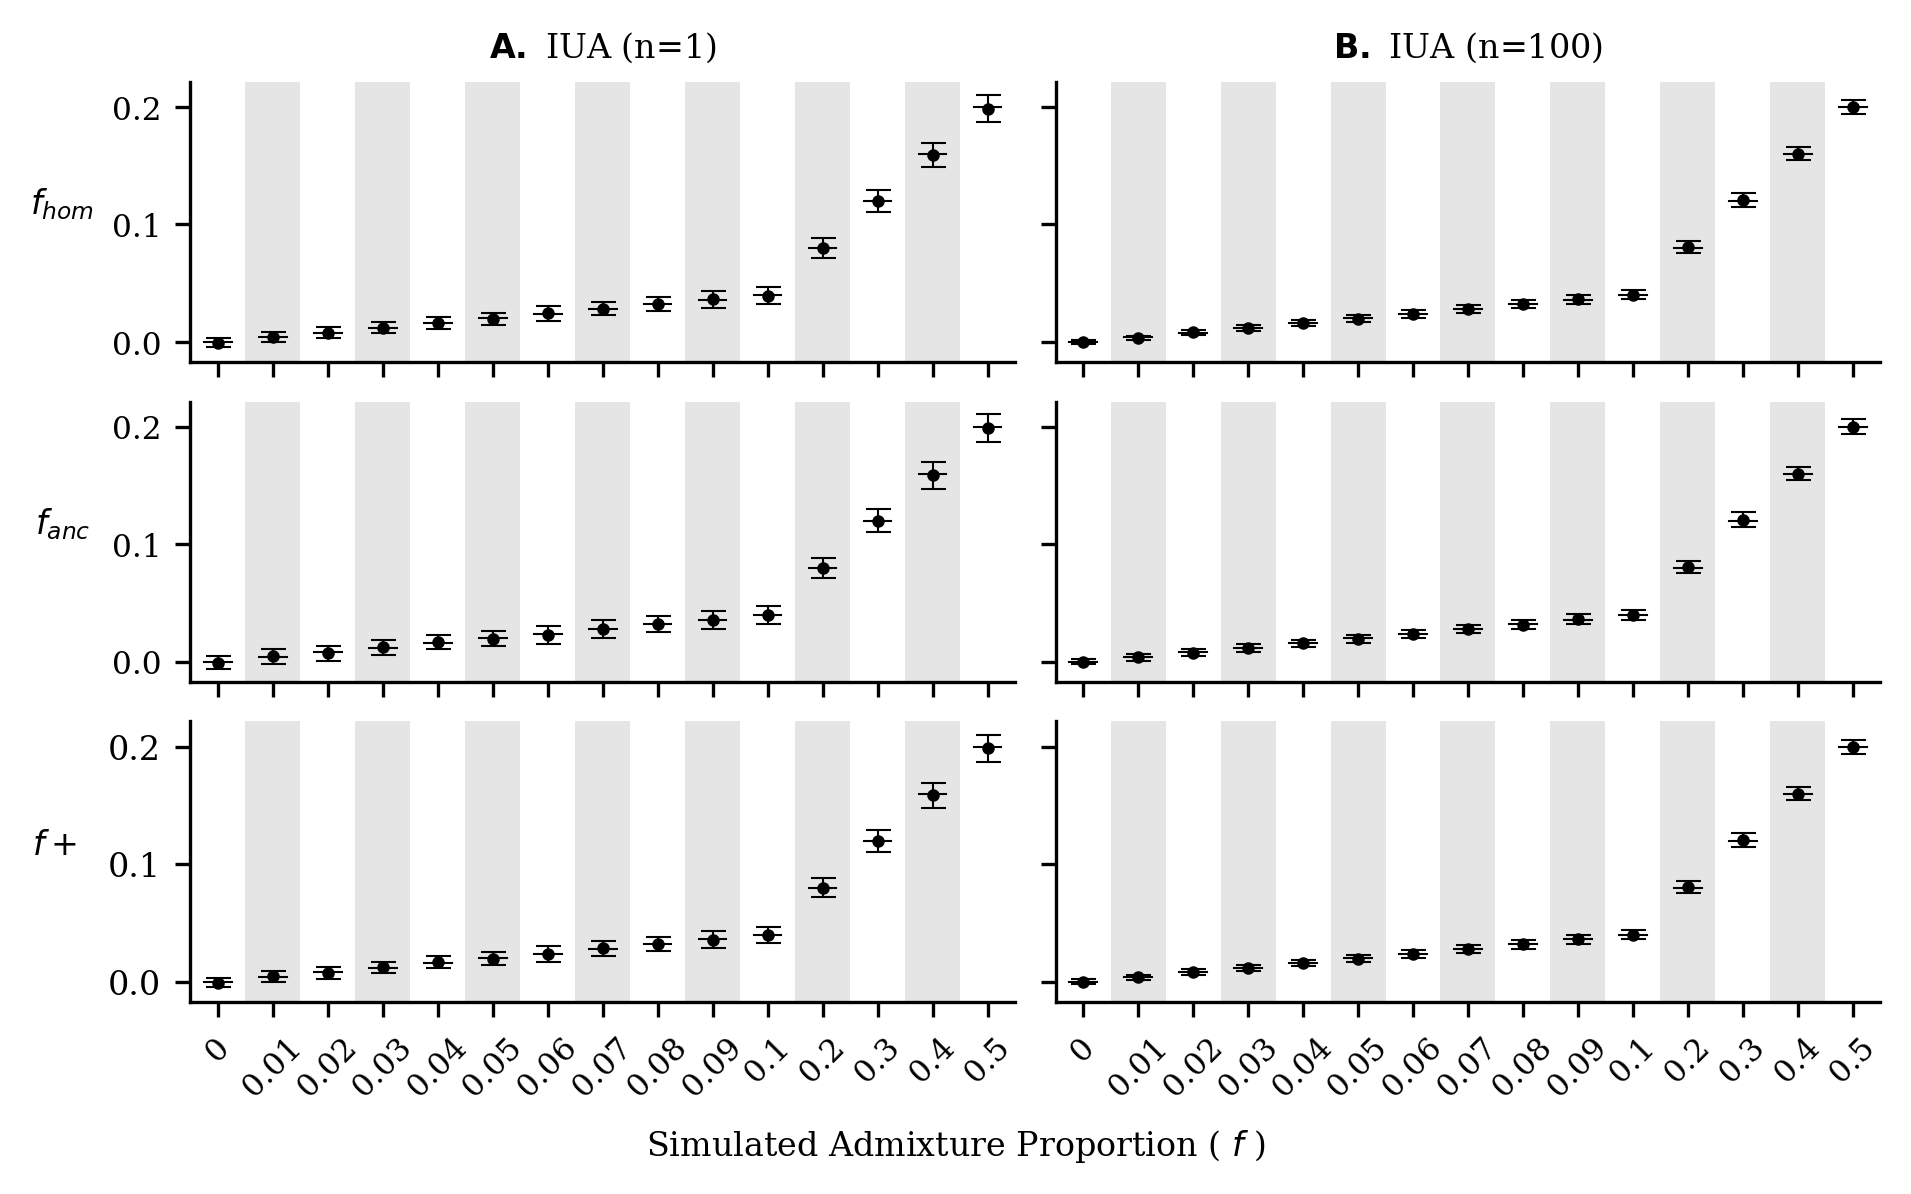

In [77]:
# Intialize data lists.
data_n1 = [(all_n1_fhom, all_n1_fanc, all_n1_fplus)]
data_n100 = [(all_n100_fhom, all_n100_fanc, all_n100_fplus)]
# Intialize a function for plotting the alternating background.
def alt_bands(ax=None):
    locs = np.arange(1, 15, 2)
    for loc in locs:
        ax.axvspan(loc-0.5, loc+0.5, facecolor='black', alpha=0.1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 8})
# Intialize the figure.
fig, axes = plt.subplots(
    3, 2, figsize=max_dim, dpi=300.0,
    sharex=True, sharey=True, facecolor='white', constrained_layout=True,
)
# For every result...
for idx in range(1):
    # Grab the results.
    fhom_n1, fanc_n1, fplus_n1 = data_n1[idx]
    fhom_n100, fanc_n100, fplus_n100 = data_n100[idx]
    # Plot the n=1 results.
    axes[0, idx].errorbar(
        np.arange(15), np.mean(fhom_n1, axis=1), yerr=np.std(fhom_n1, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[1, idx].errorbar(
        np.arange(15), np.mean(fanc_n1, axis=1), yerr=np.std(fanc_n1, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[2, idx].errorbar(
        np.arange(15), np.mean(fplus_n1, axis=1), yerr=np.std(fplus_n1, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    alt_bands(axes[0, idx])
    alt_bands(axes[1, idx])
    alt_bands(axes[2, idx])
    axes[0, idx].spines['top'].set_visible(False)
    axes[0, idx].spines['right'].set_visible(False)
    axes[1, idx].spines['top'].set_visible(False)
    axes[1, idx].spines['right'].set_visible(False)
    axes[2, idx].spines['top'].set_visible(False)
    axes[2, idx].spines['right'].set_visible(False)
    # Plot the n=100 results.
    axes[0, idx+1].errorbar(
        np.arange(15), np.mean(fhom_n100, axis=1), yerr=np.std(fhom_n100, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[1, idx+1].errorbar(
        np.arange(15), np.mean(fanc_n100, axis=1), yerr=np.std(fanc_n100, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[2, idx+1].errorbar(
        np.arange(15), np.mean(fplus_n100, axis=1), yerr=np.std(fplus_n100, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    alt_bands(axes[0, idx+1])
    alt_bands(axes[1, idx+1])
    alt_bands(axes[2, idx+1])
    axes[0, idx+1].spines['top'].set_visible(False)
    axes[0, idx+1].spines['right'].set_visible(False)
    axes[1, idx+1].spines['top'].set_visible(False)
    axes[1, idx+1].spines['right'].set_visible(False)
    axes[2, idx+1].spines['top'].set_visible(False)
    axes[2, idx+1].spines['right'].set_visible(False)
# For every admixture proportion...
for idx in range(15):
    center_pos = np.arange(15)
    # Plot the expected value.
    axes[0, 0].plot(
        [center_pos[idx]-0.25, center_pos[idx]+0.25],
        [all_e_quantify[idx], all_e_quantify[idx]],
        color='black',  lw=0.5,
    )
    axes[1, 0].plot(
        [center_pos[idx]-0.25, center_pos[idx]+0.25],
        [all_e_quantify[idx], all_e_quantify[idx]],
        color='black',  lw=0.5,
    )
    axes[2, 0].plot(
        [center_pos[idx]-0.25, center_pos[idx]+0.25],
        [all_e_quantify[idx], all_e_quantify[idx]],
        color='black', lw=0.5,
    )
# For every admixture proportion...
for idx in range(15):
    center_pos = np.arange(15)
    # Plot the expected value.
    axes[0, 1].plot(
        [center_pos[idx]-0.25, center_pos[idx]+0.25],
        [all_e_quantify[idx], all_e_quantify[idx]],
        color='black',  lw=0.5,
    )
    axes[1, 1].plot(
        [center_pos[idx]-0.25, center_pos[idx]+0.25],
        [all_e_quantify[idx], all_e_quantify[idx]],
        color='black',  lw=0.5,
    )
    axes[2, 1].plot(
        [center_pos[idx]-0.25, center_pos[idx]+0.25],
        [all_e_quantify[idx], all_e_quantify[idx]],
        color='black', lw=0.5,
    )
# Title each subplot.
axes[0, 0].set_title(r'$\bf{A.}$'+' IUA (n=1)', size=8)
axes[0, 1].set_title(r'$\bf{B.}$'+' IUA (n=100)', size=8)
# Set the xticks.
axes[0, 0].set_xlim(-0.5, 14.5)
axes[0, 1].set_xlim(-0.5, 14.5)
axes[1, 0].set_xlim(-0.5, 14.5)
axes[1, 1].set_xlim(-0.5, 14.5)
axes[2, 0].set_xticks(center_pos)
axes[2, 1].set_xticks(center_pos)
axes[2, 0].set_xticklabels(all_x_ticks, rotation=45, size=7.5)
axes[2, 1].set_xticklabels(all_x_ticks, rotation=45, size=7.5)
# Set the yticks.
axes[0, 0].set_yticks([0.0, 0.1, 0.2])
axes[1, 0].set_yticks([0.0, 0.1, 0.2])
axes[0, 0].set_yticklabels(['0.0', '0.1', '0.2'], size=7.5)
axes[1, 0].set_yticklabels(['0.0', '0.1', '0.2'], size=7.5)
# Label the axes.
fig.supxlabel('Simulated Admixture Proportion '+'( '+r'$f$'+' )', size=8)
axes[0, 0].set_ylabel(r'$f_{hom}$'+'       ', rotation=0, size=8)
axes[1, 0].set_ylabel(r'$f_{anc}$'+'       ', rotation=0, size=8)
axes[2, 0].set_ylabel(r'$f+$'+'       ', rotation=0, size=8)
# Export figure.
plt.savefig('./figures/iua_admix_prop.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show the plot!
plt.show()

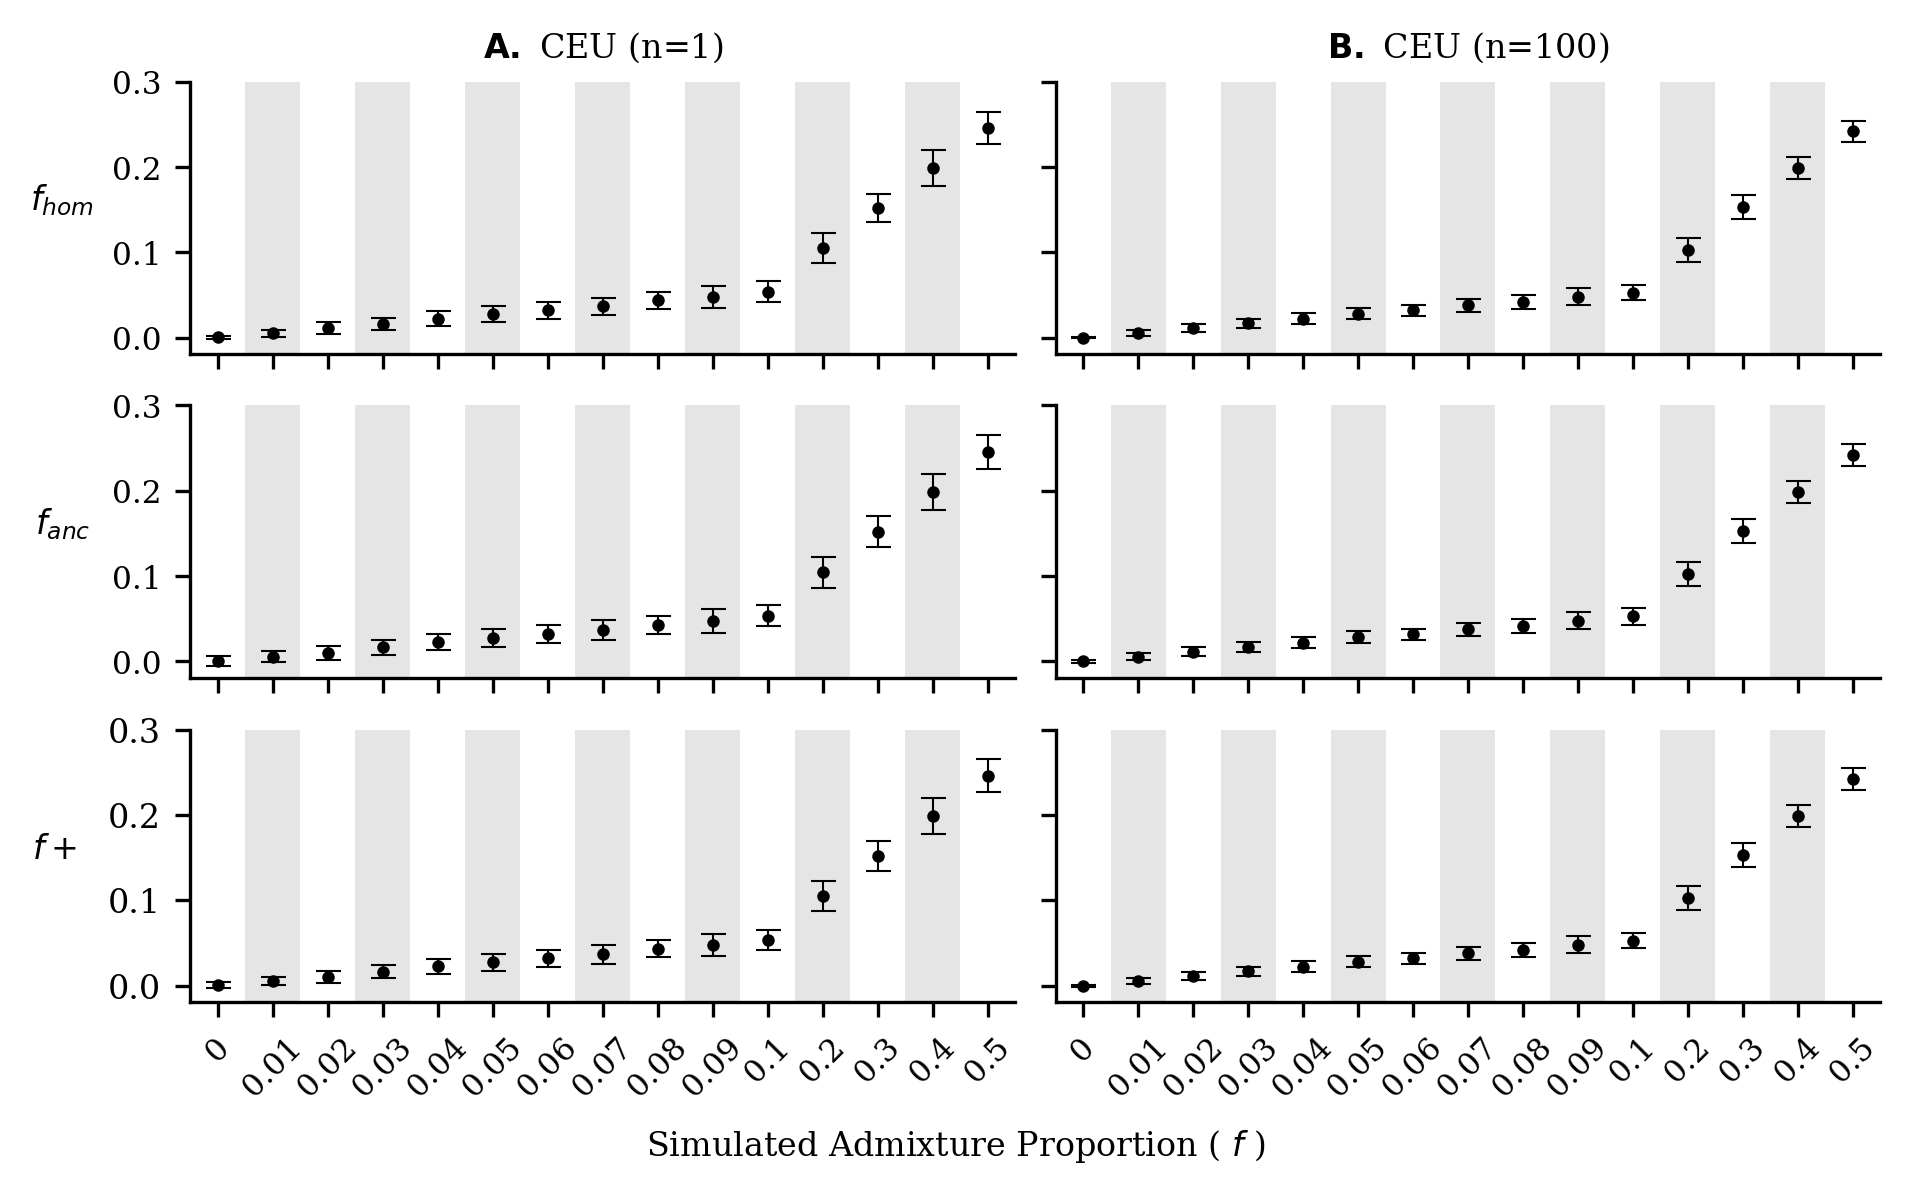

In [78]:
# Intialize data lists.
data_n1 = [(ceu_all_n1_fhom, ceu_all_n1_fanc, ceu_all_n1_fplus)]
data_n100 = [(ceu_all_n100_fhom, ceu_all_n100_fanc, ceu_all_n100_fplus)]
# Intialize a function for plotting the alternating background.
def alt_bands(ax=None):
    locs = np.arange(1, 15, 2)
    for loc in locs:
        ax.axvspan(loc-0.5, loc+0.5, facecolor='black', alpha=0.1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 8})
# Intialize the figure.
fig, axes = plt.subplots(
    3, 2, figsize=max_dim, dpi=300.0,
    sharex=True, sharey=True, facecolor='white', constrained_layout=True,
)
# For every result...
for idx in range(1):
    # Grab the results.
    fhom_n1, fanc_n1, fplus_n1 = data_n1[idx]
    fhom_n100, fanc_n100, fplus_n100 = data_n100[idx]
    # Plot the n=1 results.
    axes[0, idx].errorbar(
        np.arange(15), np.mean(fhom_n1, axis=1), yerr=np.std(fhom_n1, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[1, idx].errorbar(
        np.arange(15), np.mean(fanc_n1, axis=1), yerr=np.std(fanc_n1, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[2, idx].errorbar(
        np.arange(15), np.mean(fplus_n1, axis=1), yerr=np.std(fplus_n1, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    alt_bands(axes[0, idx])
    alt_bands(axes[1, idx])
    alt_bands(axes[2, idx])
    axes[0, idx].spines['top'].set_visible(False)
    axes[0, idx].spines['right'].set_visible(False)
    axes[1, idx].spines['top'].set_visible(False)
    axes[1, idx].spines['right'].set_visible(False)
    axes[2, idx].spines['top'].set_visible(False)
    axes[2, idx].spines['right'].set_visible(False)
    # Plot the n=100 results.
    axes[0, idx+1].errorbar(
        np.arange(15), np.mean(fhom_n100, axis=1), yerr=np.std(fhom_n100, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[1, idx+1].errorbar(
        np.arange(15), np.mean(fanc_n100, axis=1), yerr=np.std(fanc_n100, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[2, idx+1].errorbar(
        np.arange(15), np.mean(fplus_n100, axis=1), yerr=np.std(fplus_n100, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    alt_bands(axes[0, idx+1])
    alt_bands(axes[1, idx+1])
    alt_bands(axes[2, idx+1])
    axes[0, idx+1].spines['top'].set_visible(False)
    axes[0, idx+1].spines['right'].set_visible(False)
    axes[1, idx+1].spines['top'].set_visible(False)
    axes[1, idx+1].spines['right'].set_visible(False)
    axes[2, idx+1].spines['top'].set_visible(False)
    axes[2, idx+1].spines['right'].set_visible(False)
# Title each subplot.
axes[0, 0].set_title(r'$\bf{A.}$'+' CEU (n=1)', size=8)
axes[0, 1].set_title(r'$\bf{B.}$'+' CEU (n=100)', size=8)
# Set the xticks.
axes[0, 0].set_xlim(-0.5, 14.5)
axes[0, 1].set_xlim(-0.5, 14.5)
axes[1, 0].set_xlim(-0.5, 14.5)
axes[1, 1].set_xlim(-0.5, 14.5)
axes[2, 0].set_xticks(center_pos)
axes[2, 1].set_xticks(center_pos)
axes[2, 0].set_xticklabels(all_x_ticks, rotation=45, size=7.5)
axes[2, 1].set_xticklabels(all_x_ticks, rotation=45, size=7.5)
# Set the yticks.
axes[0, 0].set_yticks([0.0, 0.1, 0.2, 0.3])
axes[1, 0].set_yticks([0.0, 0.1, 0.2, 0.3])
axes[0, 0].set_yticklabels(['0.0', '0.1', '0.2', '0.3'], size=7.5)
axes[1, 0].set_yticklabels(['0.0', '0.1', '0.2', '0.3'], size=7.5)
# Label the axes.
fig.supxlabel('Simulated Admixture Proportion '+'( '+r'$f$'+' )', size=8)
axes[0, 0].set_ylabel(r'$f_{hom}$'+'       ', rotation=0, size=8)
axes[1, 0].set_ylabel(r'$f_{anc}$'+'       ', rotation=0, size=8)
axes[2, 0].set_ylabel(r'$f+$'+'       ', rotation=0, size=8)
# Export figure.
plt.savefig('./figures/ceu_admix_prop.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show the plot!
plt.show()

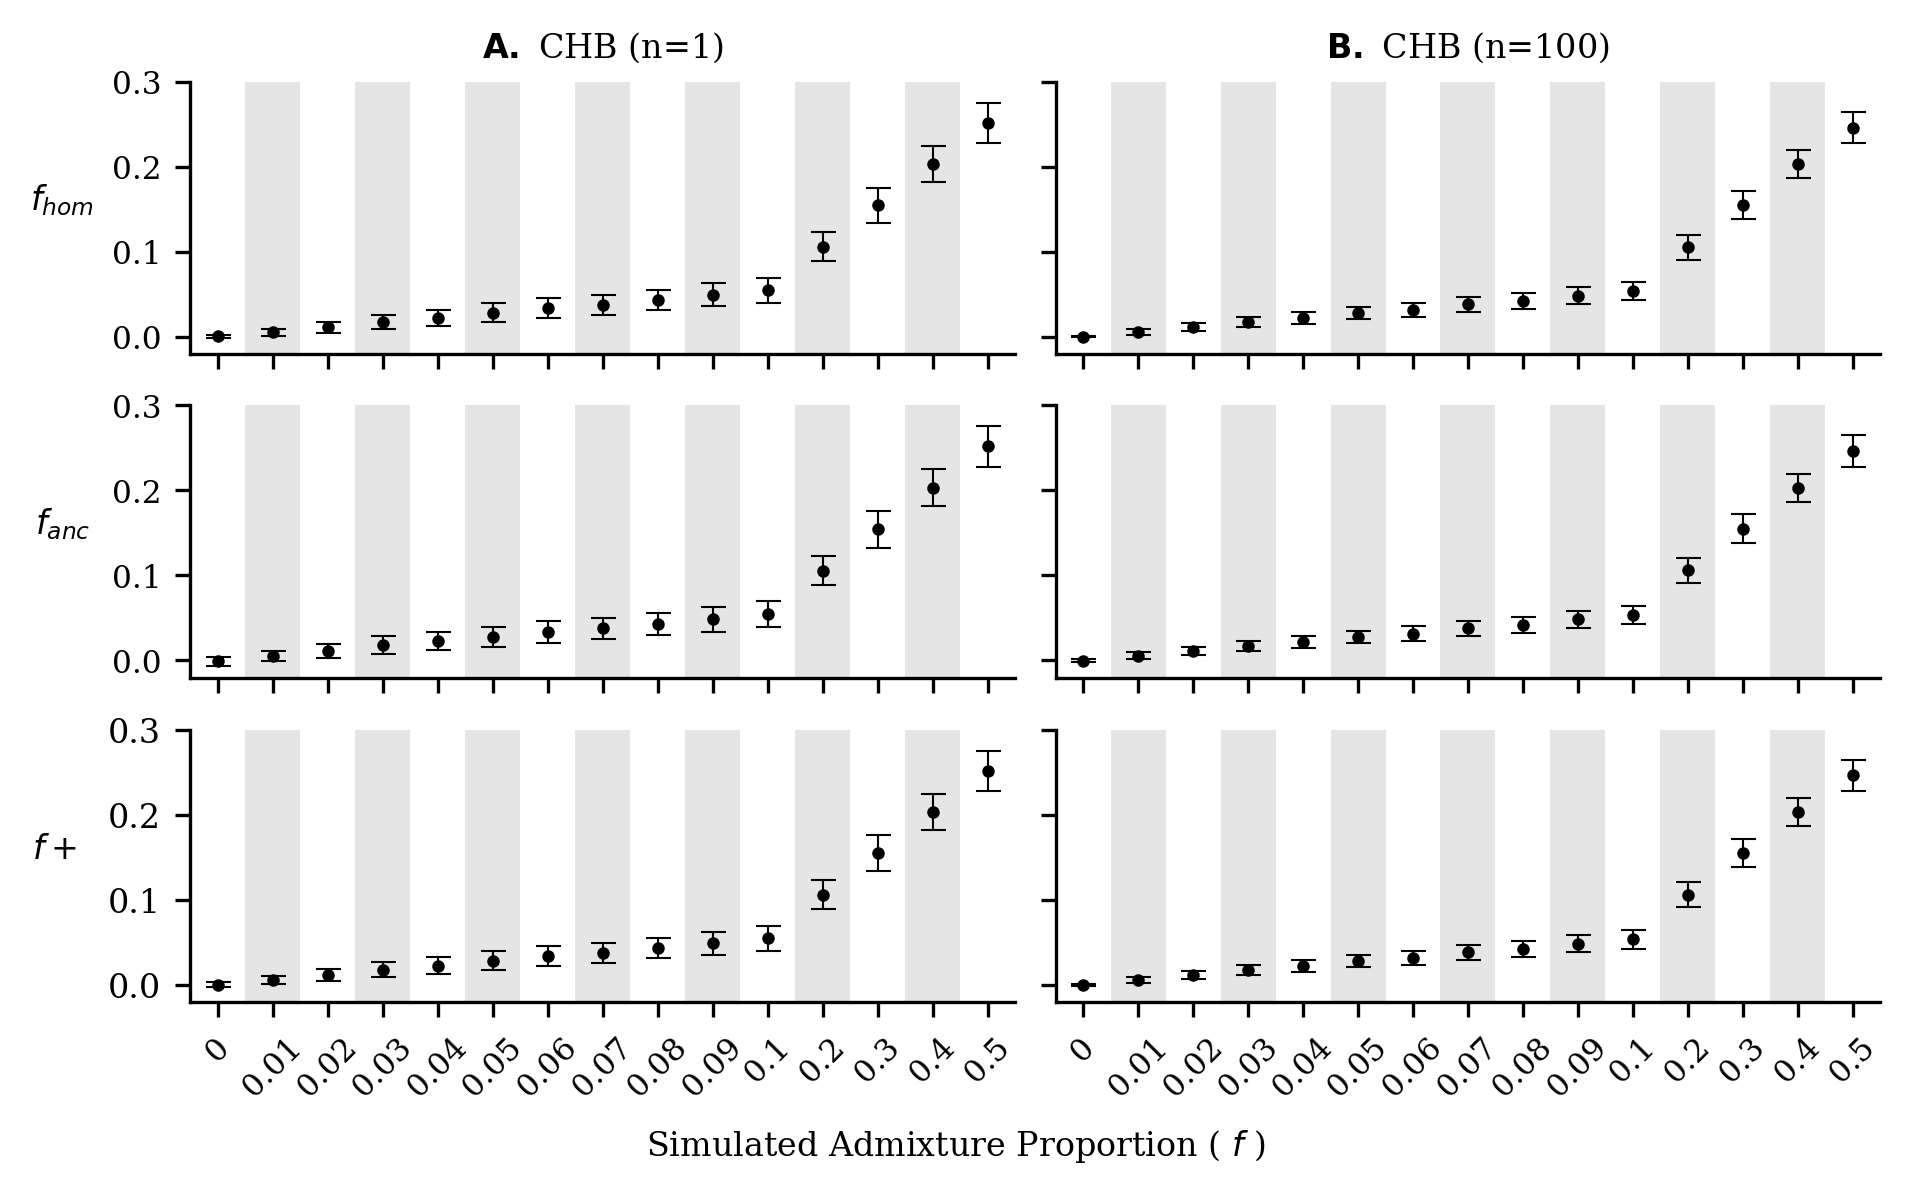

In [79]:
# Intialize data lists.
data_n1 = [(chb_all_n1_fhom, chb_all_n1_fanc, chb_all_n1_fplus)]
data_n100 = [(chb_all_n100_fhom, chb_all_n100_fanc, chb_all_n100_fplus)]
# Intialize a function for plotting the alternating background.
def alt_bands(ax=None):
    locs = np.arange(1, 15, 2)
    for loc in locs:
        ax.axvspan(loc-0.5, loc+0.5, facecolor='black', alpha=0.1)
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 8})
# Intialize the figure.
fig, axes = plt.subplots(
    3, 2, figsize=max_dim, dpi=300.0,
    sharex=True, sharey=True, facecolor='white', constrained_layout=True,
)
# For every result...
for idx in range(1):
    # Grab the results.
    fhom_n1, fanc_n1, fplus_n1 = data_n1[idx]
    fhom_n100, fanc_n100, fplus_n100 = data_n100[idx]
    # Plot the n=1 results.
    axes[0, idx].errorbar(
        np.arange(15), np.mean(fhom_n1, axis=1), yerr=np.std(fhom_n1, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[1, idx].errorbar(
        np.arange(15), np.mean(fanc_n1, axis=1), yerr=np.std(fanc_n1, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[2, idx].errorbar(
        np.arange(15), np.mean(fplus_n1, axis=1), yerr=np.std(fplus_n1, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    alt_bands(axes[0, idx])
    alt_bands(axes[1, idx])
    alt_bands(axes[2, idx])
    axes[0, idx].spines['top'].set_visible(False)
    axes[0, idx].spines['right'].set_visible(False)
    axes[1, idx].spines['top'].set_visible(False)
    axes[1, idx].spines['right'].set_visible(False)
    axes[2, idx].spines['top'].set_visible(False)
    axes[2, idx].spines['right'].set_visible(False)
    # Plot the n=100 results.
    axes[0, idx+1].errorbar(
        np.arange(15), np.mean(fhom_n100, axis=1), yerr=np.std(fhom_n100, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[1, idx+1].errorbar(
        np.arange(15), np.mean(fanc_n100, axis=1), yerr=np.std(fanc_n100, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    axes[2, idx+1].errorbar(
        np.arange(15), np.mean(fplus_n100, axis=1), yerr=np.std(fplus_n100, axis=1),
        fmt='.', color='black', ms=5, lw=0.5, capsize=3, mew=0.5,
    )
    alt_bands(axes[0, idx+1])
    alt_bands(axes[1, idx+1])
    alt_bands(axes[2, idx+1])
    axes[0, idx+1].spines['top'].set_visible(False)
    axes[0, idx+1].spines['right'].set_visible(False)
    axes[1, idx+1].spines['top'].set_visible(False)
    axes[1, idx+1].spines['right'].set_visible(False)
    axes[2, idx+1].spines['top'].set_visible(False)
    axes[2, idx+1].spines['right'].set_visible(False)
# Title each subplot.
axes[0, 0].set_title(r'$\bf{A.}$'+' CHB (n=1)', size=8)
axes[0, 1].set_title(r'$\bf{B.}$'+' CHB (n=100)', size=8)
# Set the xticks.
axes[0, 0].set_xlim(-0.5, 14.5)
axes[0, 1].set_xlim(-0.5, 14.5)
axes[1, 0].set_xlim(-0.5, 14.5)
axes[1, 1].set_xlim(-0.5, 14.5)
axes[2, 0].set_xticks(center_pos)
axes[2, 1].set_xticks(center_pos)
axes[2, 0].set_xticklabels(all_x_ticks, rotation=45, size=7.5)
axes[2, 1].set_xticklabels(all_x_ticks, rotation=45, size=7.5)
# Set the yticks.
axes[0, 0].set_yticks([0.0, 0.1, 0.2, 0.3])
axes[1, 0].set_yticks([0.0, 0.1, 0.2, 0.3])
axes[0, 0].set_yticklabels(['0.0', '0.1', '0.2', '0.3'], size=7.5)
axes[1, 0].set_yticklabels(['0.0', '0.1', '0.2', '0.3'], size=7.5)
# Label the axes.
fig.supxlabel('Simulated Admixture Proportion '+'( '+r'$f$'+' )', size=8)
axes[0, 0].set_ylabel(r'$f_{hom}$'+'       ', rotation=0, size=8)
axes[1, 0].set_ylabel(r'$f_{anc}$'+'       ', rotation=0, size=8)
axes[2, 0].set_ylabel(r'$f+$'+'       ', rotation=0, size=8)
# Export figure.
plt.savefig('./figures/chb_admix_prop.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show the plot!
plt.show()